In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
train.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [3]:
train.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

# Data understanding, preparation & pre-processing 

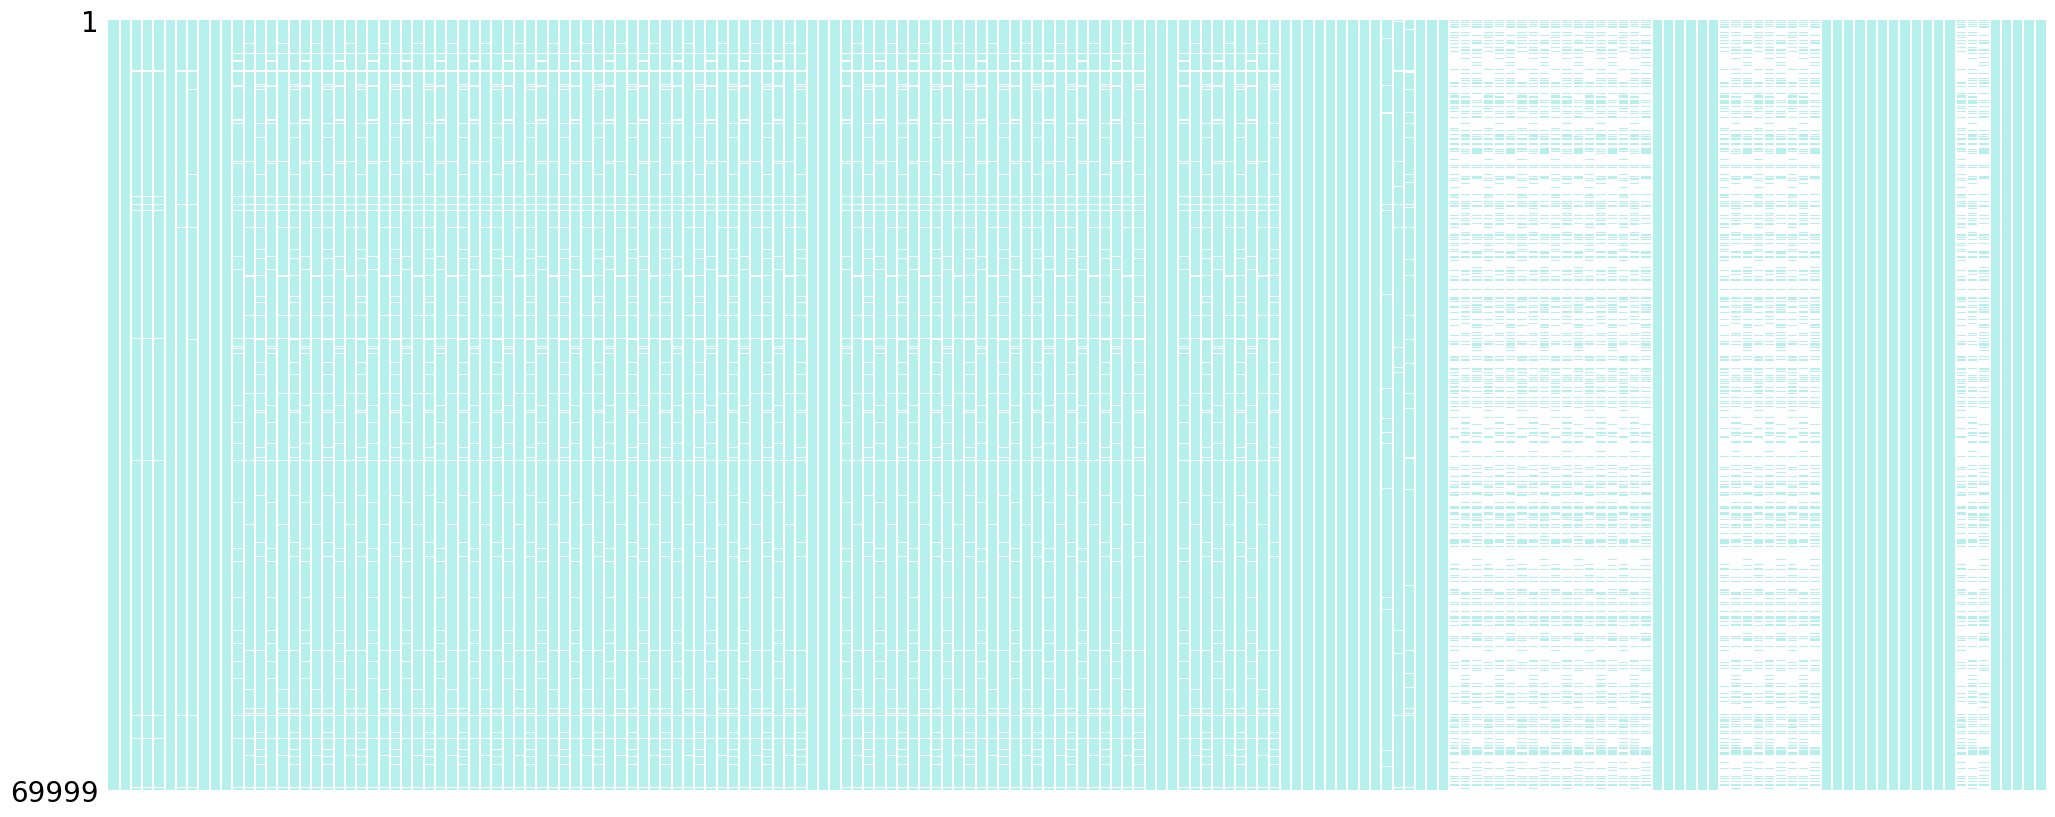

In [4]:
#overview missing data
fig = msno.matrix(train,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

> There are many missing data. So I need to check them, then handling before training

In [5]:
# check null ratio
r_null = 100*(train.isnull().sum()/len((train)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(train.columns)}')

number of columns with null values per total columns: 125/172


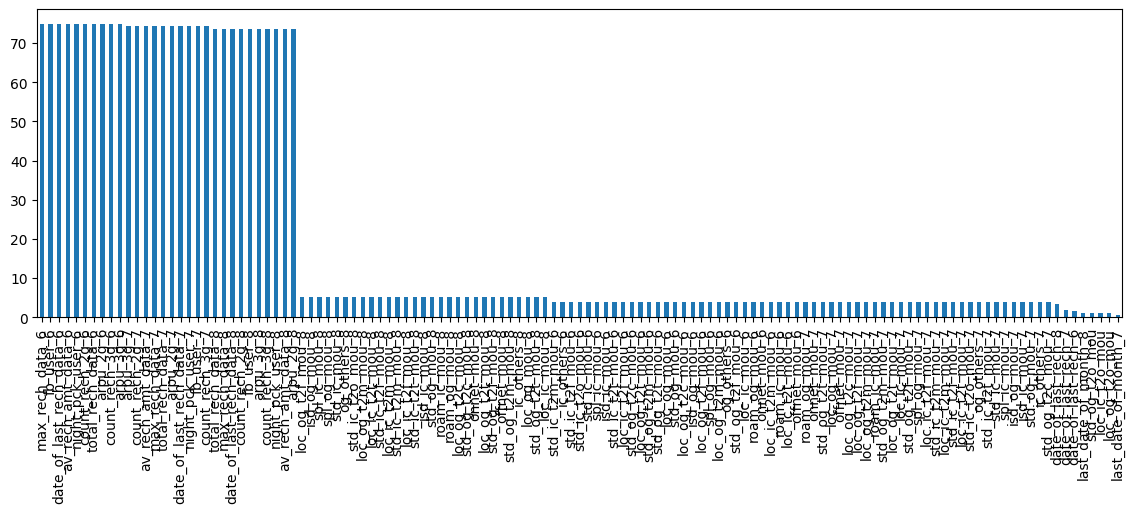

In [6]:
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()

In [7]:
null_colummns_70 = r_null[r_null > 70].sort_values(ascending = False)
print('number of columns with 70% null values:',len(null_colummns_70))

number of columns with 70% null values: 30


In [8]:
train = train.drop(columns=list(null_colummns_70.index))
train.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...  monthly_3g_7  monthly_3g_8   sachet_3g_6  \
count  67312.000000  ...  69999.000000  69999.000000  69999.000000   
mean     133.894438  ...      0.077730      0.081958      0.075344   
std      311.277193  ...      0.383189      0.381821      0.573003   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      0.000000   
50%       32.280000  ...      0.000000      0.000000      0.000000   
75%      115.837500  ...      0.000000      0.000000      0.000000   
max     8157.780000  ...     16.000000     16.000000     29.000000   

        sachet_3g_7   sachet_3g_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean       0.081444      0.085487   1220.639709     68.108597     65.935830   
std        0.634547      0.680035    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        0.000000      0.000000    468.000000      0.000000      0.000000   
50%        0.000000      0.000000    868.000000      0.000000      0.000000   
75%        0.000000      0.000000   1813.000000      0.000000      0.000000   
max       33.000000     41.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 136 columns]

In [9]:
#Drop columns with only one values
columns_vales_count = {c : len(train[c].value_counts().index) for c in train.columns}
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [10]:
train = train.drop(columns=one_value_column)
train.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  67231.000000   
mean   34999.000000    283.134365    278.185912    278.858826    133.153275   
std    20207.115084    334.213918    344.366927    351.924315    299.963093   
min        0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
25%    17499.500000     93.581000     86.714000     84.095000      7.410000   
50%    34999.000000    197.484000    191.588000    192.234000     34.110000   
75%    52498.500000    370.791000    365.369500    369.909000    119.390000   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       ...  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7  \
count  ...  69999.000000  69999.000000  69999.000000  69999.000000   
mean   ...      0.077730      0.081958      0.075344      0.081444   
std    ...      0.383189      0.381821      0.573003      0.634547   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     16.000000     16.000000     29.000000     33.000000   

        sachet_3g_8           aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.00000   
mean       0.085487   1220.639709     68.108597     65.935830     60.07674   
std        0.680035    952.426321    269.328659    267.899034    257.22681   
min        0.000000    180.000000      0.000000      0.000000      0.00000   
25%        0.000000    468.000000      0.000000      0.000000      0.00000   
50%        0.000000    868.000000      0.000000      0.000000      0.00000   
75%        0.000000   1813.000000      0.000000      0.000000      0.00000   
max       41.000000   4337.000000  12916.220000   9165.600000  11166.21000   

       churn_probability  
count       69999.000000  
mean            0.101887  
std             0.302502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 126 columns]

In [11]:
# check duplicate
train_dup = train
train_dup.drop_duplicates(subset = None, inplace= True)
if train_dup.shape == train.shape:
    print('There have no duplicate')
else:
    print('Some duplicate in this dataset')

There have no duplicate


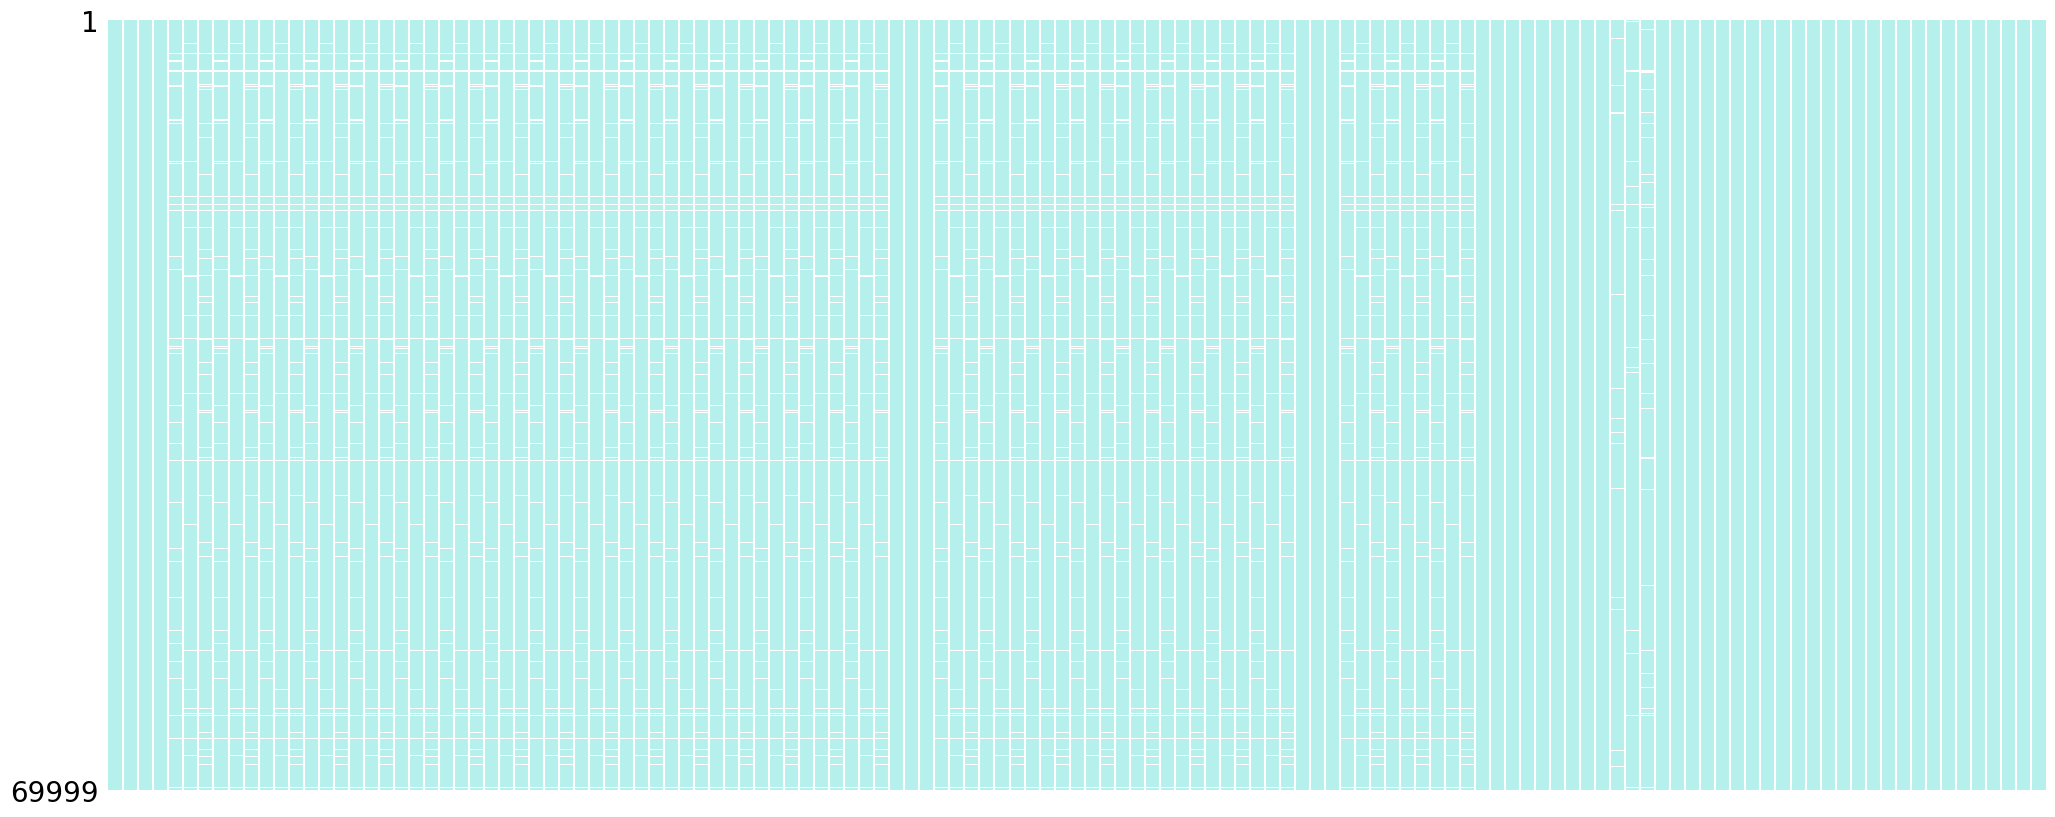

In [12]:
#overview missing data
fig = msno.matrix(train,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

> With less missing data, I will train 2 versions. The one with using imputation, and the other, I remove all missing data.

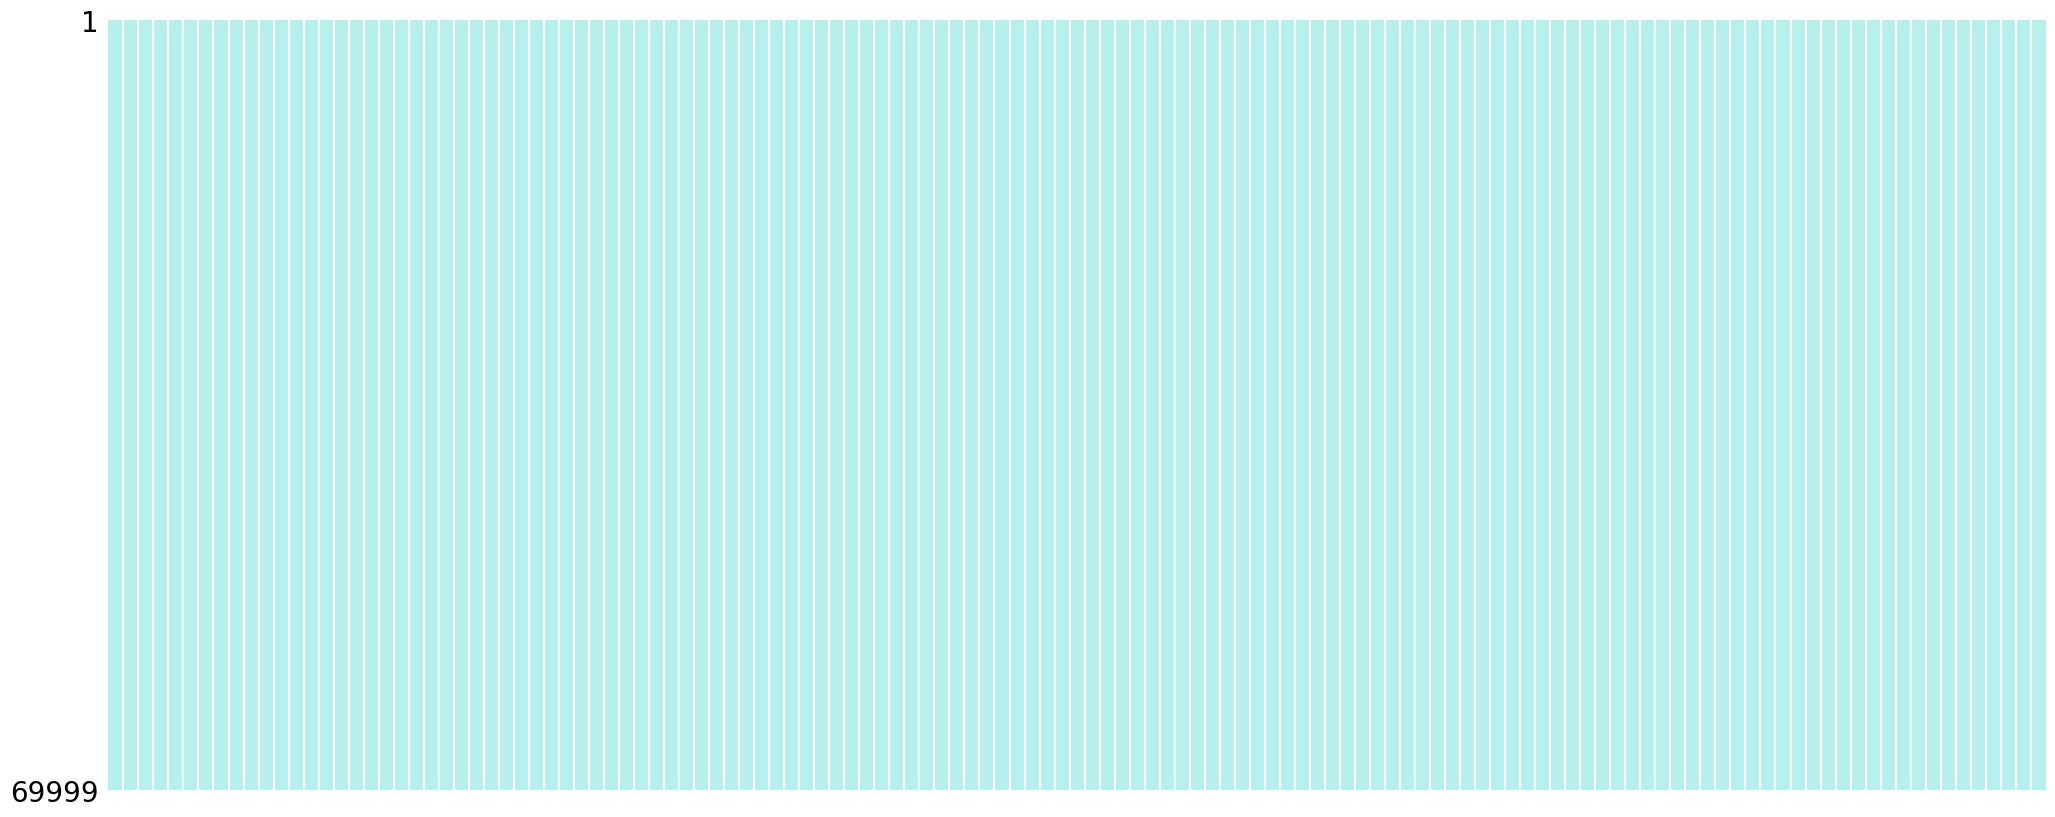

In [13]:
# Imputation version
train_inputation = train
train_inputation = train_inputation.fillna(train_inputation.mode().iloc[0])
#overview missing data
fig = msno.matrix(train_inputation,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()


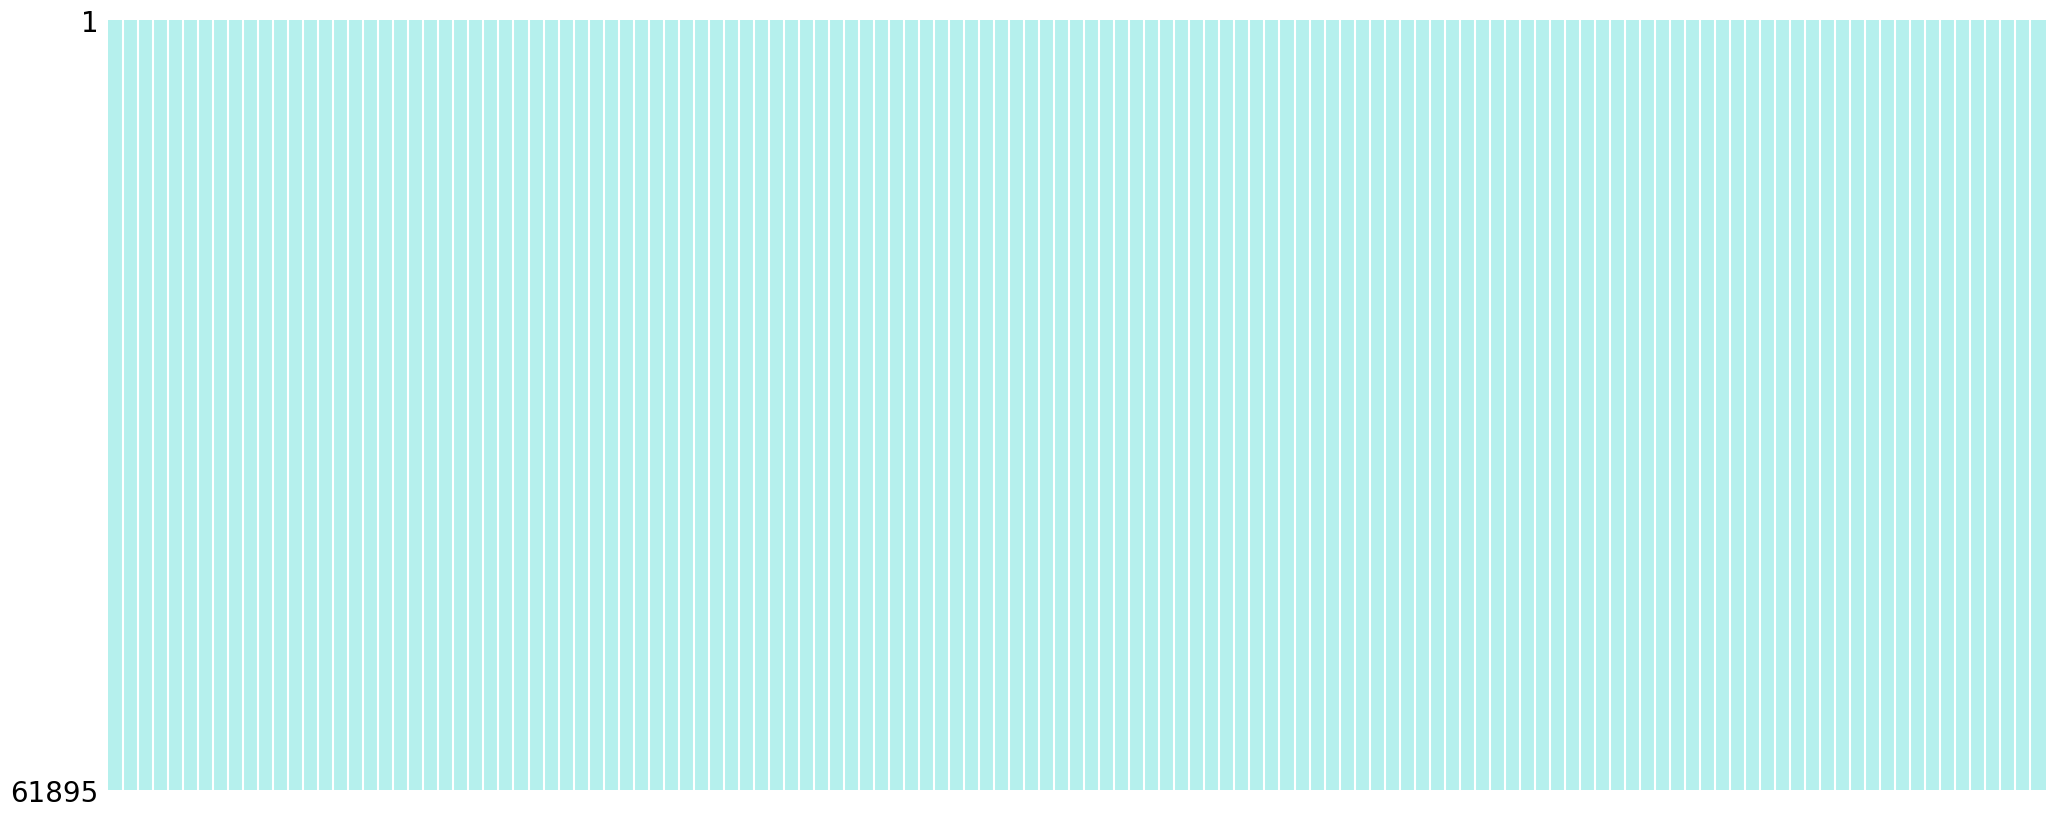

In [14]:
# Missing data removing version
train_clean = train
train_clean = train_clean.dropna()
#overview missing data
fig = msno.matrix(train_clean,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

# EDA and Feature Engineering

In [15]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
    
    """
    Returns the names of categorical, numerical, and categorical but cardinal variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe for which variable names are to be obtained.
        cat_th: int, optional
                Class threshold value for numerical but categorical variables.
        car_th: int, optional
                Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
                List of categorical variables.
        num_cols: list
                List of numerical variables.
        cat_but_car: list
                List of categorical but cardinal variables.
        num_but_cat: list 
                List of categorical but numerical variables.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [16]:
def transfer_date_feature(df):
    for c in df.columns:
        if 'date' in c:
            day_name = f'{c}_day'
            month_name = f'{c}_month'
            year_name = f'{c}_year'
            df[c] = pd.to_datetime(df[c])
            df[year_name] = df[c].dt.year
            df[month_name] = df[c].dt.month
            df[day_name] = df[c].dt.day
            df = df.drop(columns=c)
    return df

In [17]:
train = transfer_date_feature(train)
train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  churn_probability  \
0         32.24         96.68          2.33  ...                  0   
1          0.00         25.99         30.89  ...                  0   
2         53.99         82.05          0.00  ...                  0   
3         68.76         78.48         50.23  ...                  0   
4         56.99         38.11          9.63  ...                  0   

   date_of_last_rech_6_year  date_of_last_rech_6_month  \
0                    2014.0                        6.0   
1                    2014.0                        6.0   
2                    2014.0                        6.0   
3                    2014.0                        6.0   
4                    2014.0                        6.0   

   date_of_last_rech_6_day  date_of_last_rech_7_year  \
0                     22.0                    2014.0   
1                     12.0                    2014.0   
2                     11.0                    2014.0   
3                     15.0                    2014.0   
4                     25.0                    2014.0   

   date_of_last_rech_7_month  date_of_last_rech_7_day  \
0                        7.0                     10.0   
1                        7.0                     10.0   
2                        7.0                     22.0   
3                        7.0                     21.0   
4                        7.0                     26.0   

   date_of_last_rech_8_year  date_of_last_rech_8_month  \
0                    2014.0                        8.0   
1                    2014.0                        8.0   
2                    2014.0                        8.0   
3                    2014.0                        8.0   
4                    2014.0                        8.0   

   date_of_last_rech_8_day  
0                     24.0  
1                     26.0  
2                     24.0  
3                     25.0  
4                     30.0  

[5 rows x 135 columns]

Observations: 69999
Variables: 135
cat_cols: 13
num_cols: 122
cat_but_car: 0
num_but_cat: 13


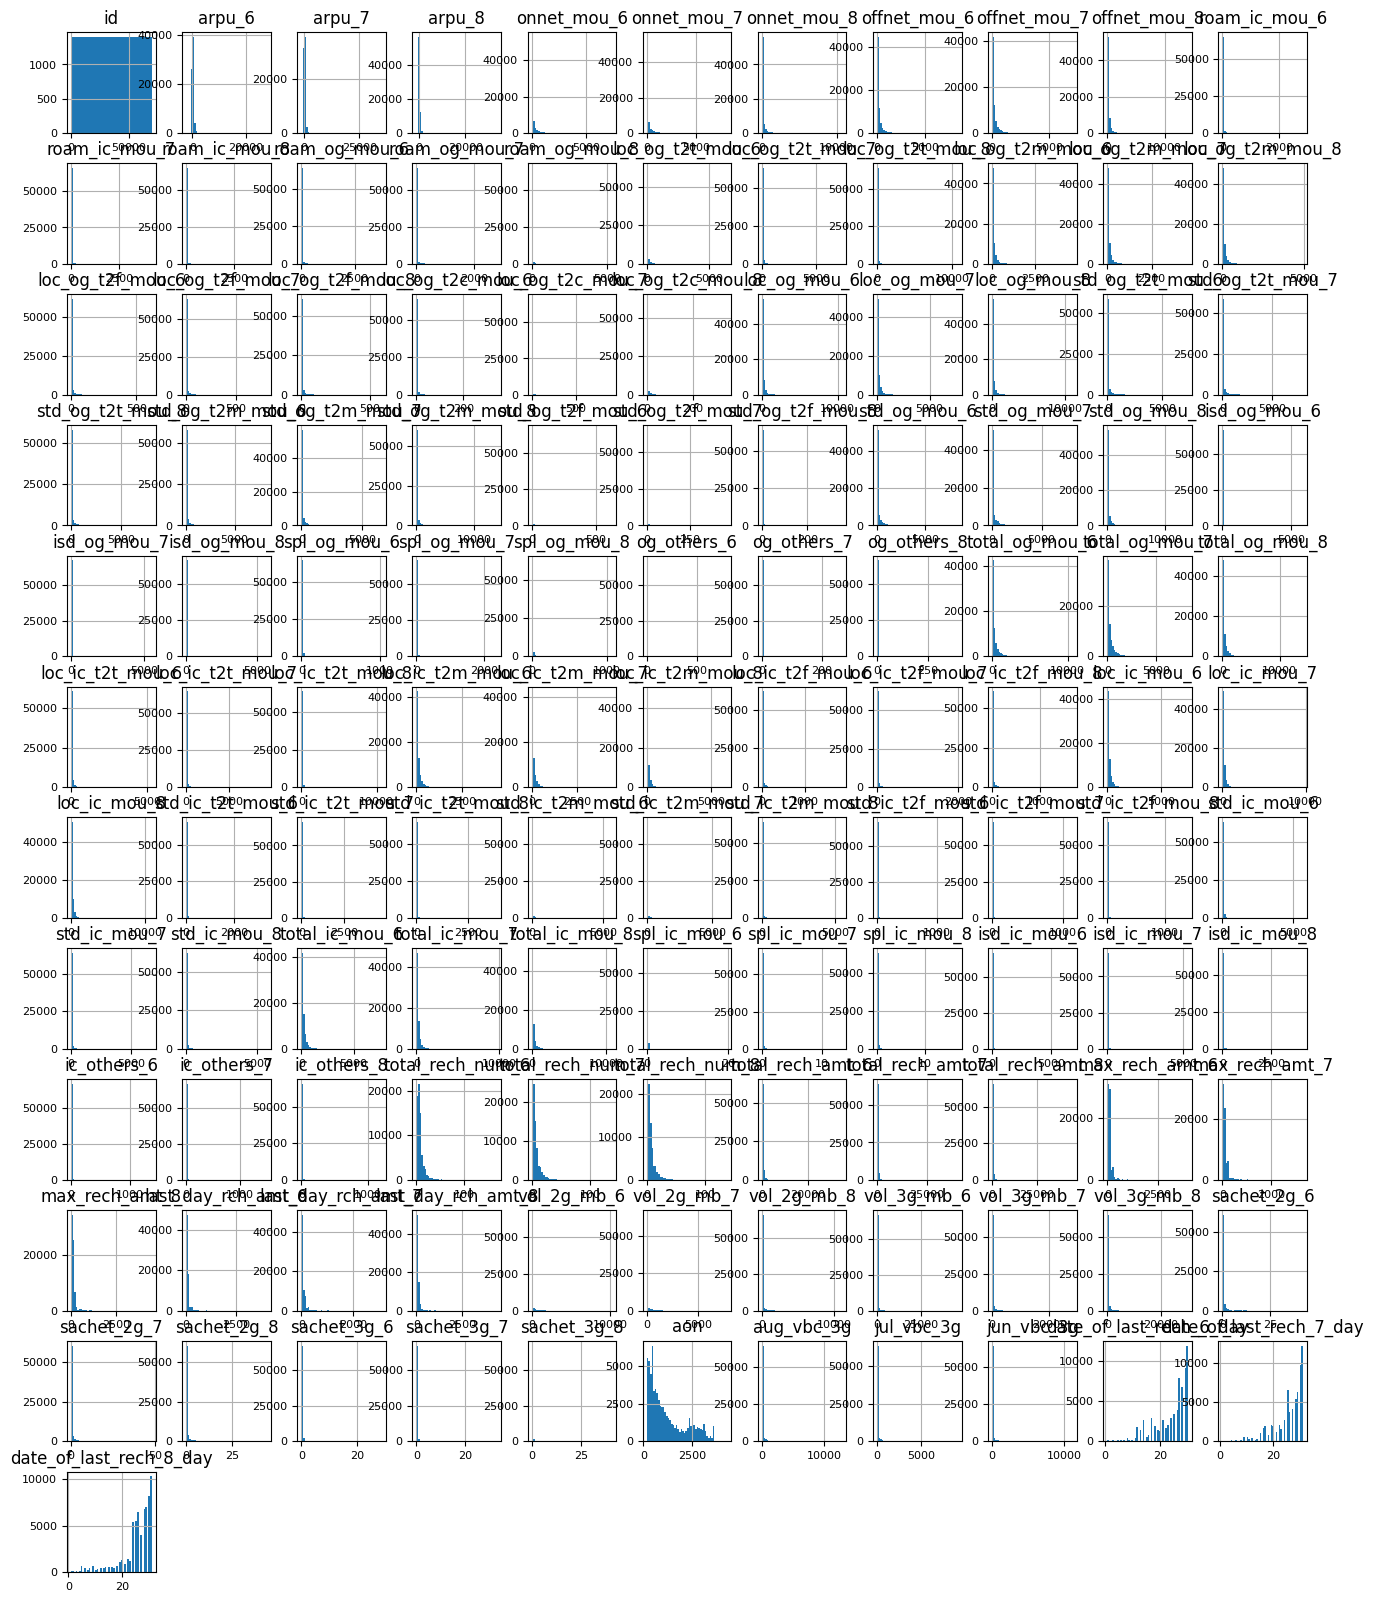

In [18]:
# pre-classify type of columns
cat_cols, num_cols, cat_but_car = grab_col_names(train)
fig = train[num_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

> Many bias features. So I decide to use t-SNE instead of PCA

In [19]:
def univariate_analysis1(df, column):
    _, p = plt.subplots(2,1, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(f'{column}')
    p[1].set_xlabel(f'{column}')
    plt.tight_layout()
    plt.show()
def drop_outliner(df, col):
    old_rows = len(df)
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    new_df = df[df[col] < upper]
    new_rows = len(new_df)
    percentage_of_dropped_row = round((old_rows - new_rows)/old_rows*100,2)
    print('Percentage of dropped row (%): ', percentage_of_dropped_row)
    col_false = None
    if percentage_of_dropped_row < 30:
        return new_df, col_false
    else:
        print(f'WARNING: CANNOT DROP {col} WITH HIGH PERCENTAGE - {percentage_of_dropped_row}')
        col_false = col
        return df, col_false

In [20]:
# Drop noise features
noise_cols = ['id']
train = train.drop(columns= noise_cols)
# reset grab
cat_cols, num_cols, cat_but_car = grab_col_names(train)

Observations: 69999
Variables: 134
cat_cols: 13
num_cols: 121
cat_but_car: 0
num_but_cat: 13


In [21]:
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

plot feature: arpu_6


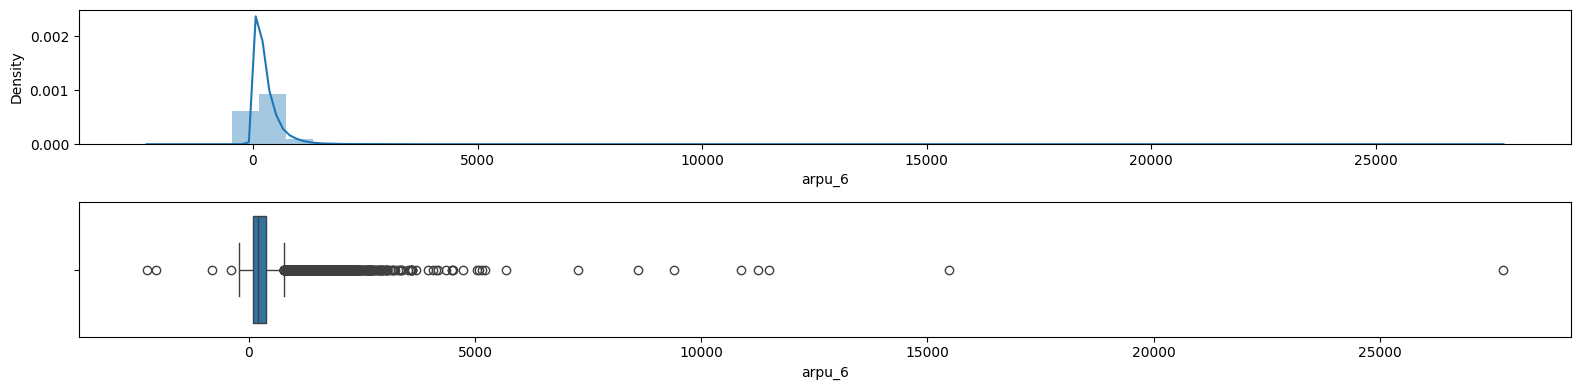

plot feature: arpu_7


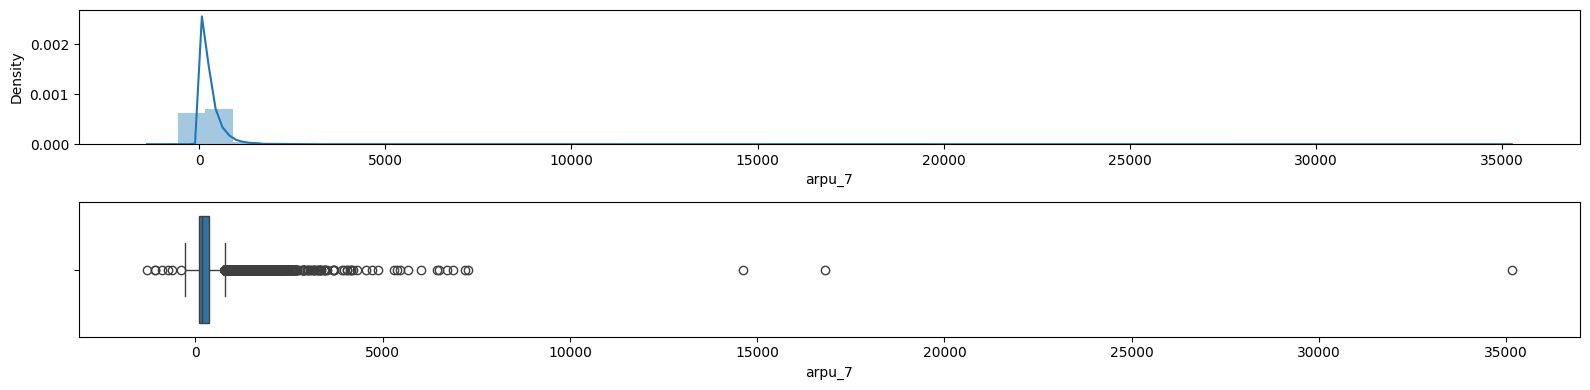

plot feature: arpu_8


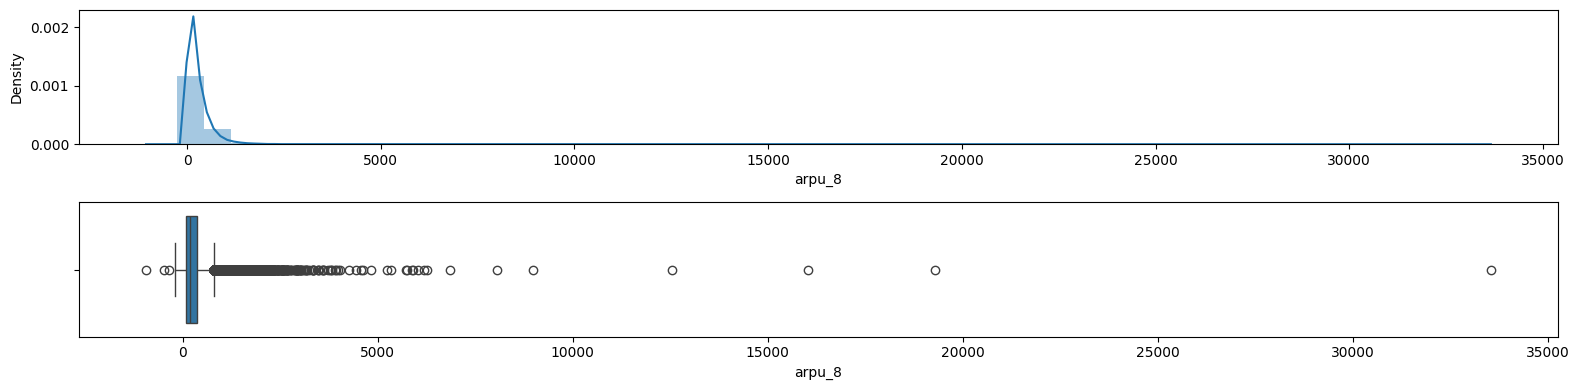

plot feature: onnet_mou_6


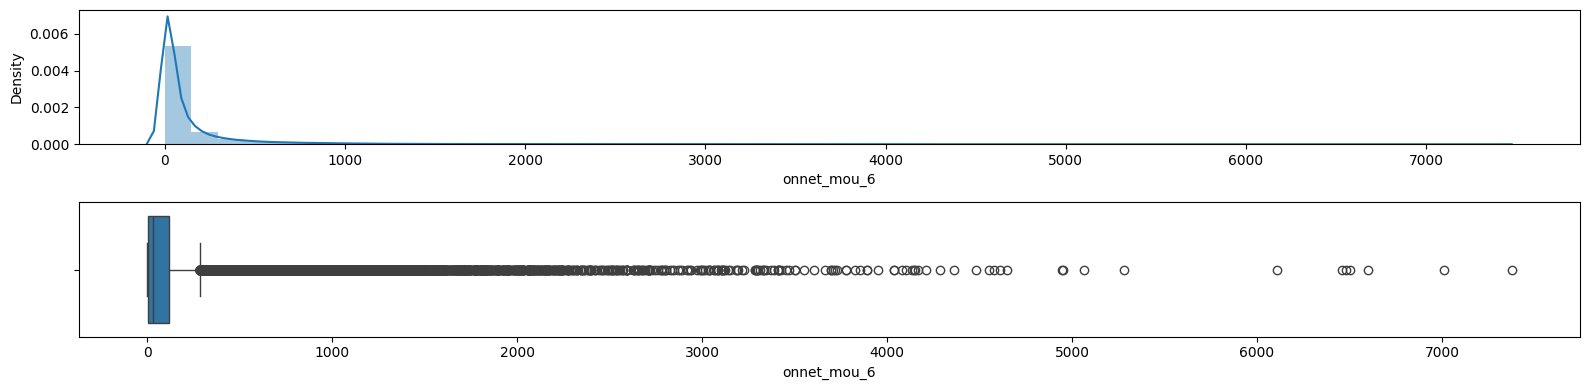

plot feature: onnet_mou_7


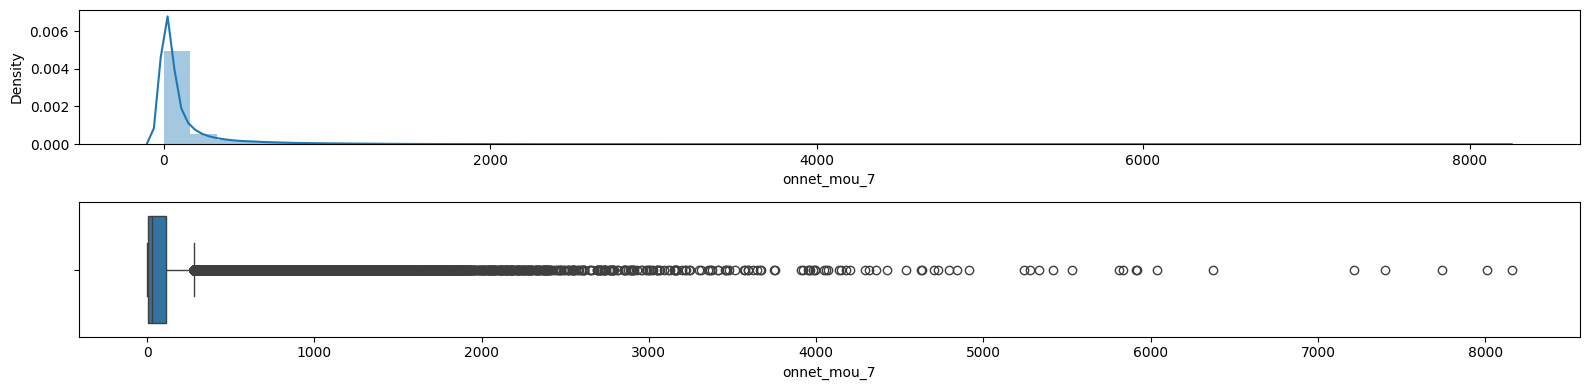

plot feature: onnet_mou_8


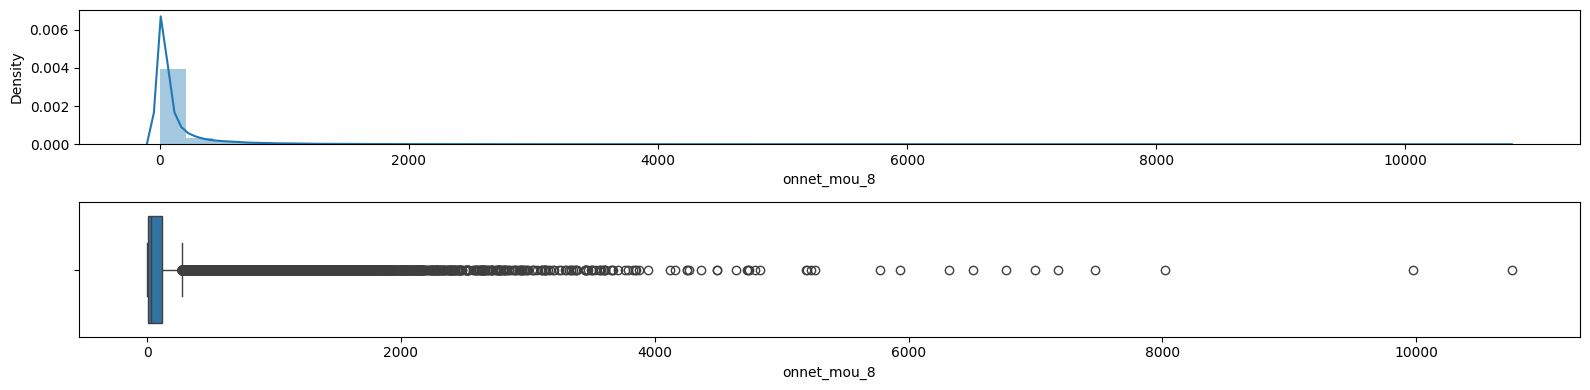

plot feature: offnet_mou_6


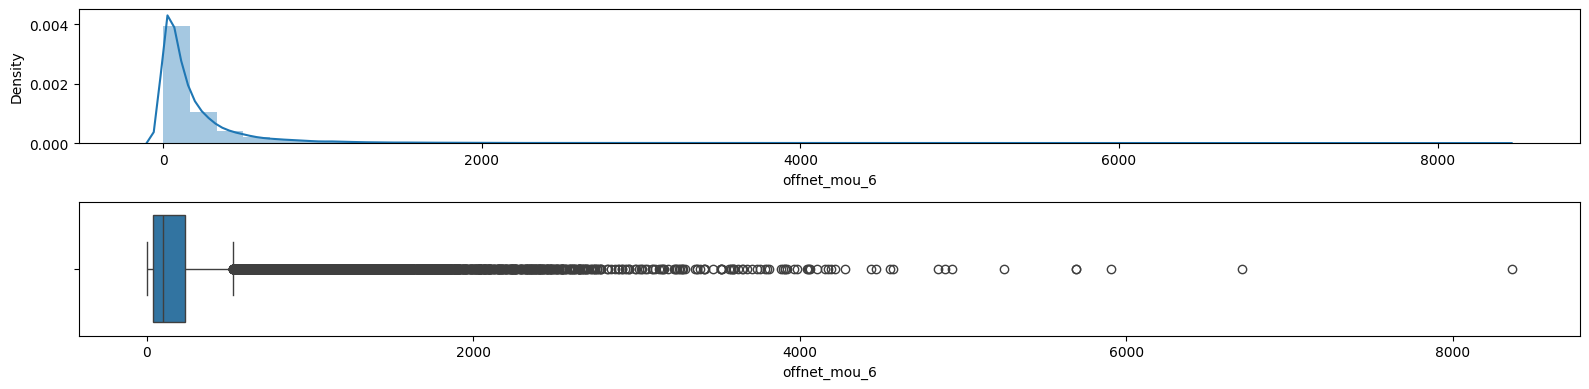

plot feature: offnet_mou_7


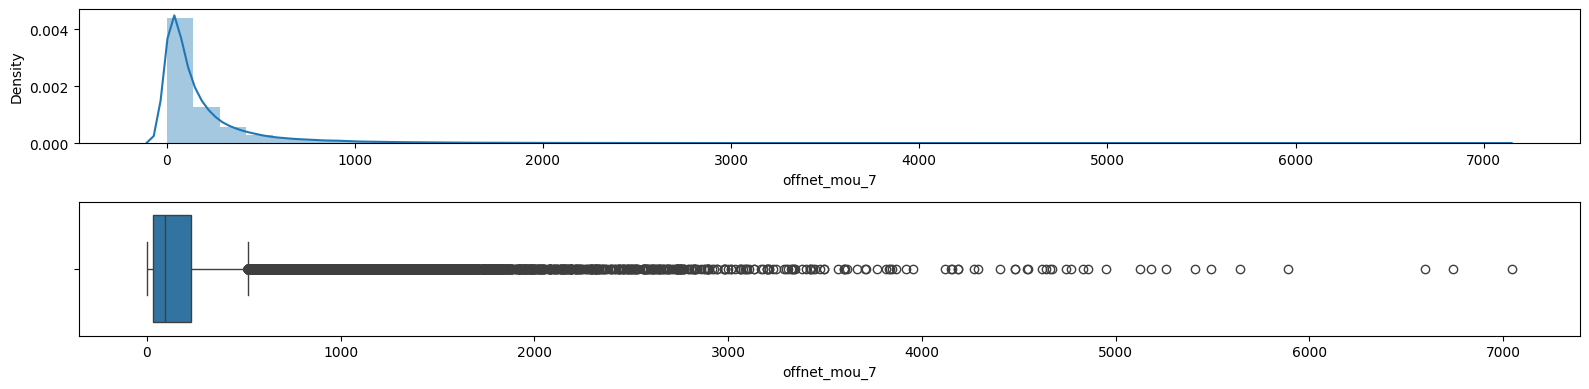

plot feature: offnet_mou_8


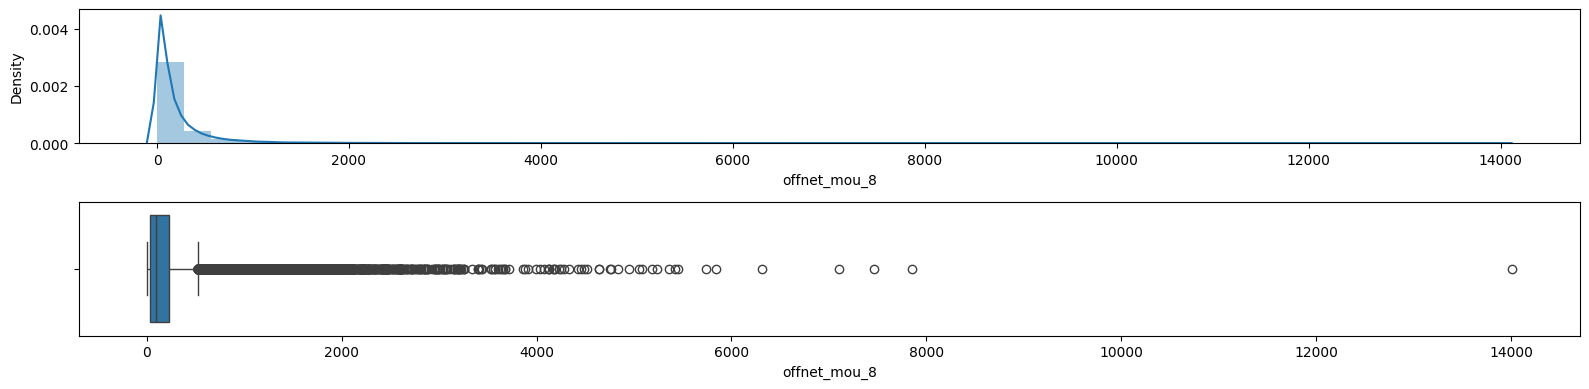

plot feature: roam_ic_mou_6


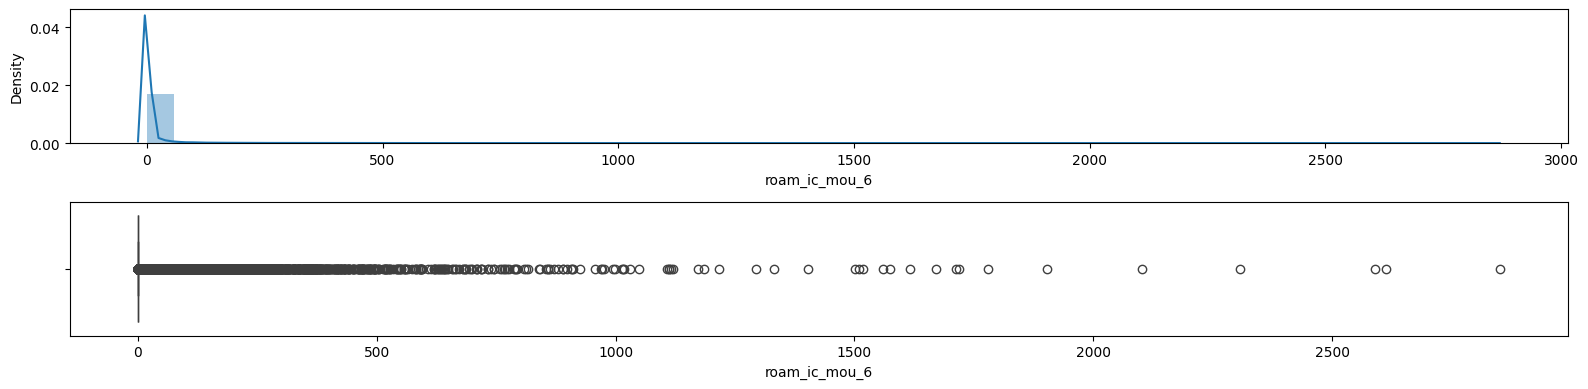

plot feature: roam_ic_mou_7


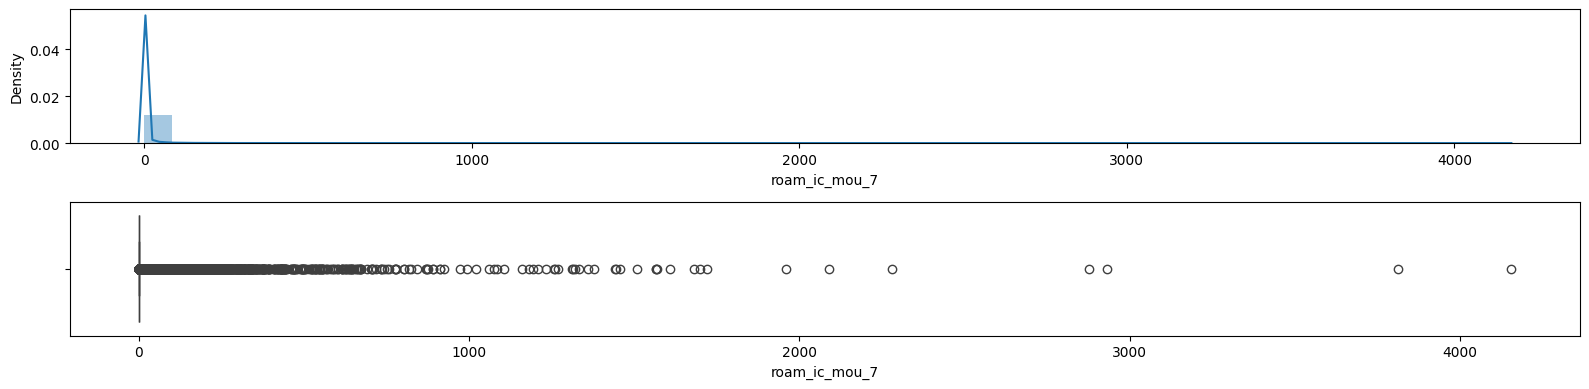

plot feature: roam_ic_mou_8


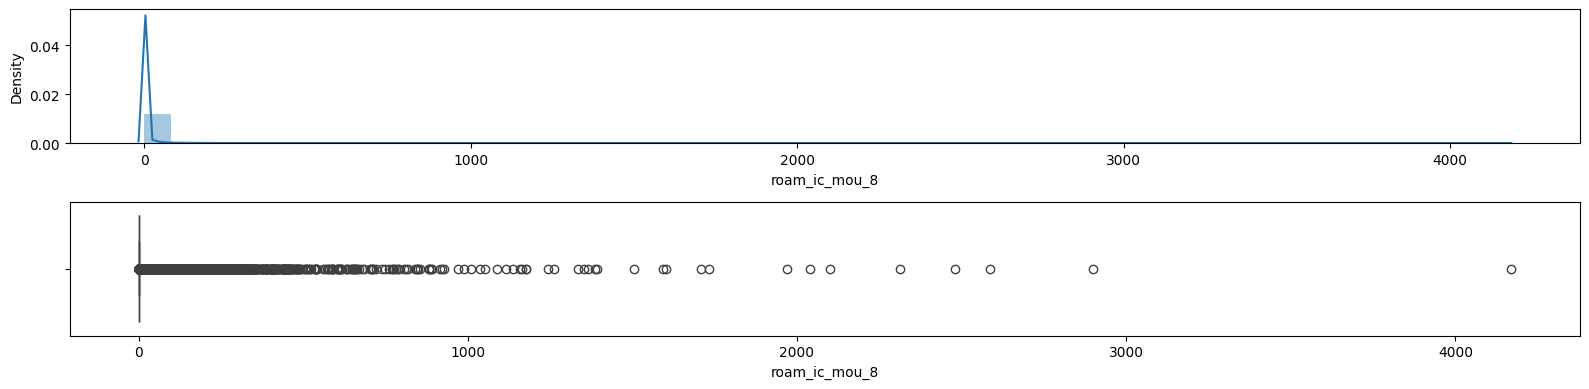

plot feature: roam_og_mou_6


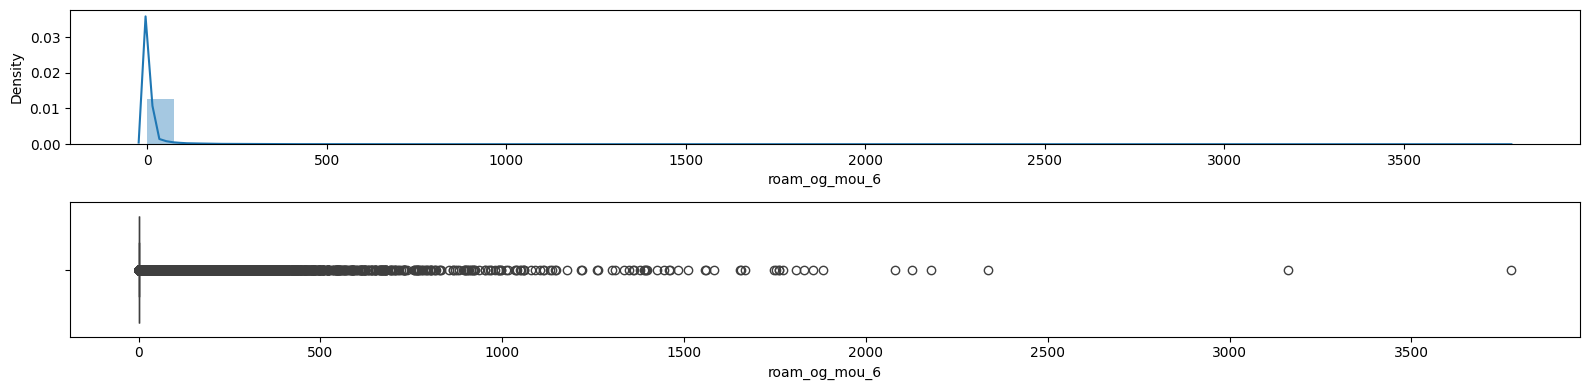

plot feature: roam_og_mou_7


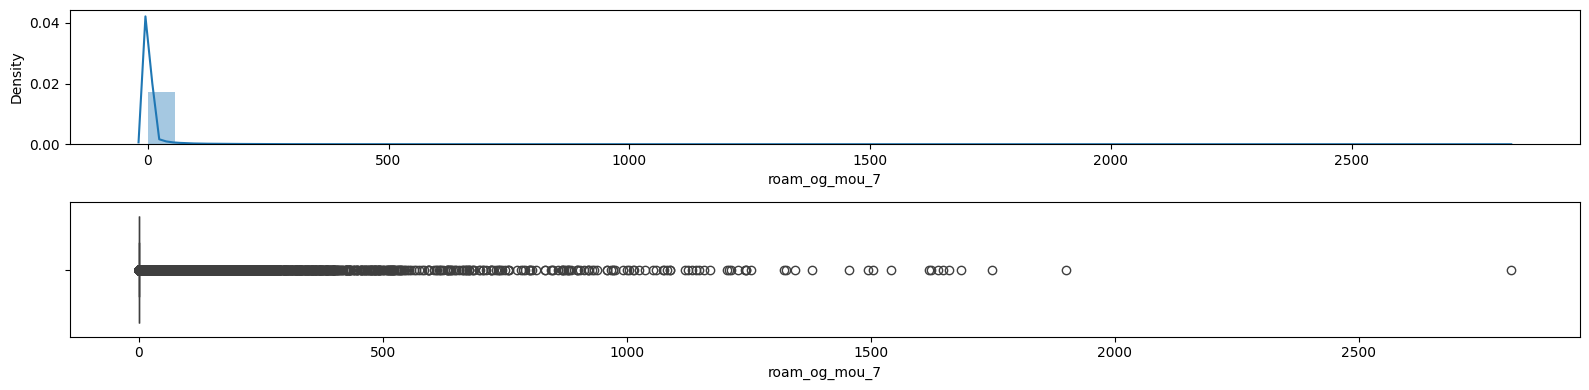

plot feature: roam_og_mou_8


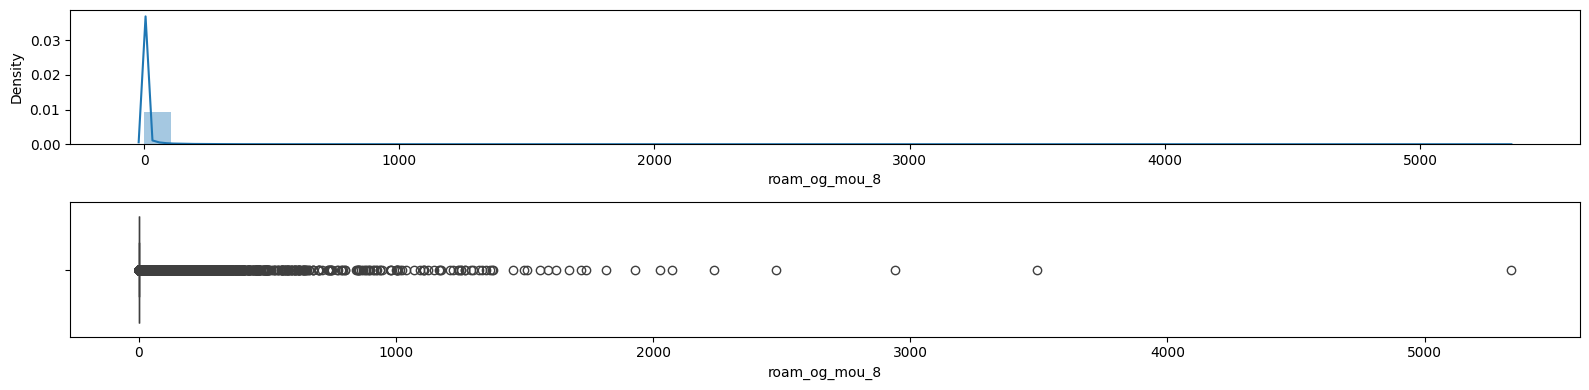

plot feature: loc_og_t2t_mou_6


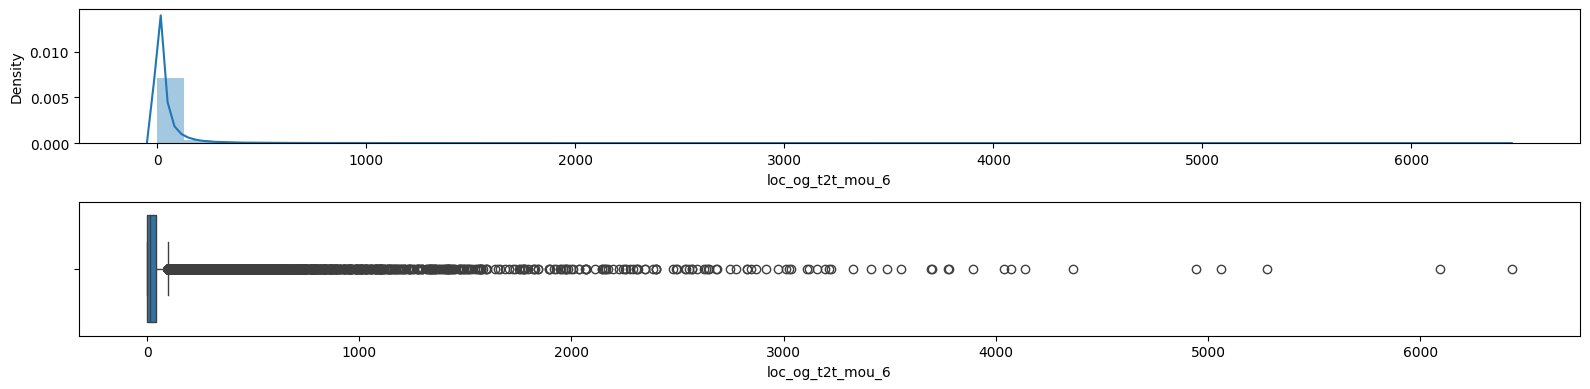

plot feature: loc_og_t2t_mou_7


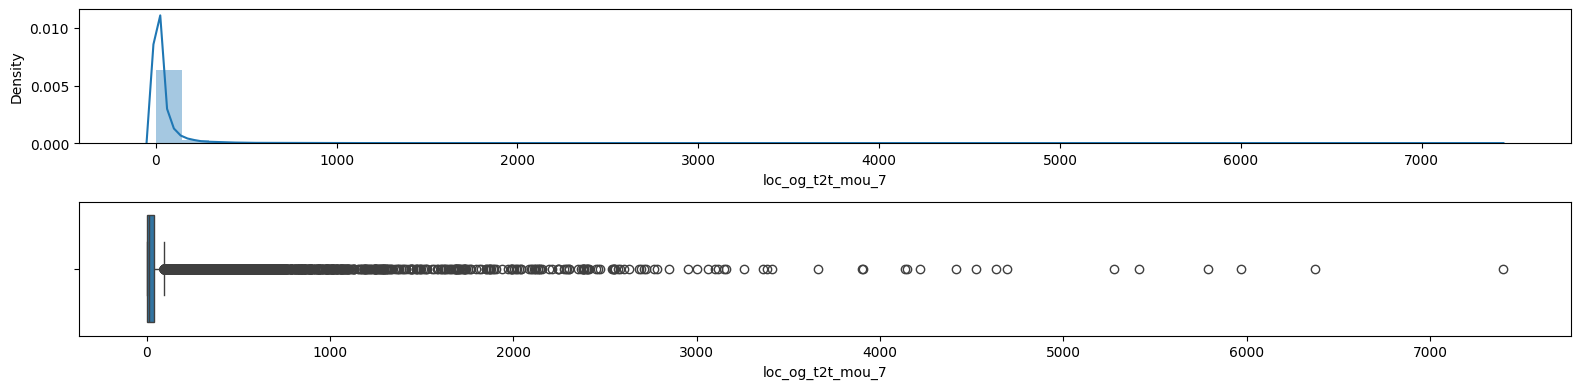

plot feature: loc_og_t2t_mou_8


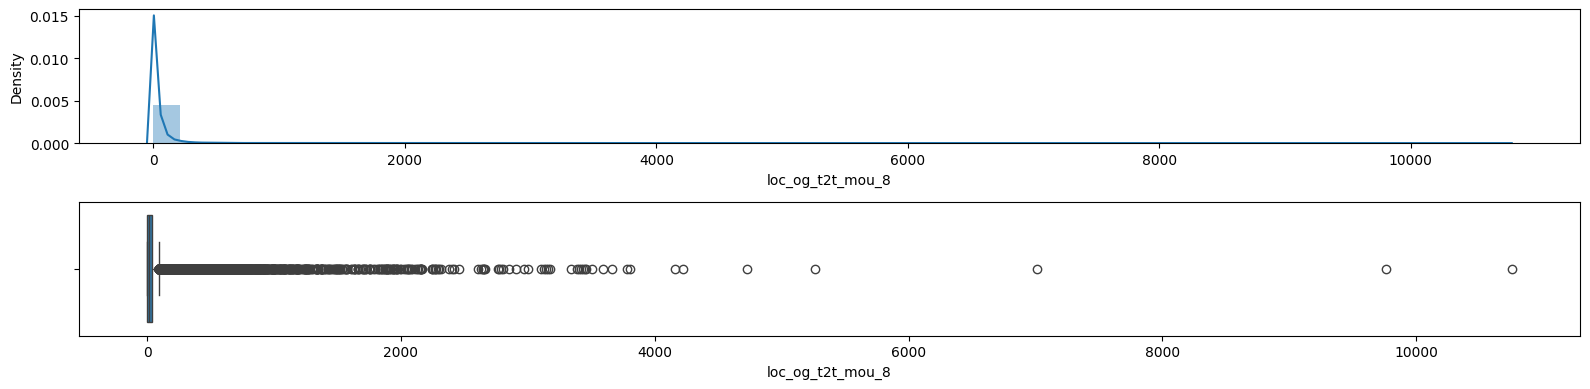

plot feature: loc_og_t2m_mou_6


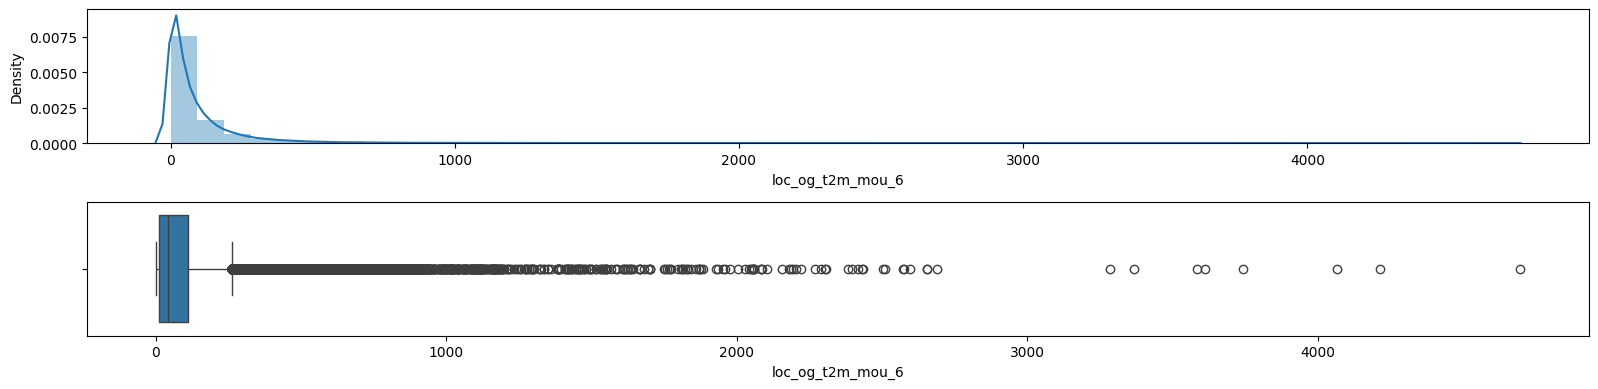

plot feature: loc_og_t2m_mou_7


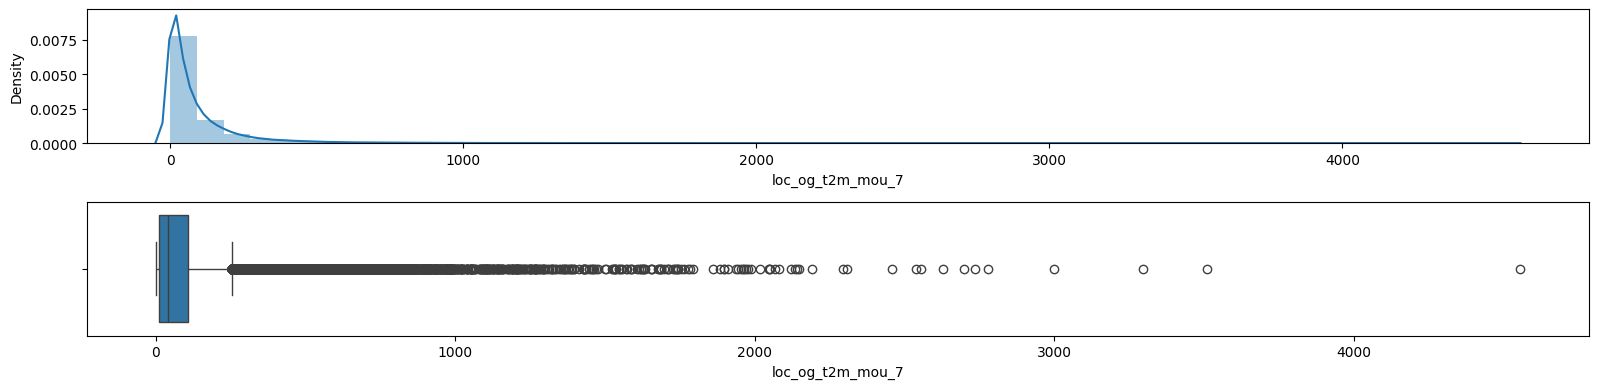

plot feature: loc_og_t2m_mou_8


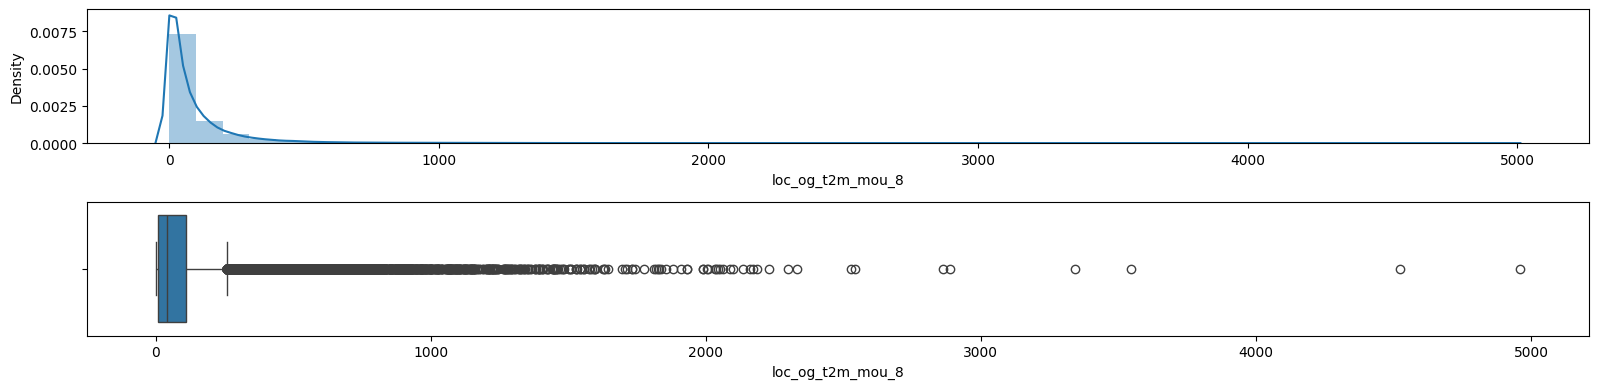

plot feature: loc_og_t2f_mou_6


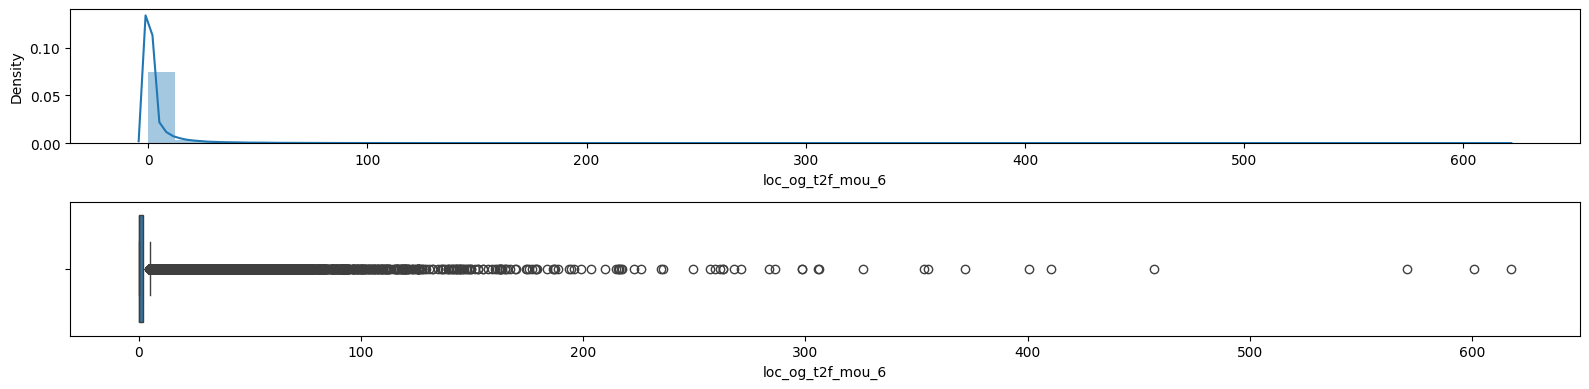

plot feature: loc_og_t2f_mou_7


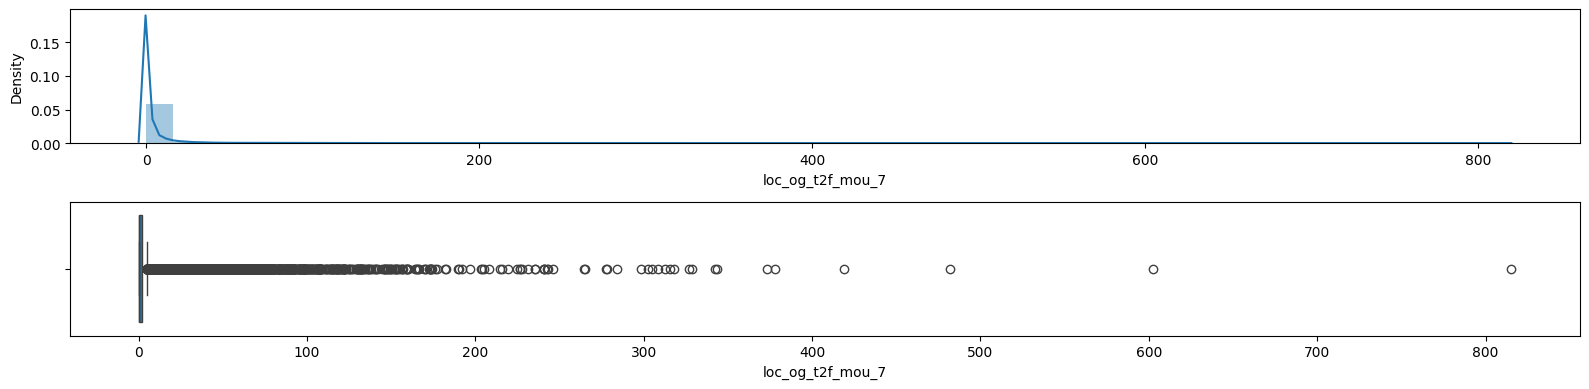

plot feature: loc_og_t2f_mou_8


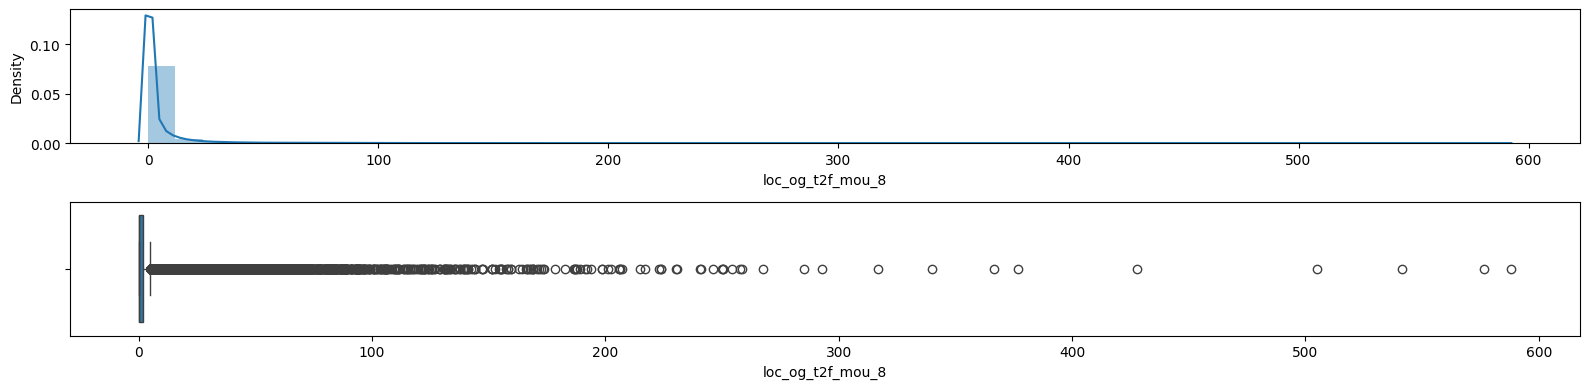

plot feature: loc_og_t2c_mou_6


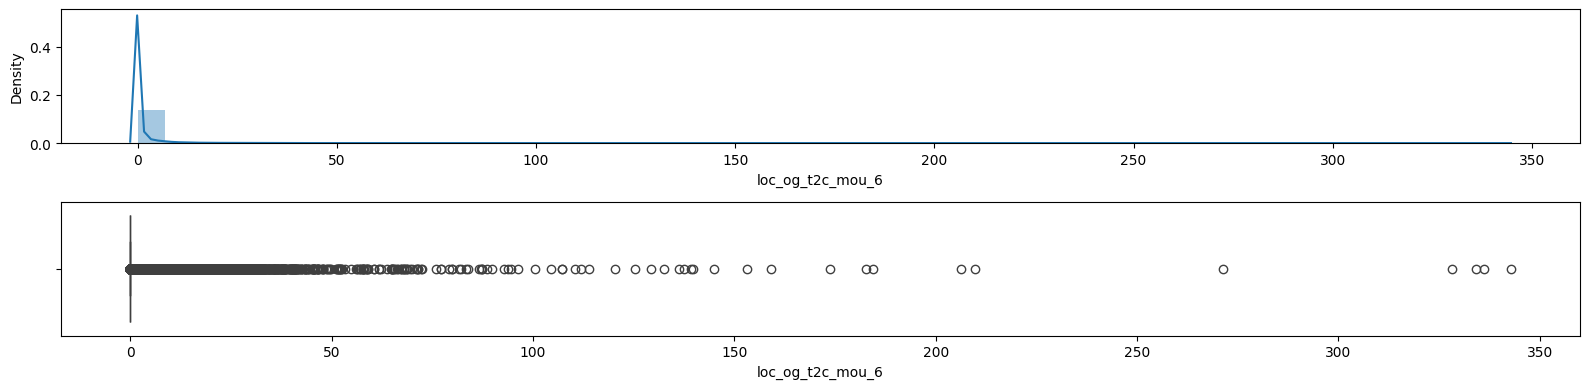

plot feature: loc_og_t2c_mou_7


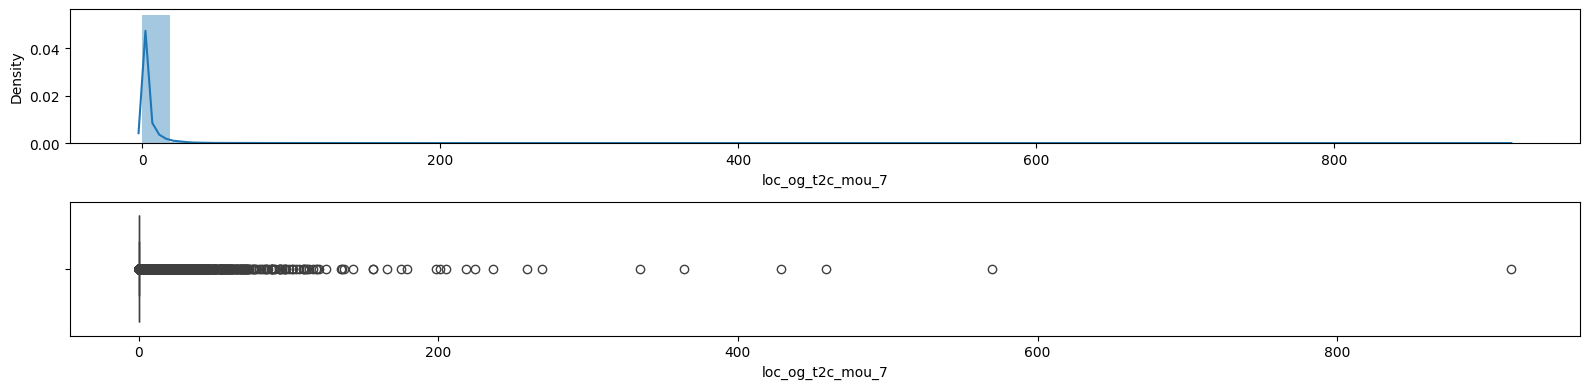

plot feature: loc_og_t2c_mou_8


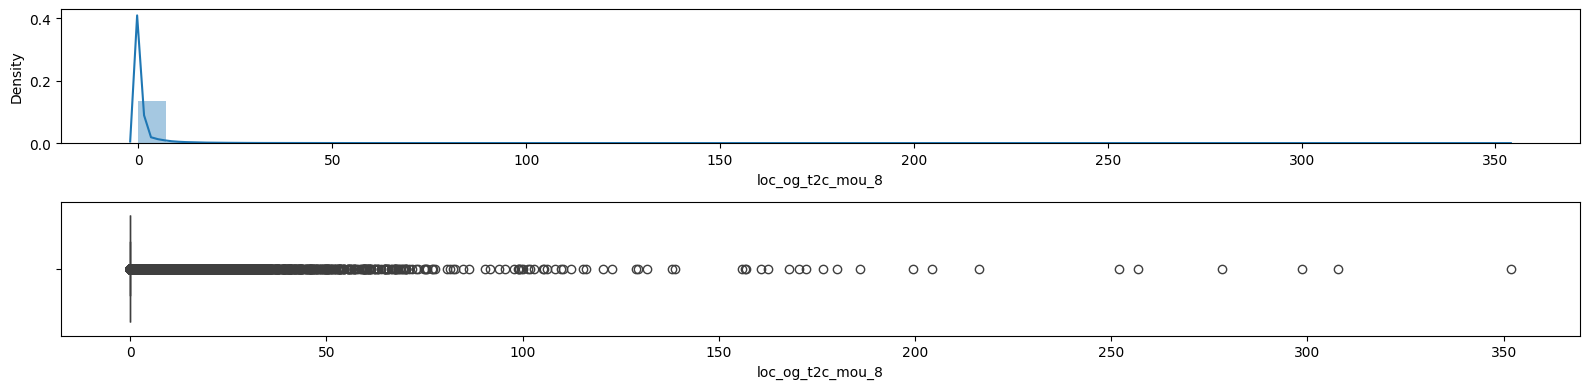

plot feature: loc_og_mou_6


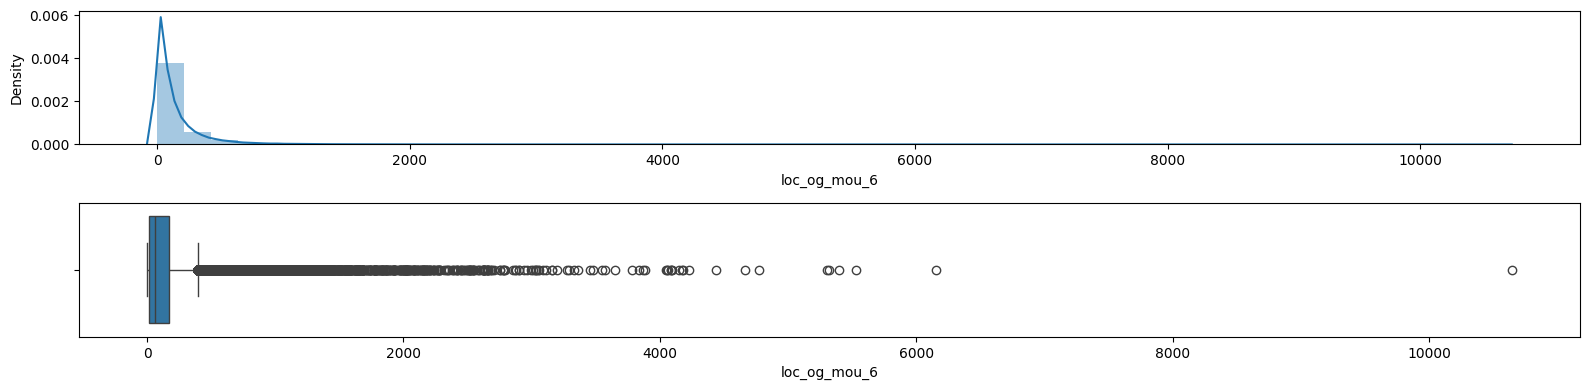

plot feature: loc_og_mou_7


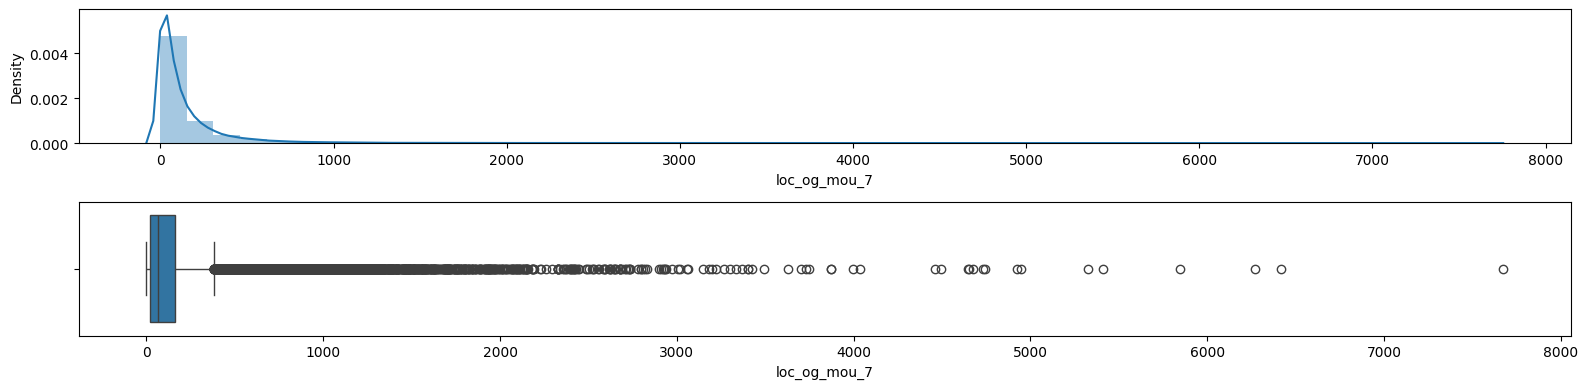

plot feature: loc_og_mou_8


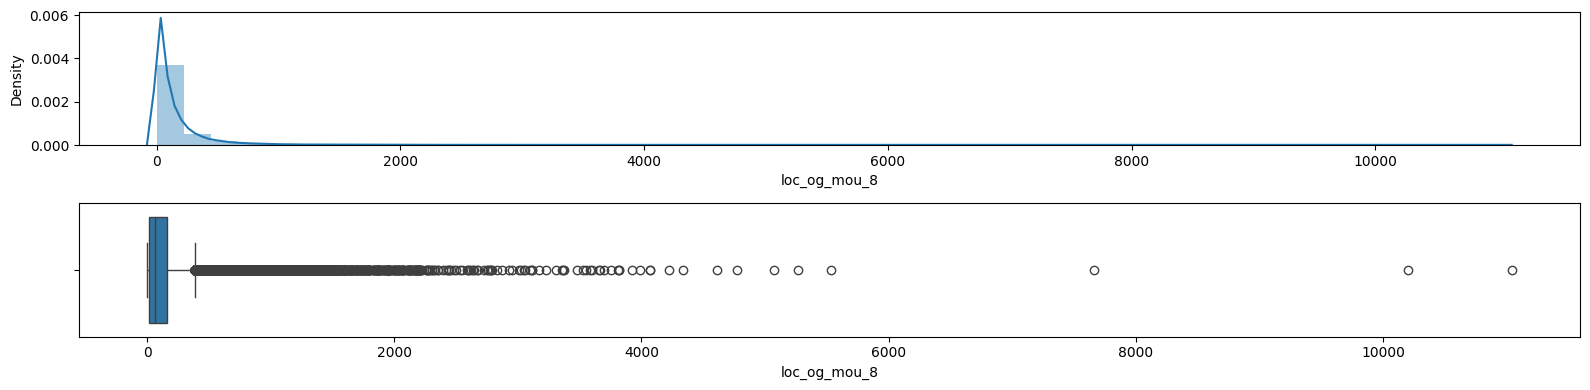

plot feature: std_og_t2t_mou_6


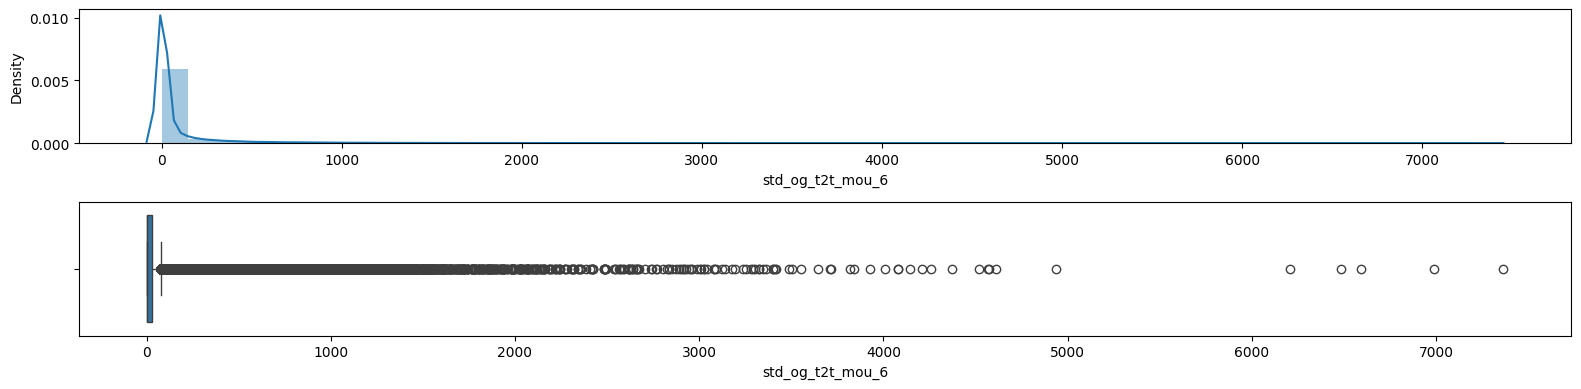

plot feature: std_og_t2t_mou_7


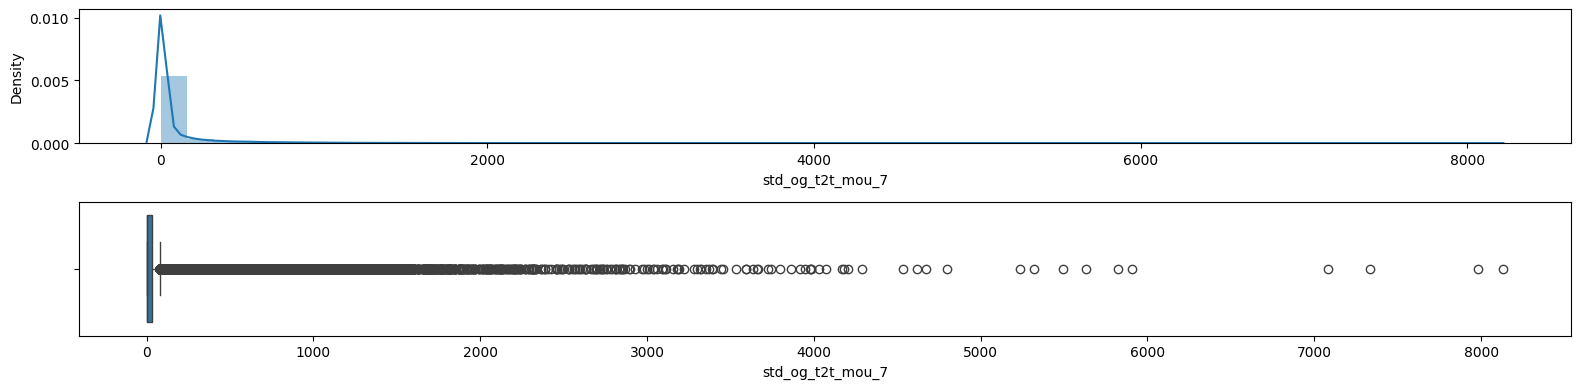

plot feature: std_og_t2t_mou_8


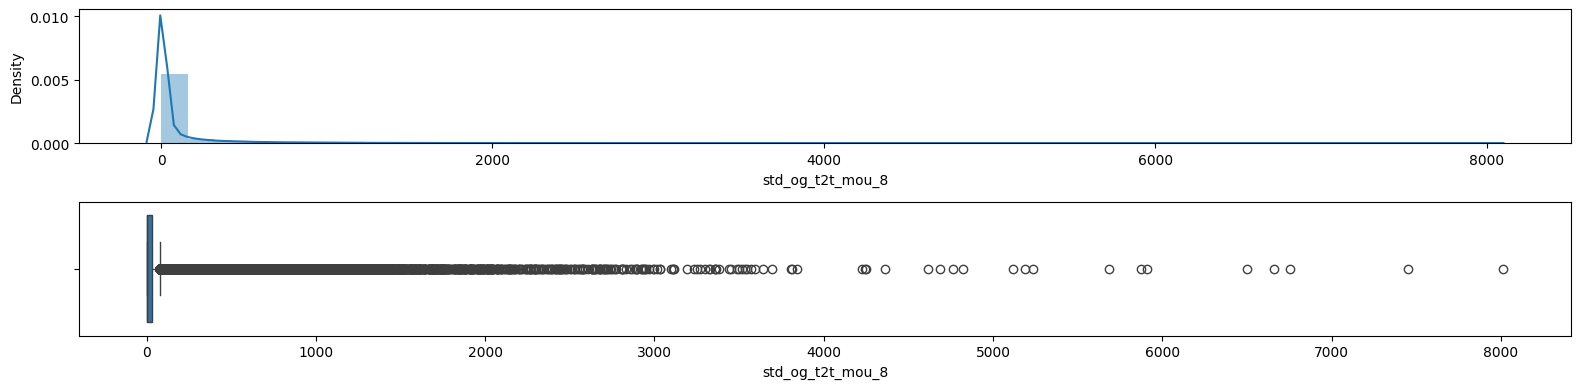

plot feature: std_og_t2m_mou_6


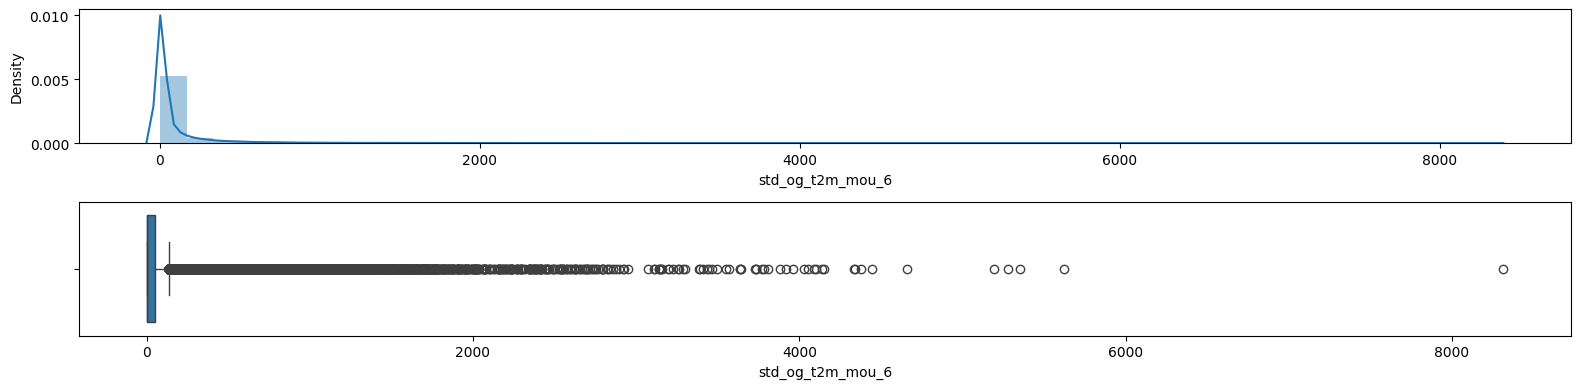

plot feature: std_og_t2m_mou_7


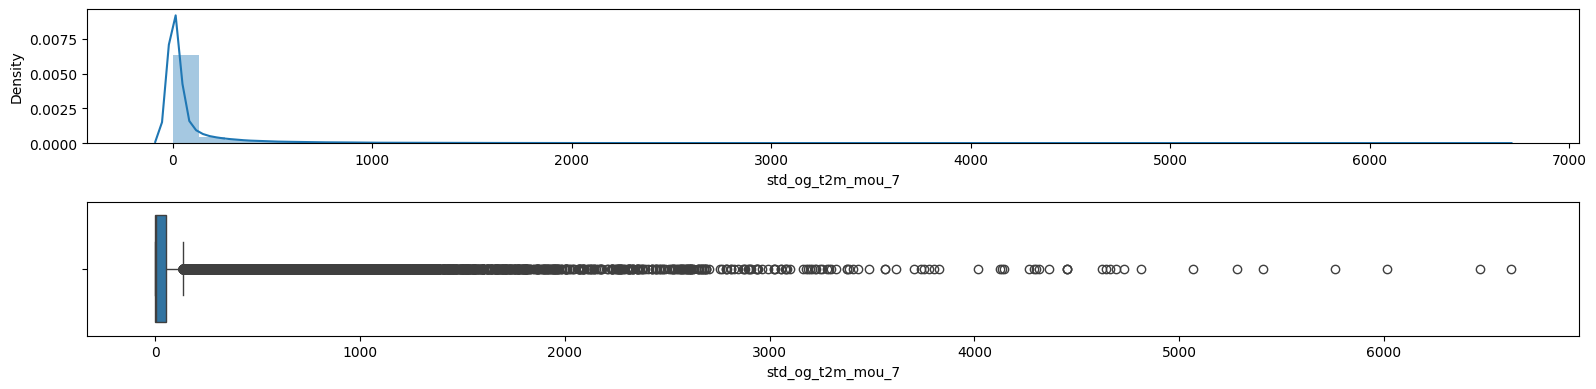

plot feature: std_og_t2m_mou_8


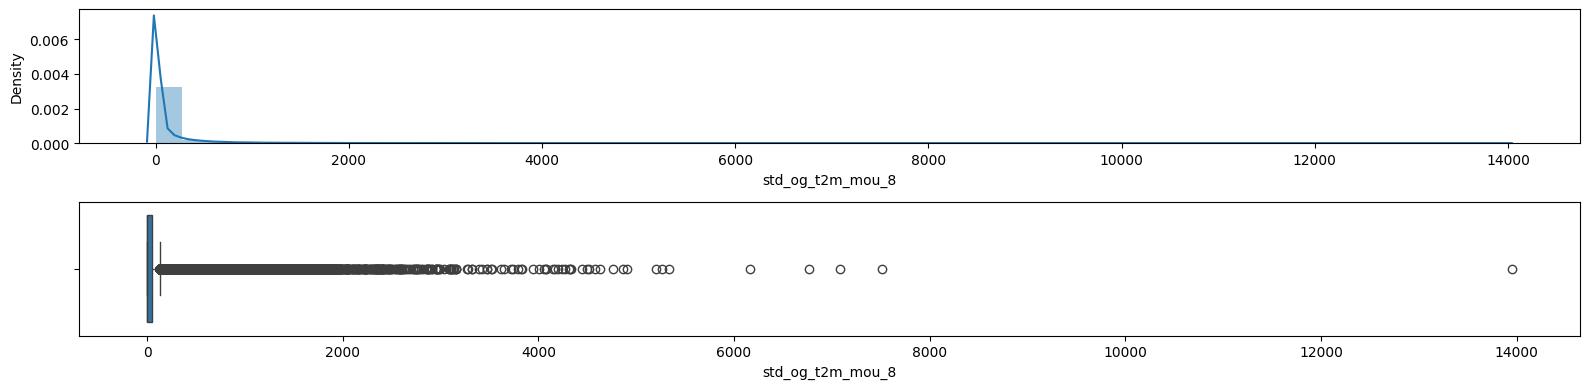

plot feature: std_og_t2f_mou_6


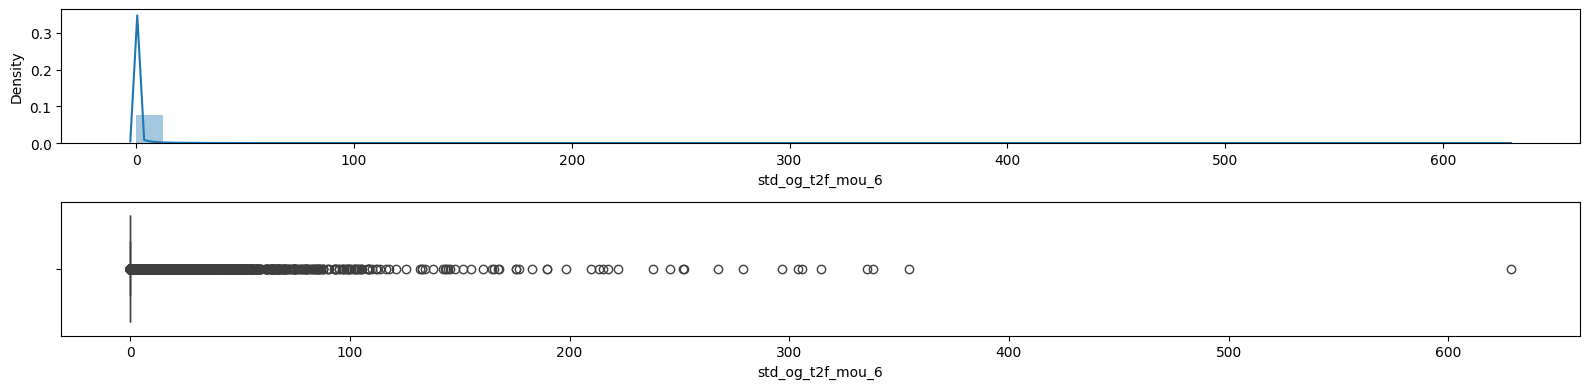

plot feature: std_og_t2f_mou_7


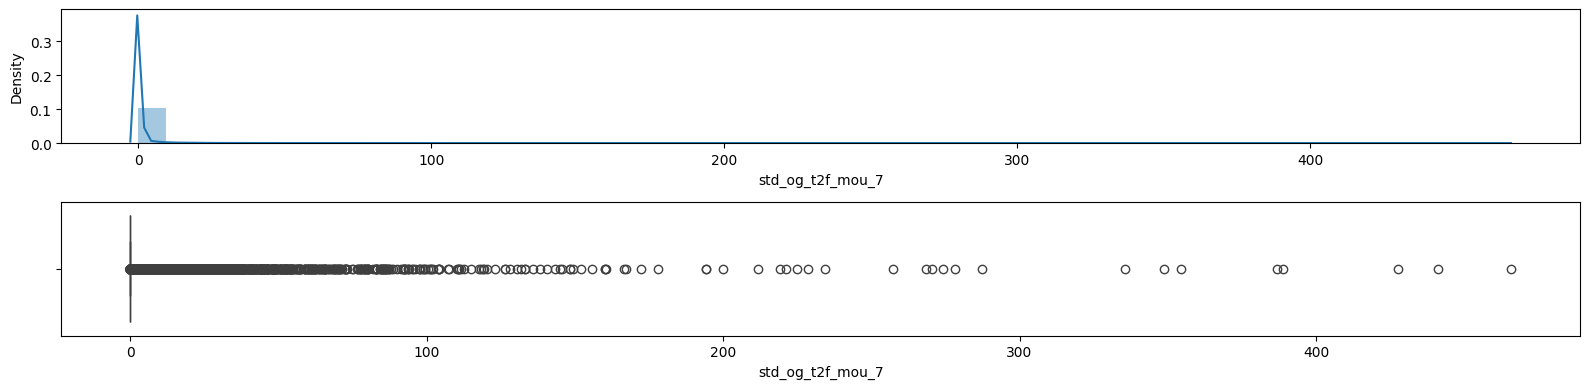

plot feature: std_og_t2f_mou_8


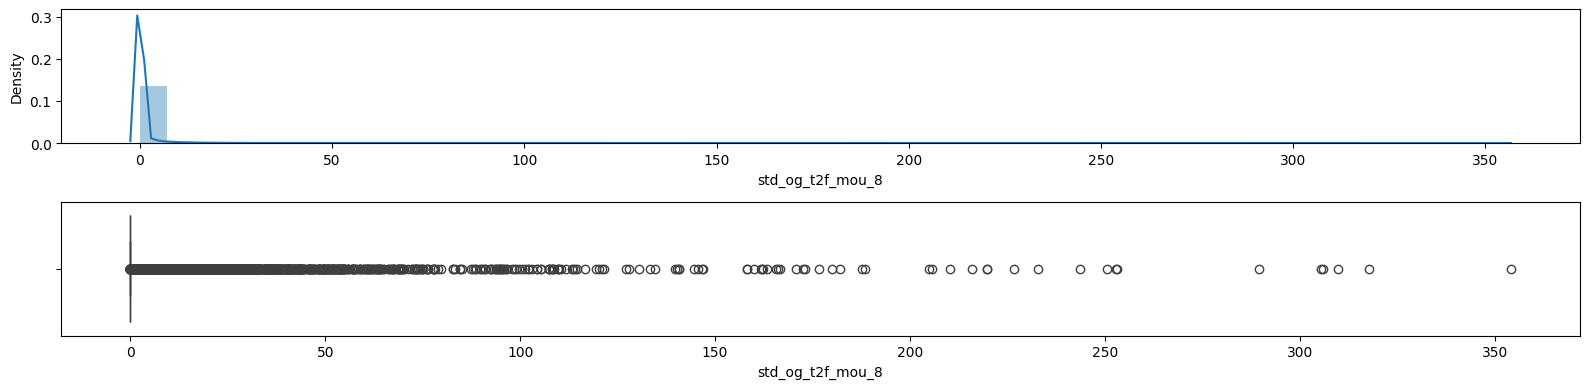

plot feature: std_og_mou_6


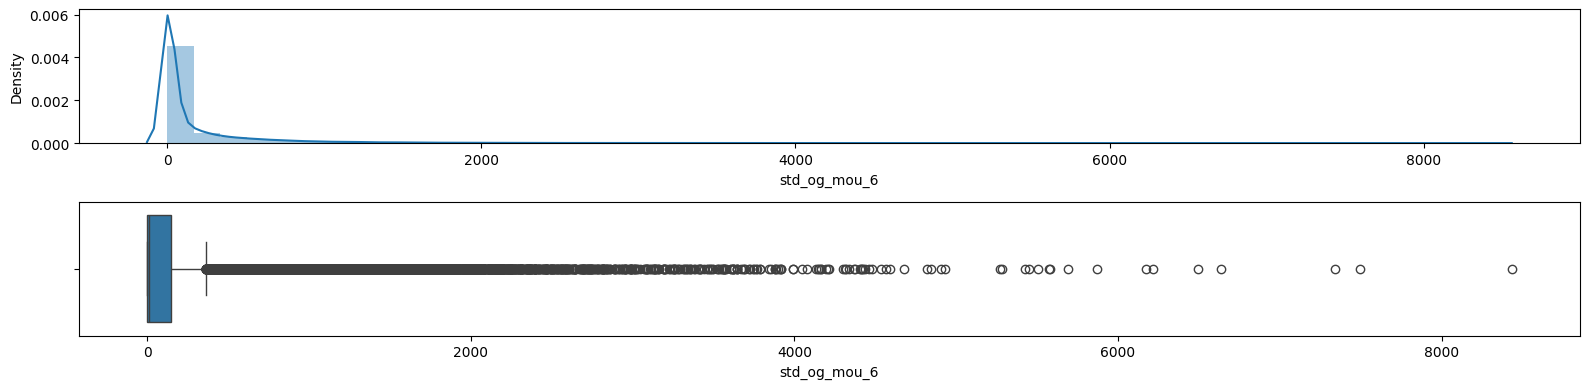

plot feature: std_og_mou_7


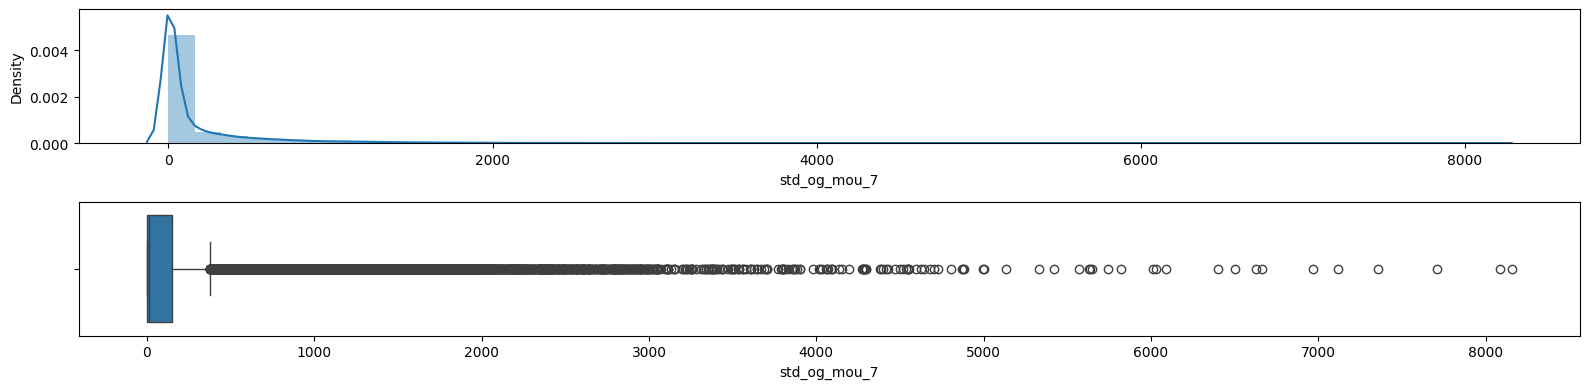

plot feature: std_og_mou_8


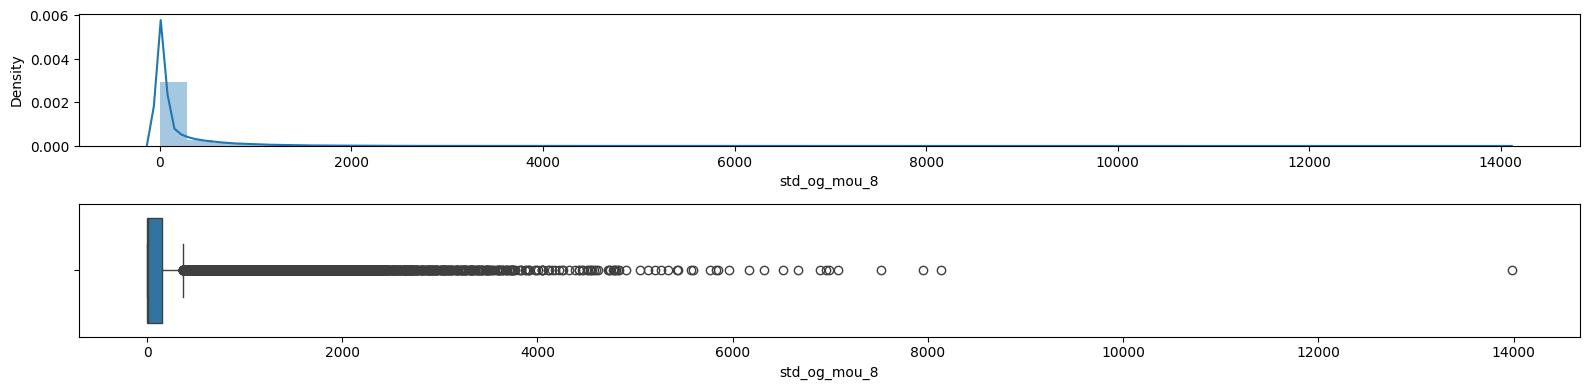

plot feature: isd_og_mou_6


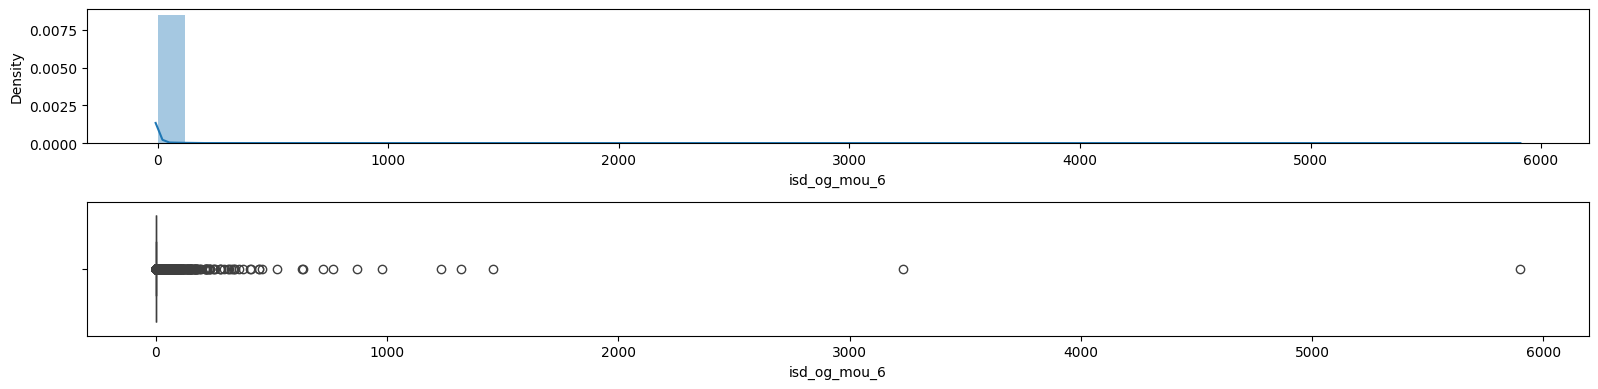

plot feature: isd_og_mou_7


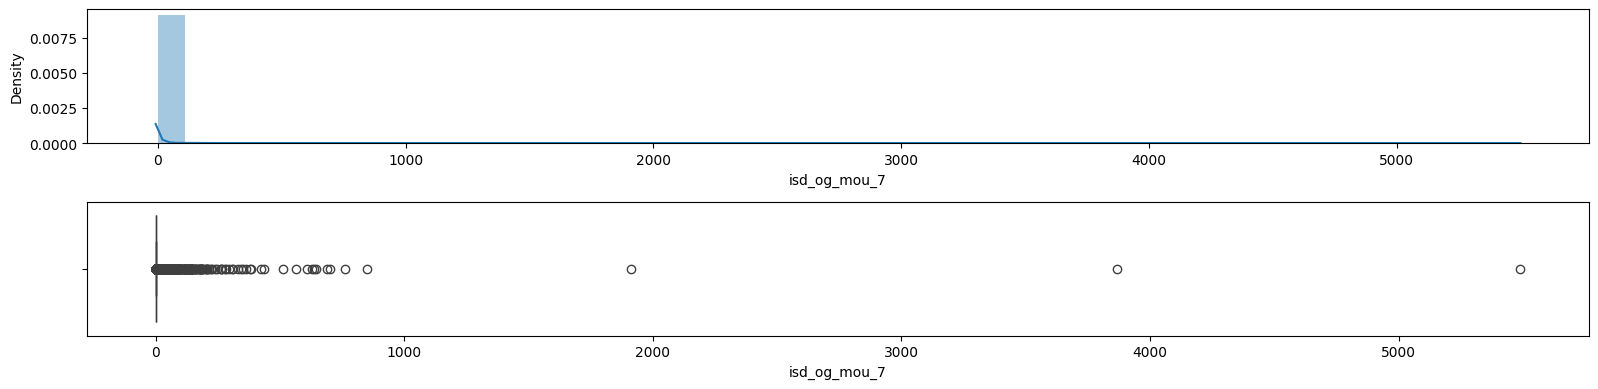

plot feature: isd_og_mou_8


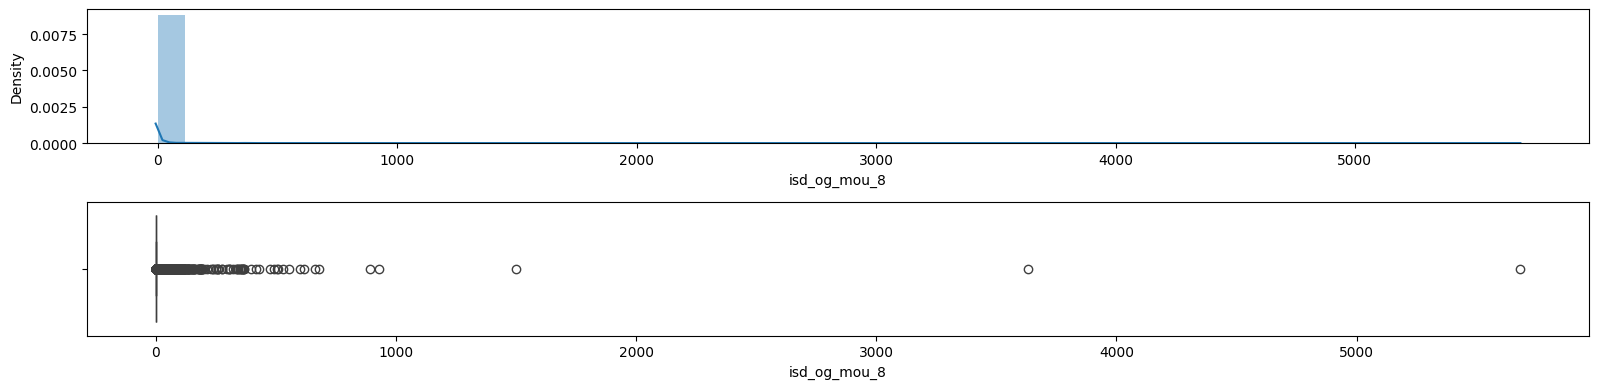

plot feature: spl_og_mou_6


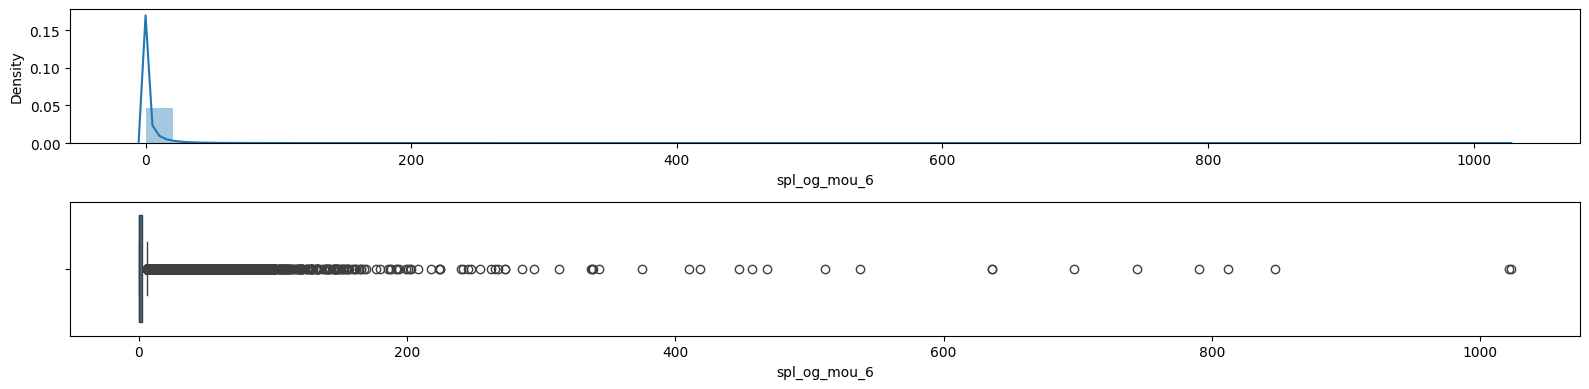

plot feature: spl_og_mou_7


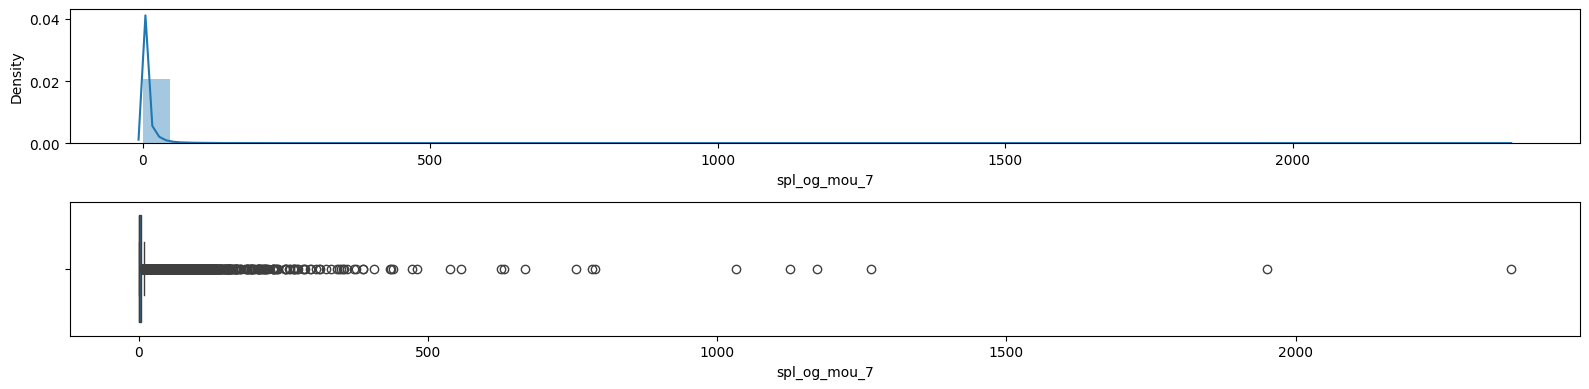

plot feature: spl_og_mou_8


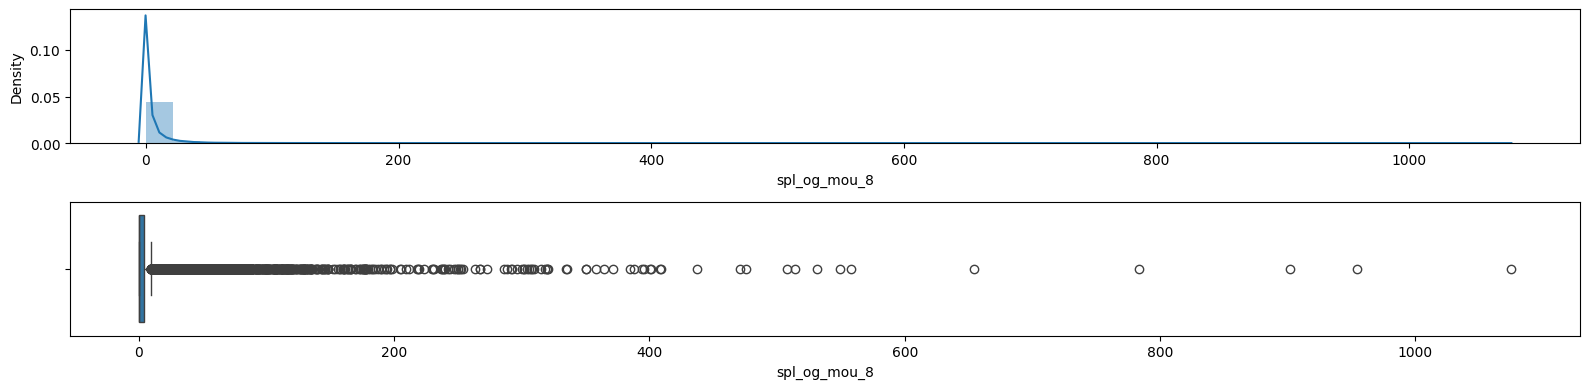

plot feature: og_others_6


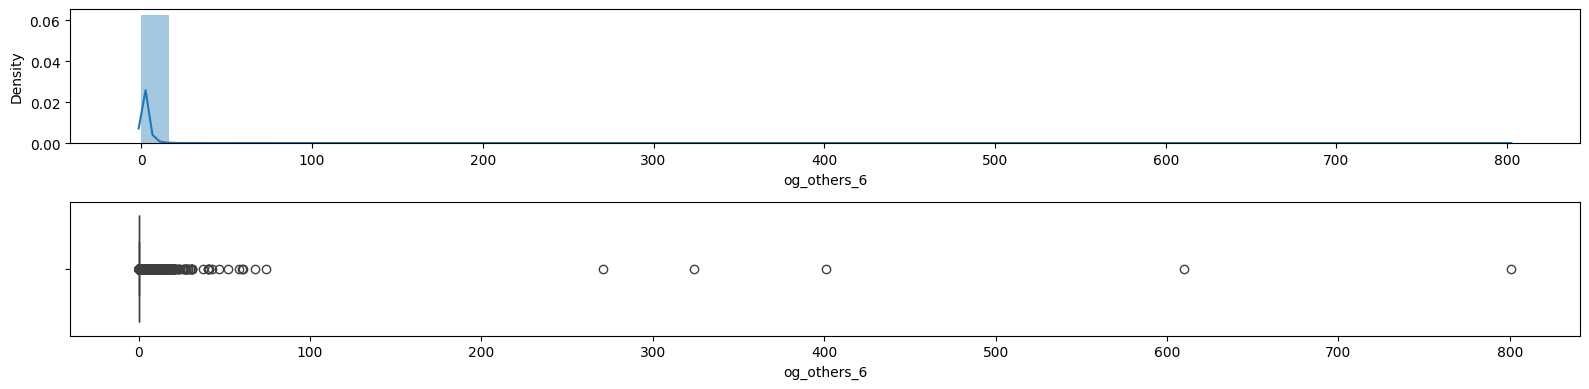

plot feature: og_others_7


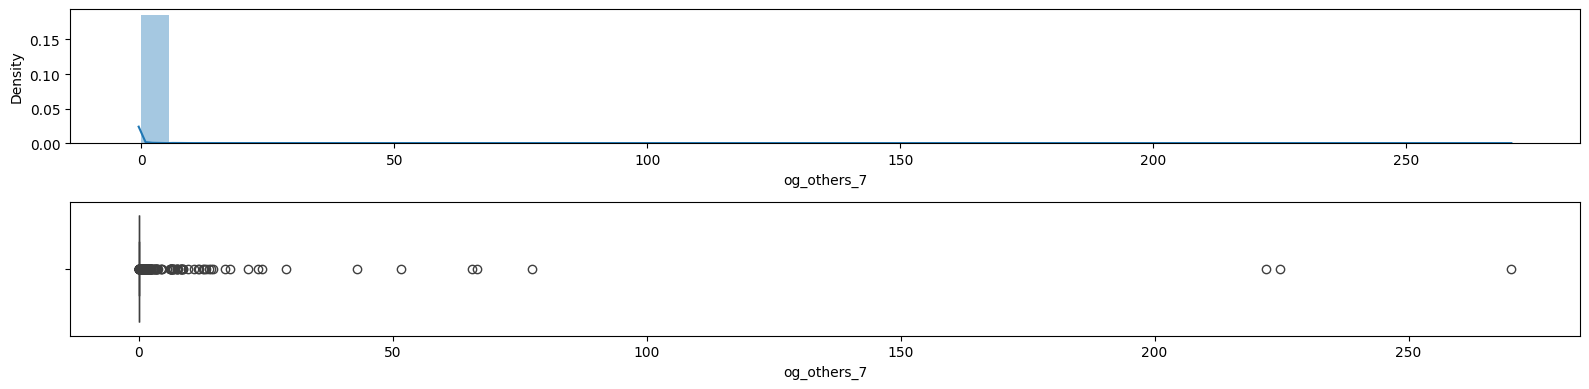

plot feature: og_others_8


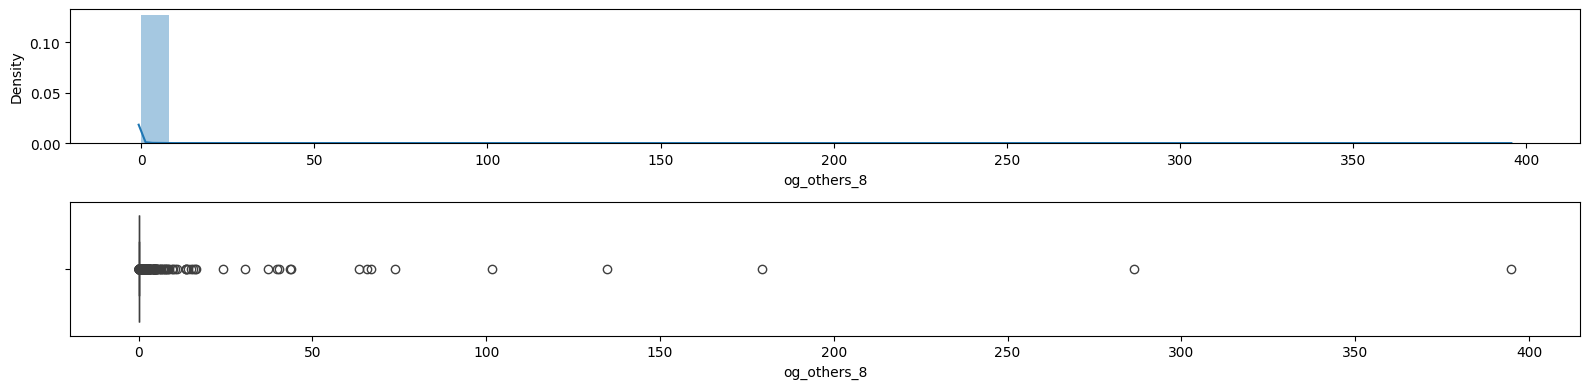

plot feature: total_og_mou_6


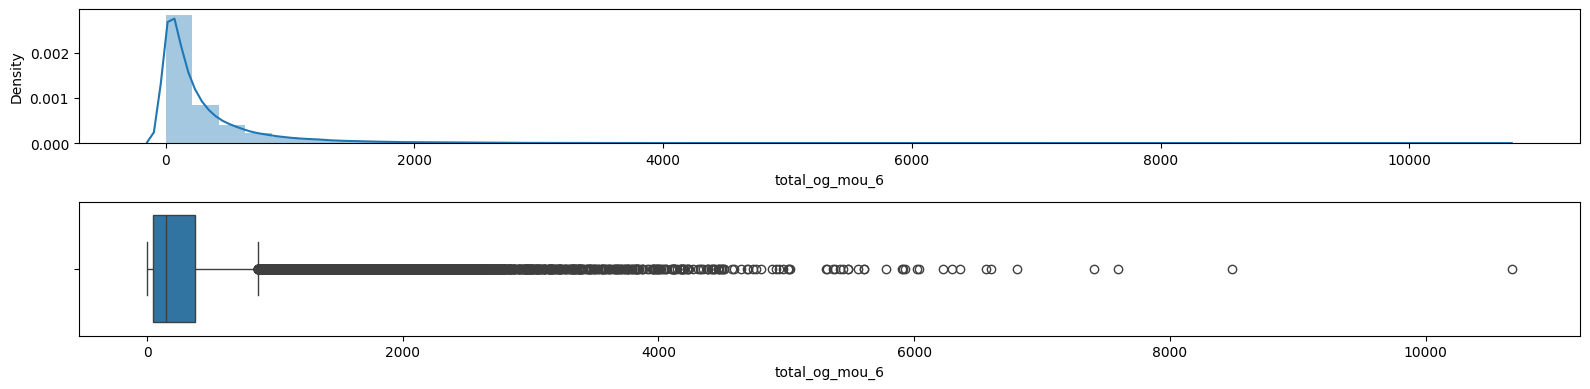

plot feature: total_og_mou_7


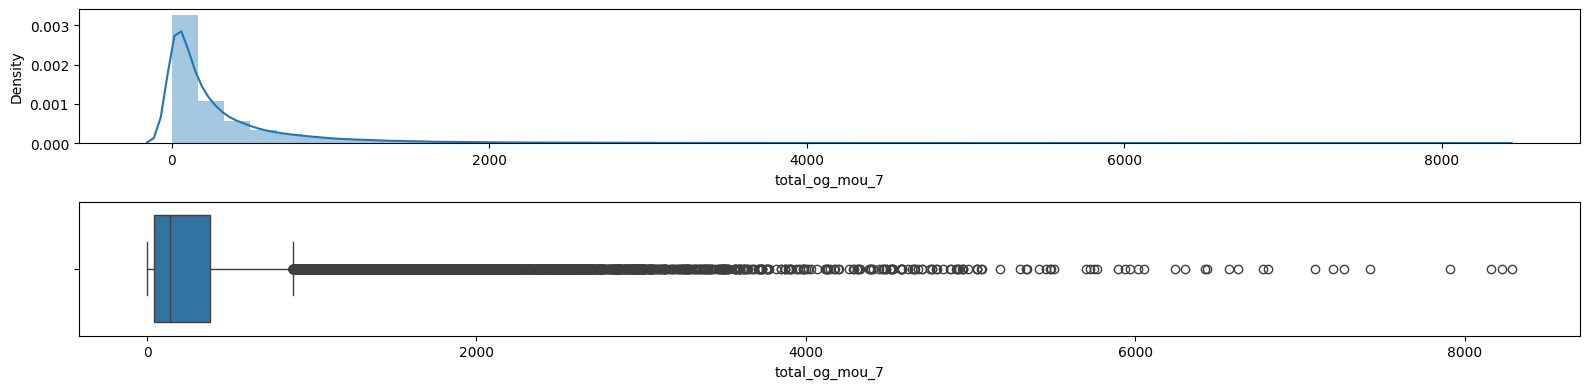

plot feature: total_og_mou_8


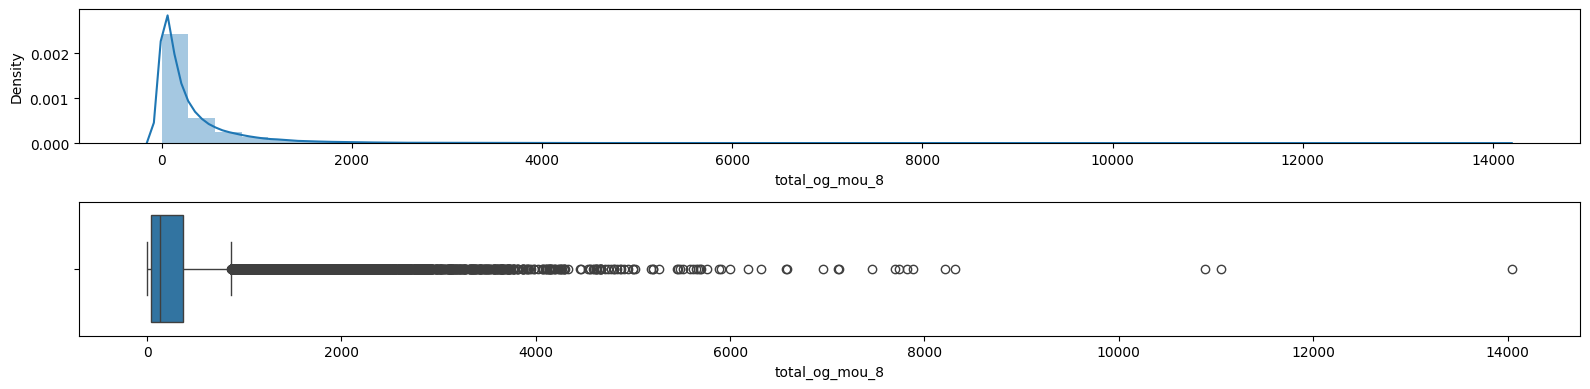

plot feature: loc_ic_t2t_mou_6


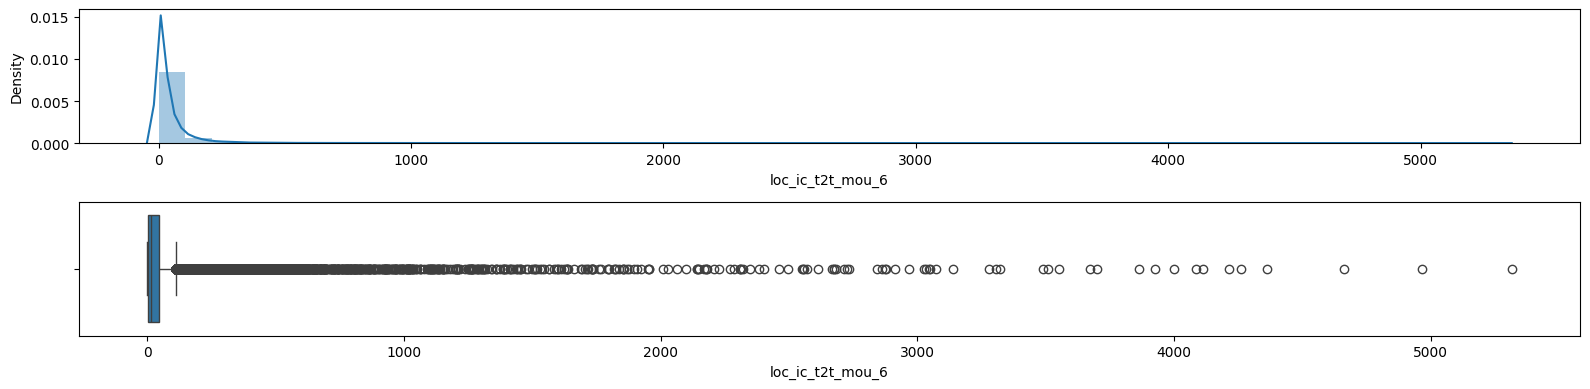

plot feature: loc_ic_t2t_mou_7


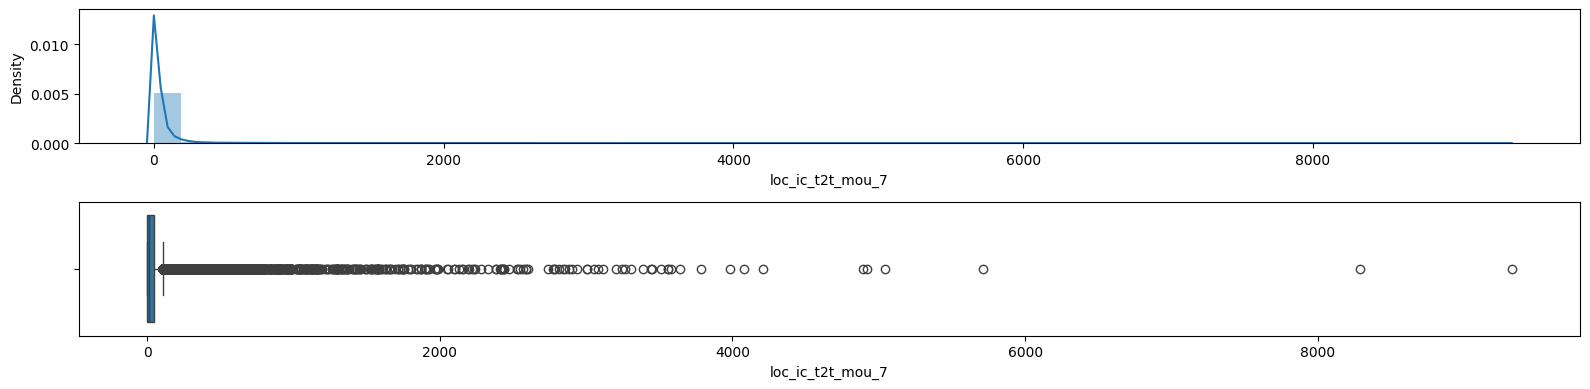

plot feature: loc_ic_t2t_mou_8


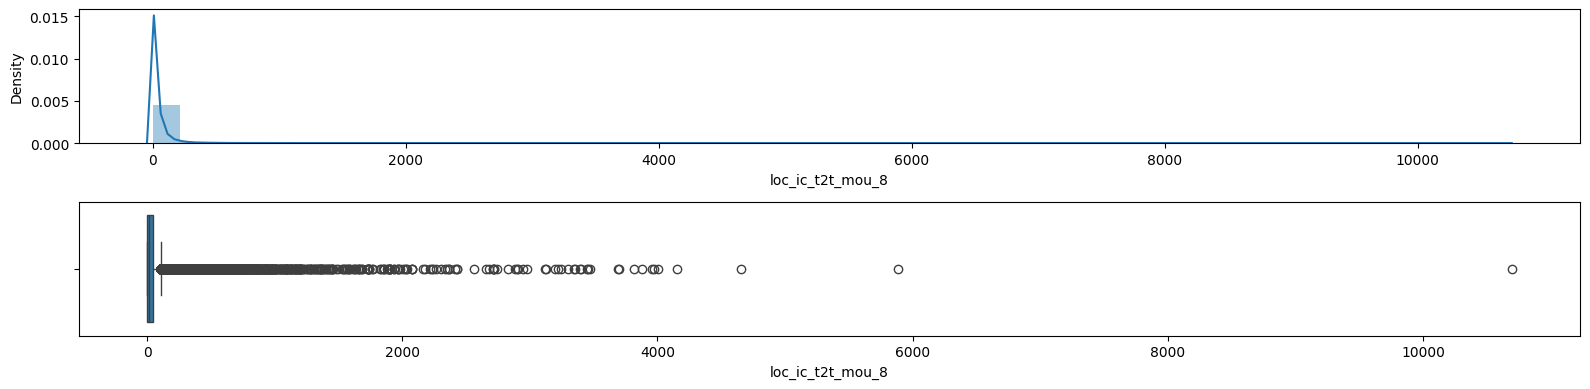

plot feature: loc_ic_t2m_mou_6


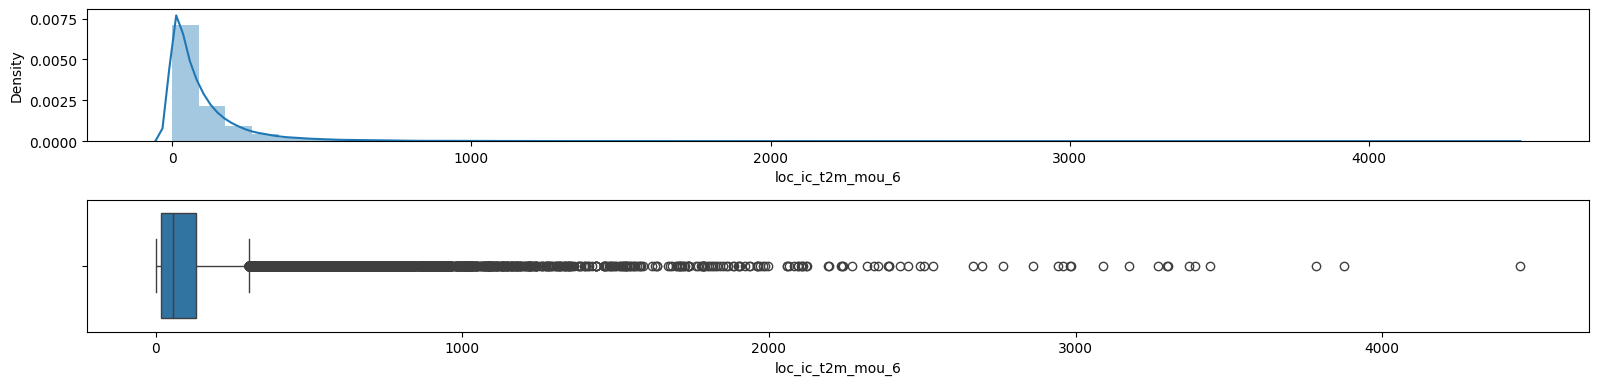

plot feature: loc_ic_t2m_mou_7


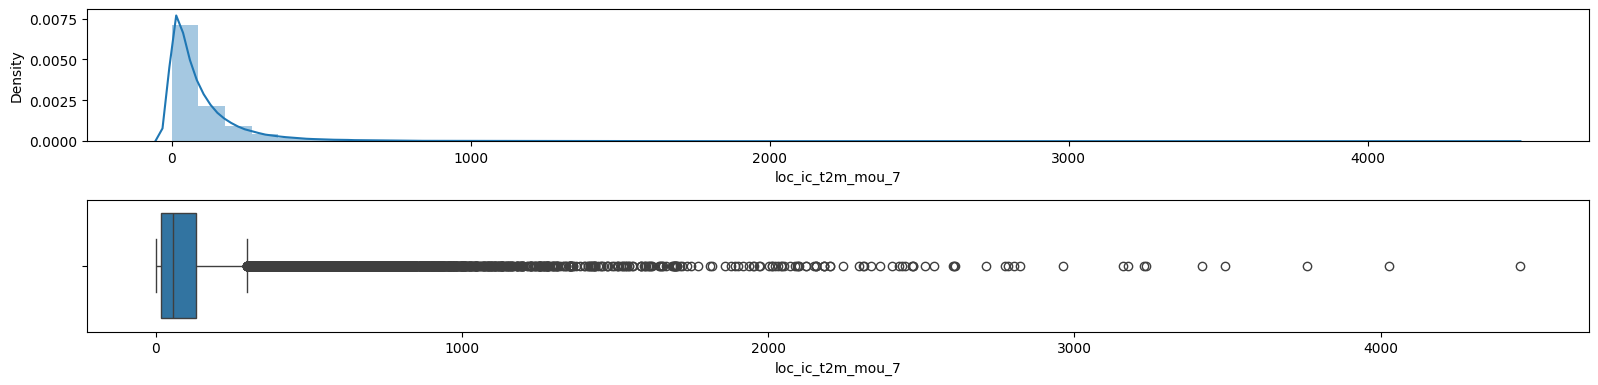

plot feature: loc_ic_t2m_mou_8


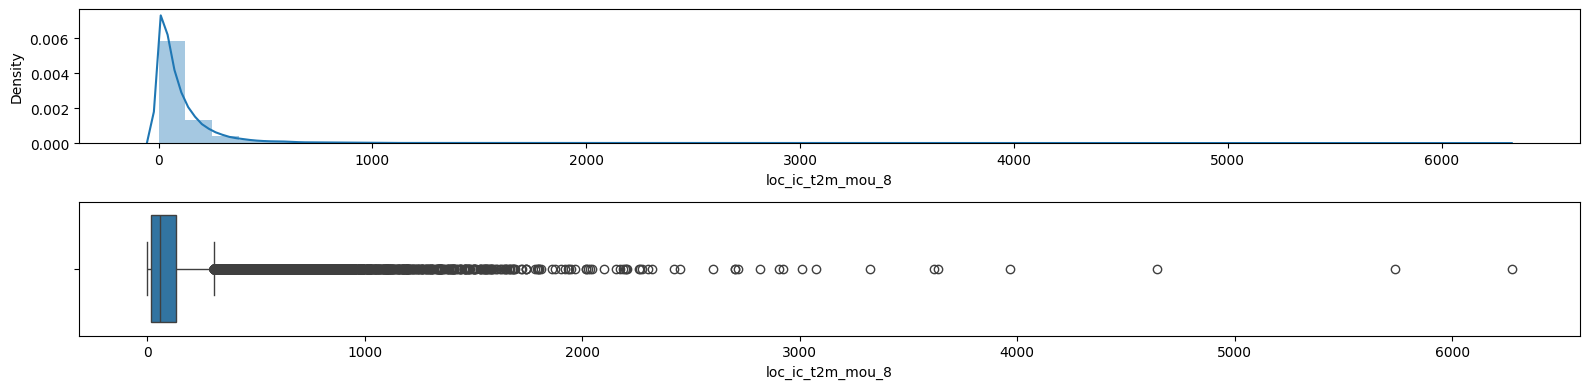

plot feature: loc_ic_t2f_mou_6


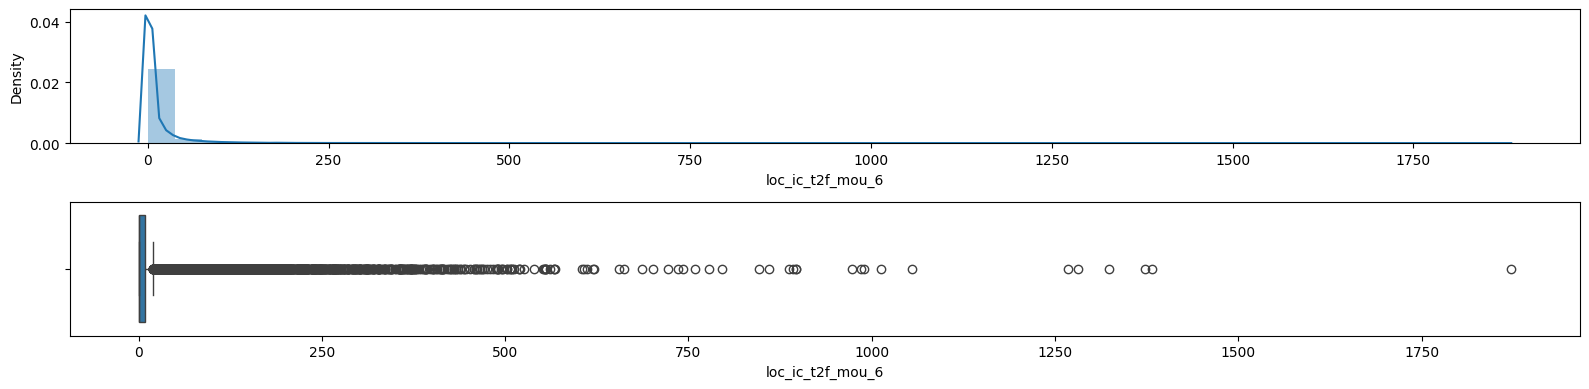

plot feature: loc_ic_t2f_mou_7


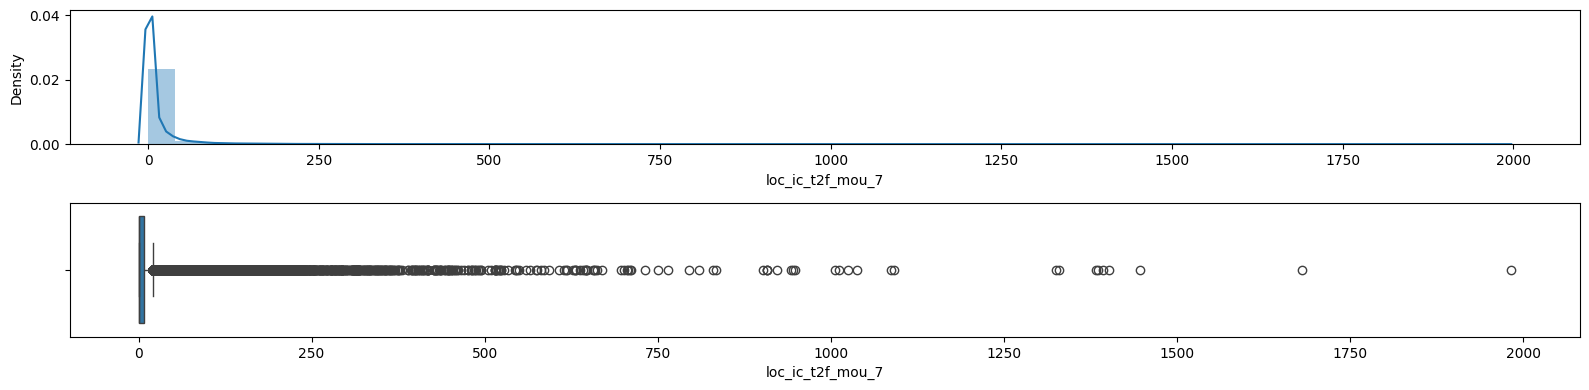

plot feature: loc_ic_t2f_mou_8


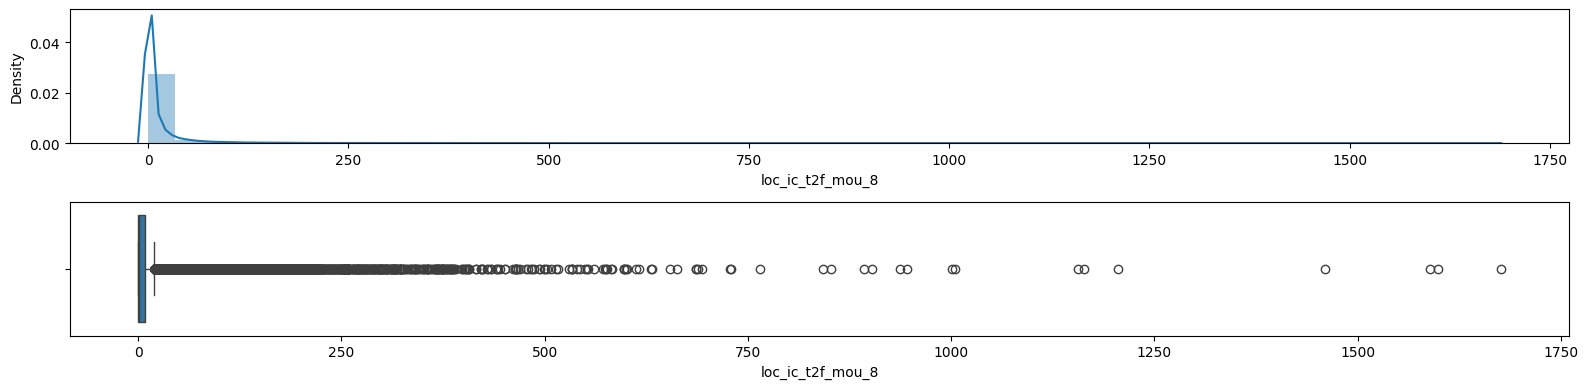

plot feature: loc_ic_mou_6


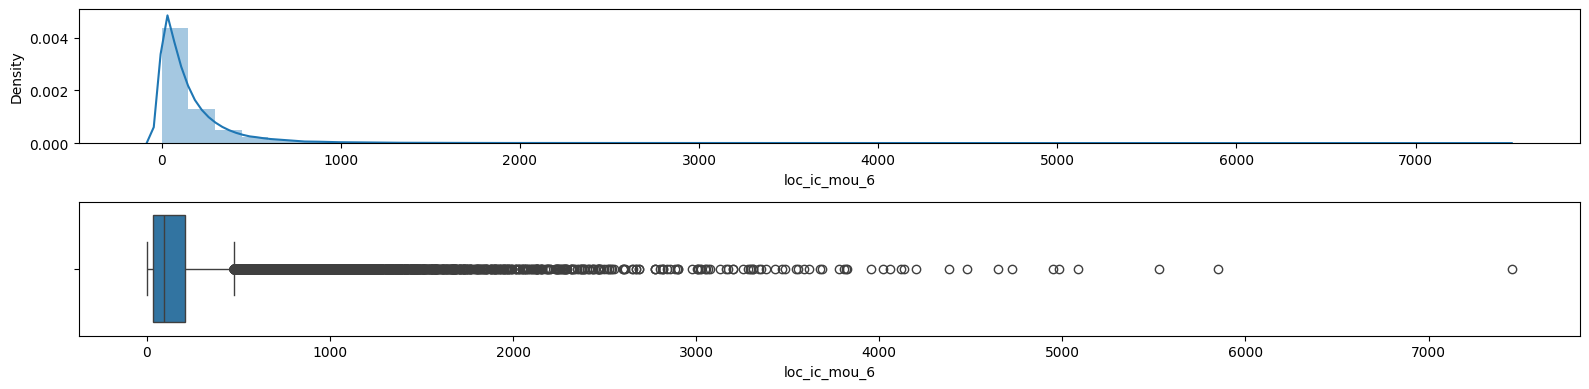

plot feature: loc_ic_mou_7


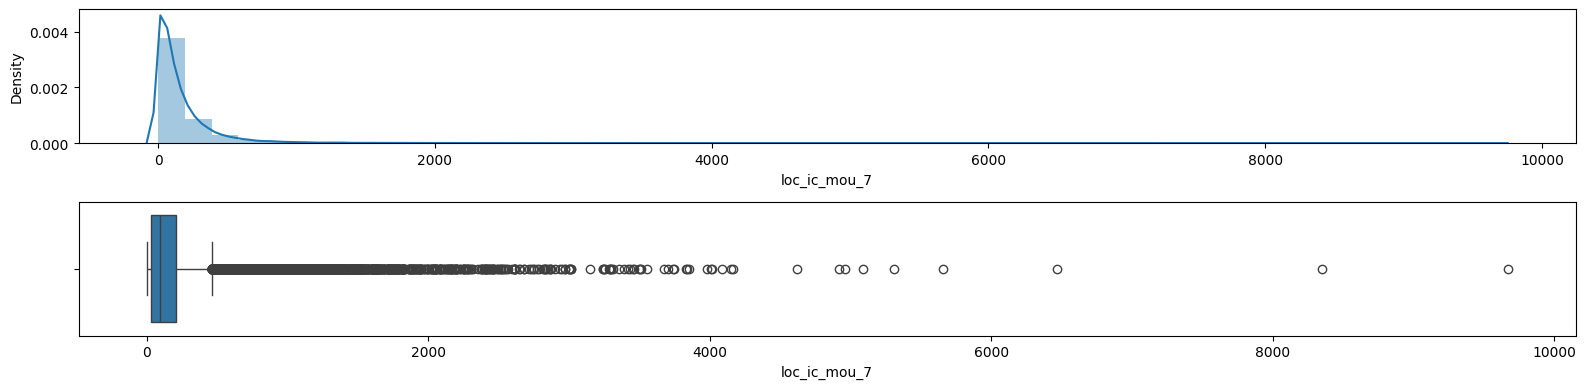

plot feature: loc_ic_mou_8


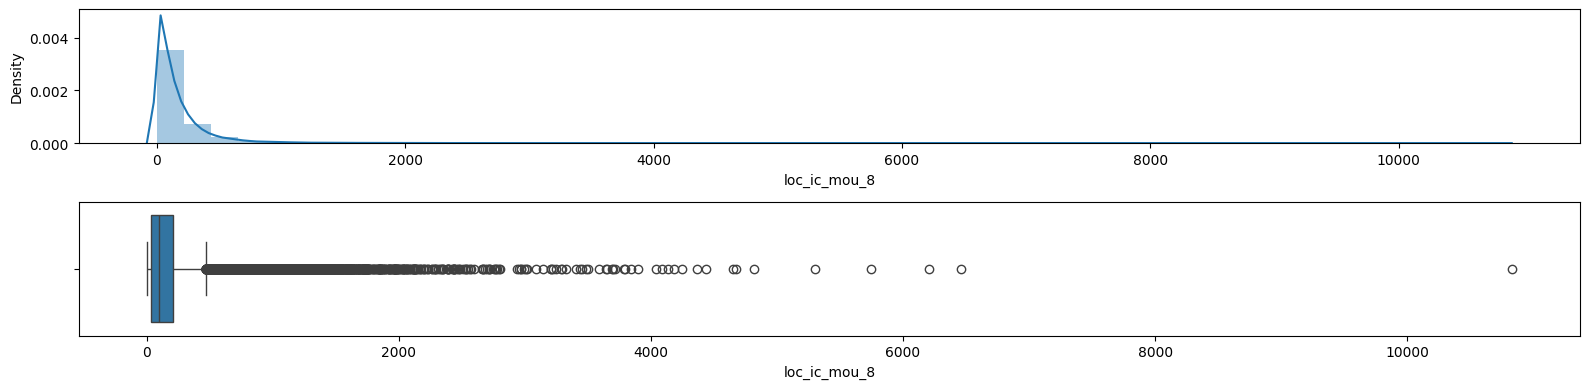

plot feature: std_ic_t2t_mou_6


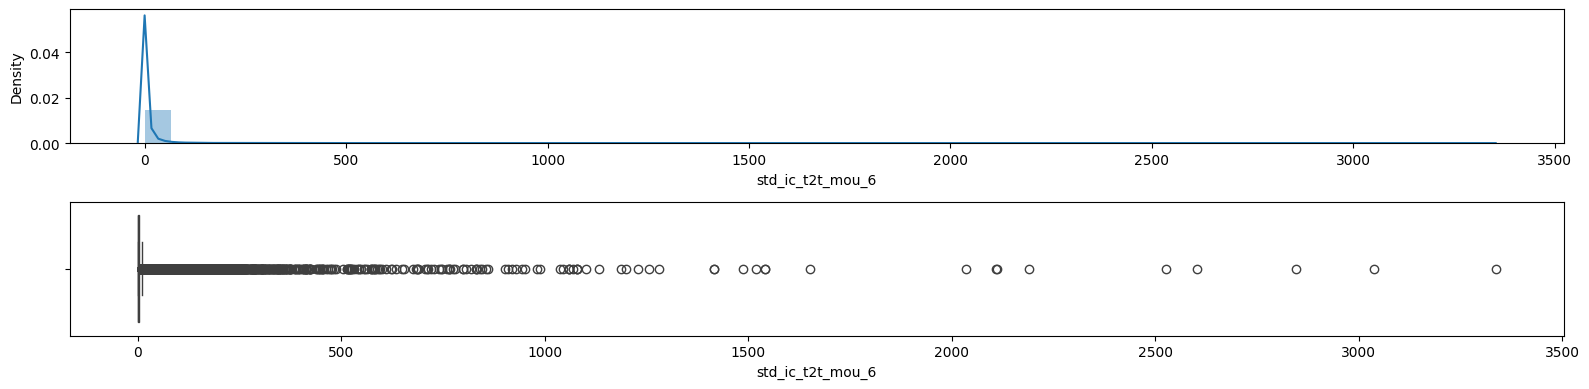

plot feature: std_ic_t2t_mou_7


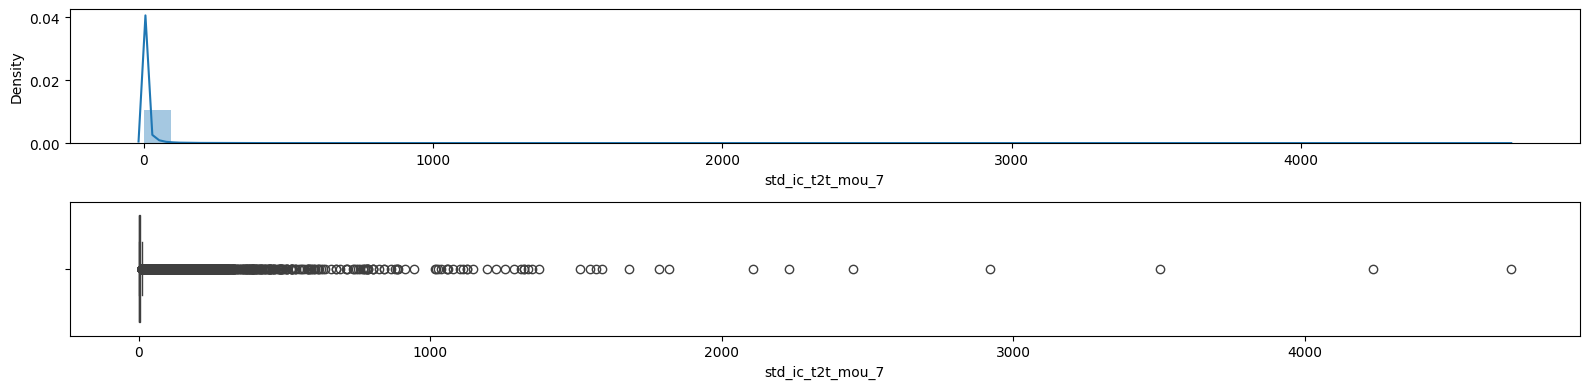

plot feature: std_ic_t2t_mou_8


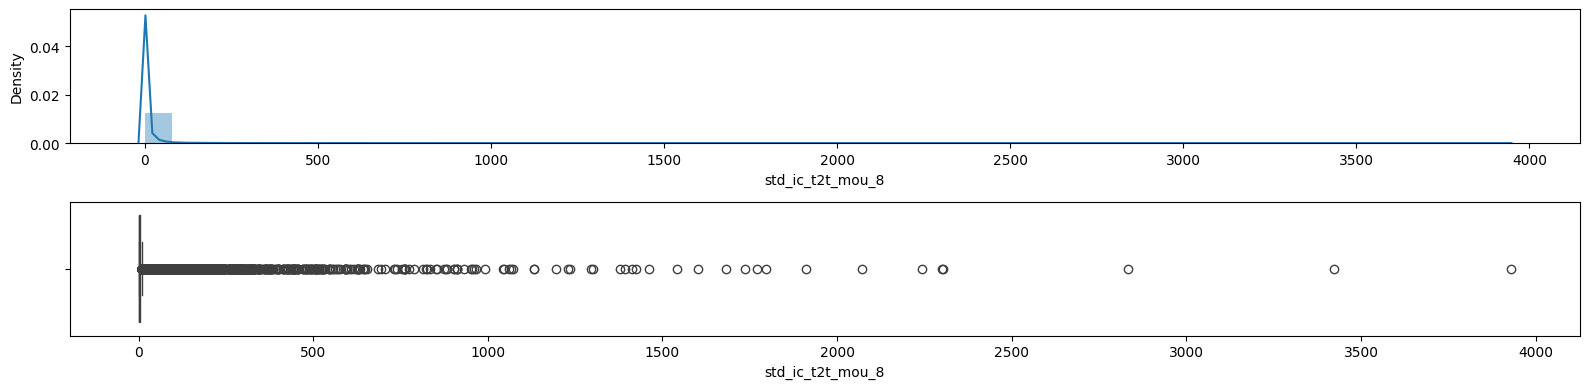

plot feature: std_ic_t2m_mou_6


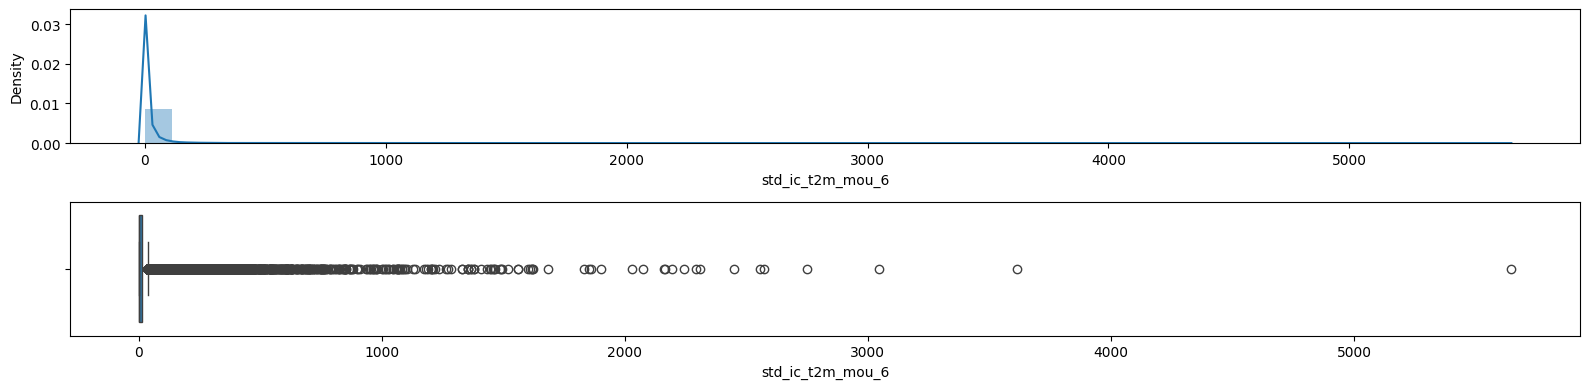

plot feature: std_ic_t2m_mou_7


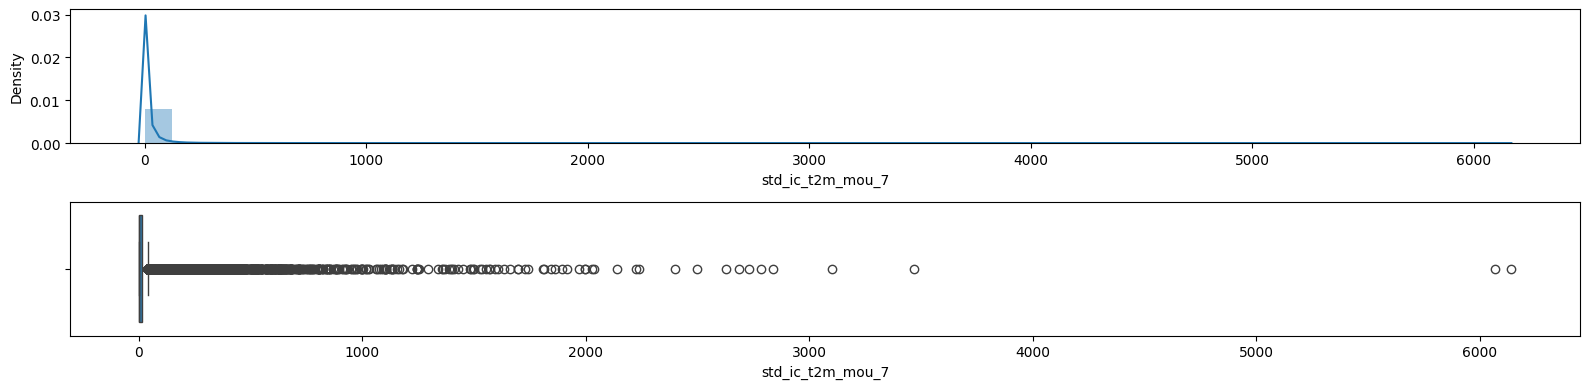

plot feature: std_ic_t2m_mou_8


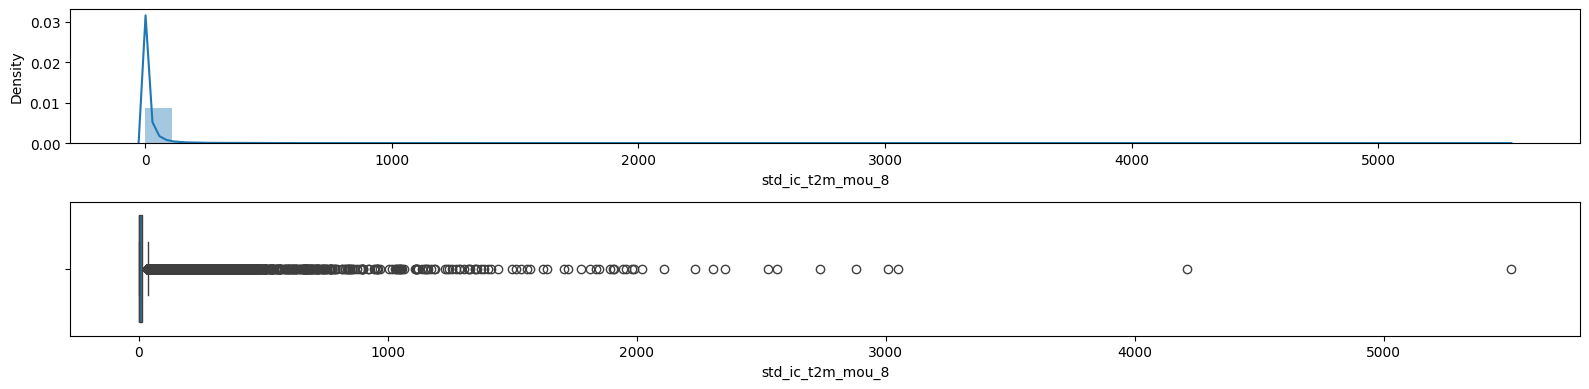

plot feature: std_ic_t2f_mou_6


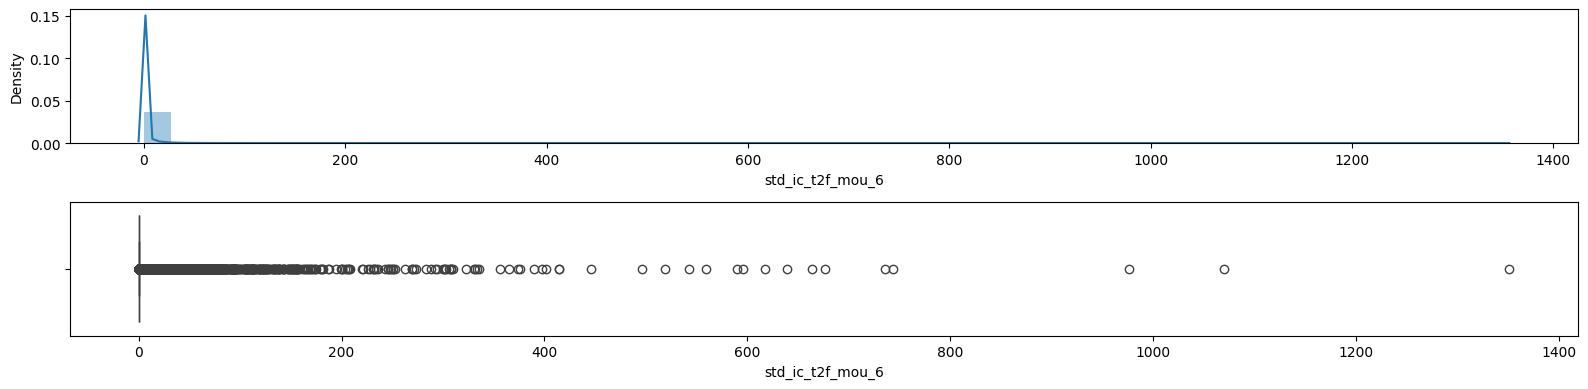

plot feature: std_ic_t2f_mou_7


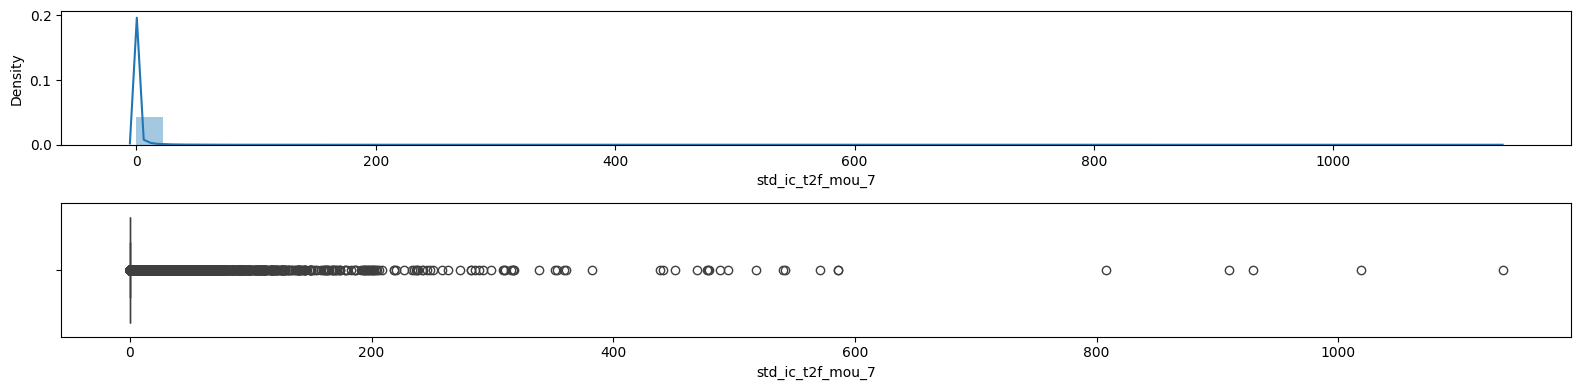

plot feature: std_ic_t2f_mou_8


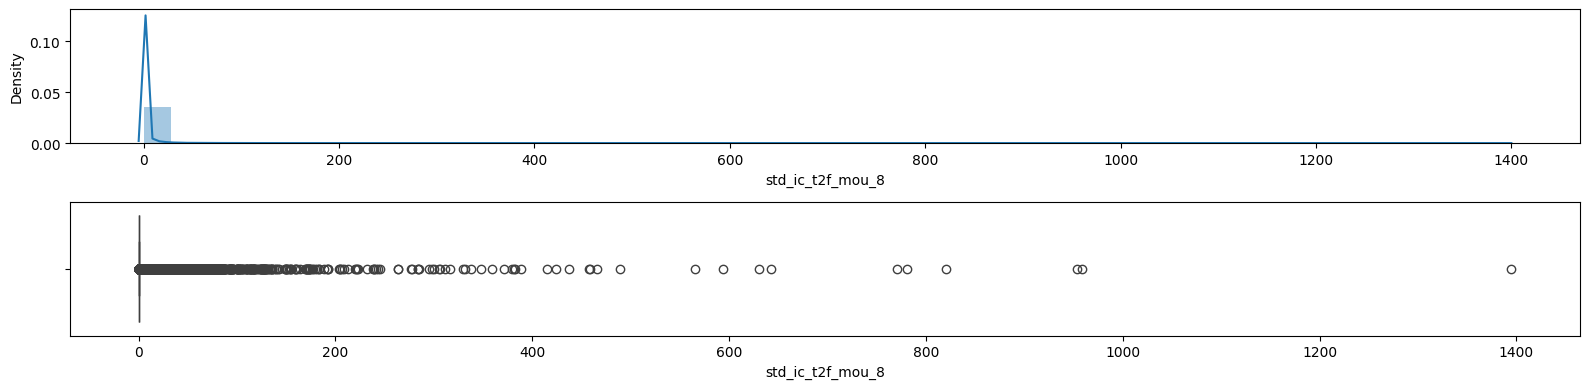

plot feature: std_ic_mou_6


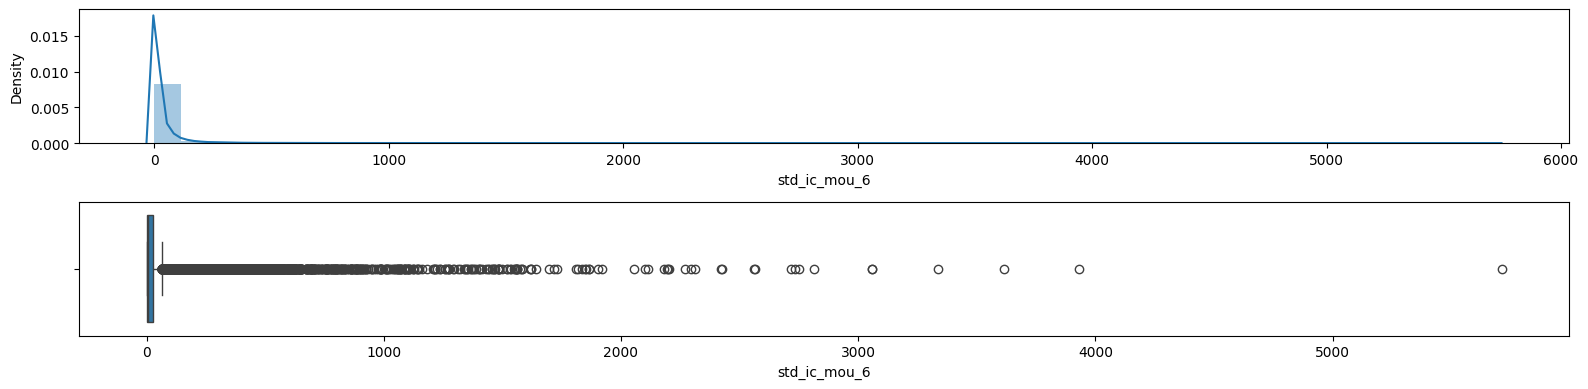

plot feature: std_ic_mou_7


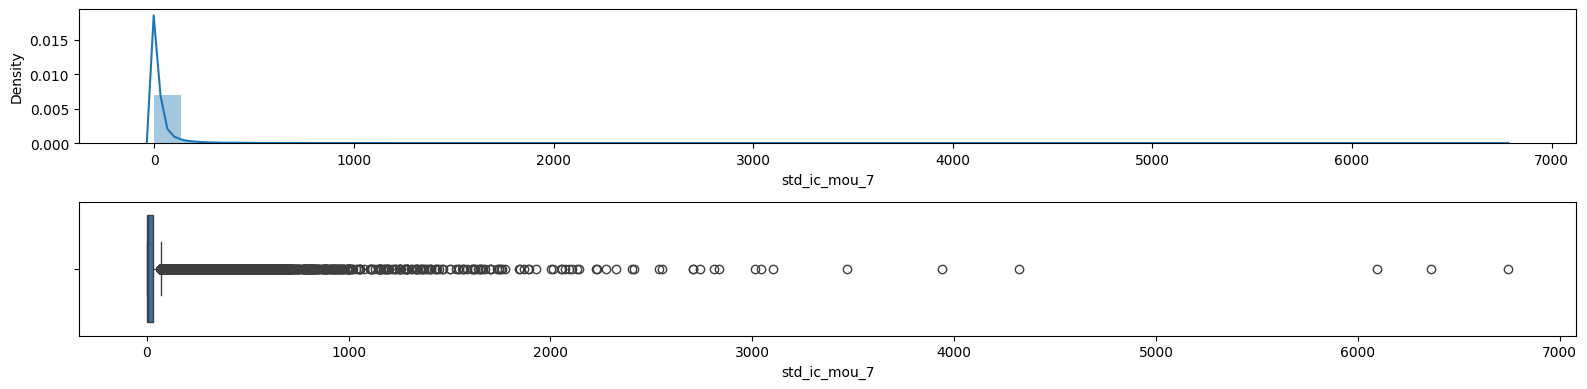

plot feature: std_ic_mou_8


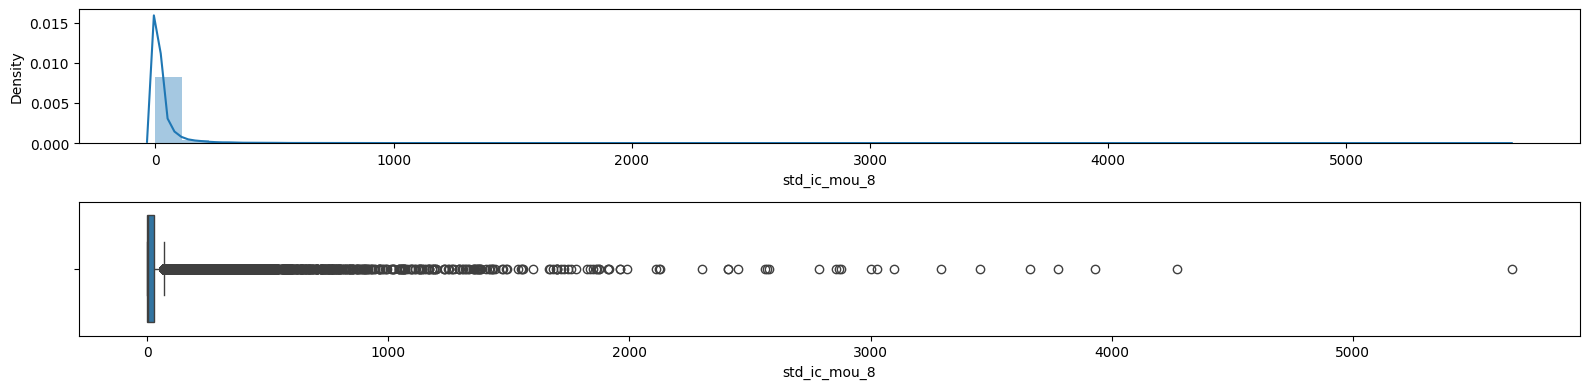

plot feature: total_ic_mou_6


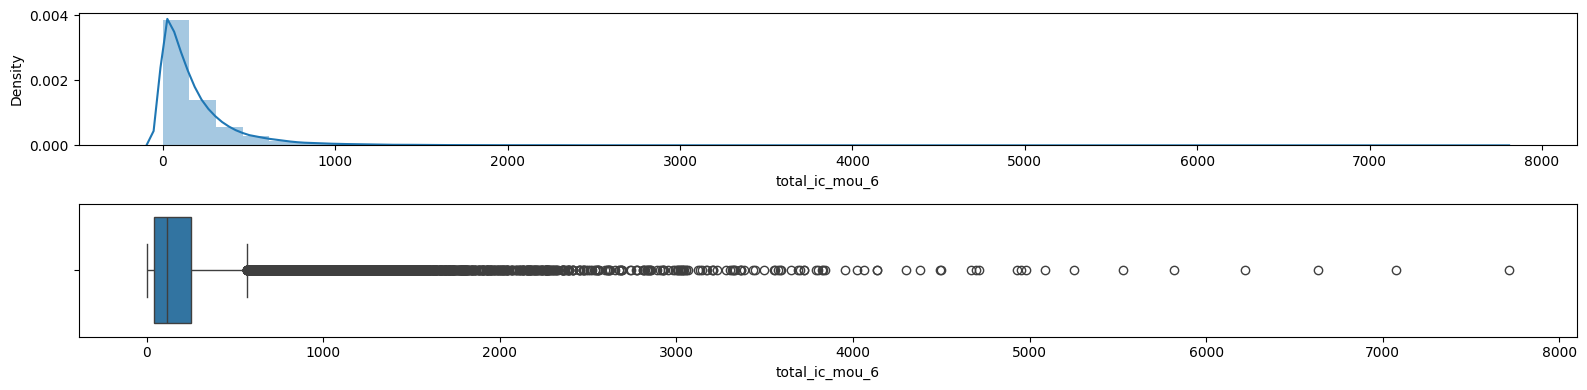

plot feature: total_ic_mou_7


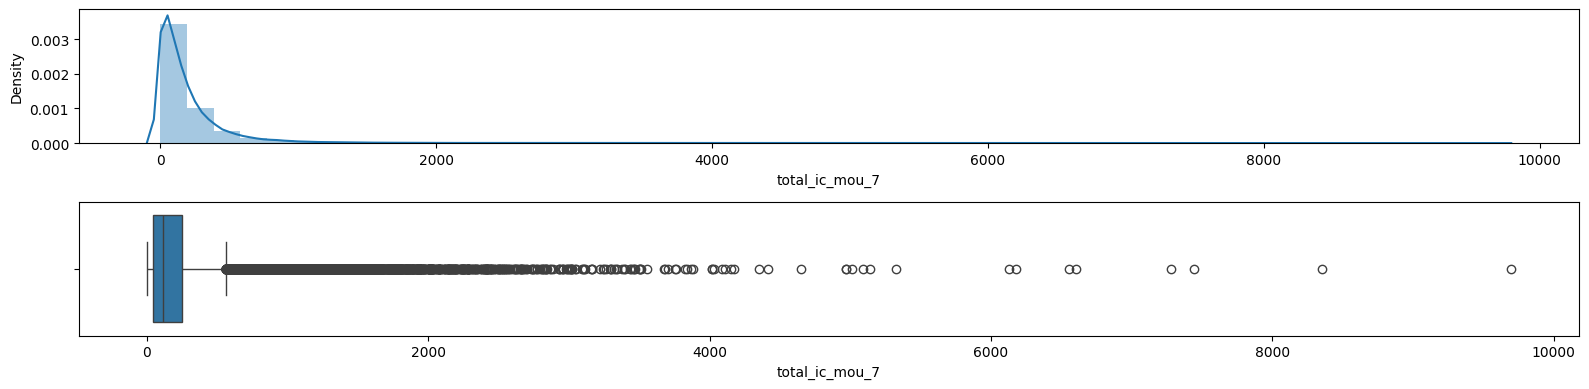

plot feature: total_ic_mou_8


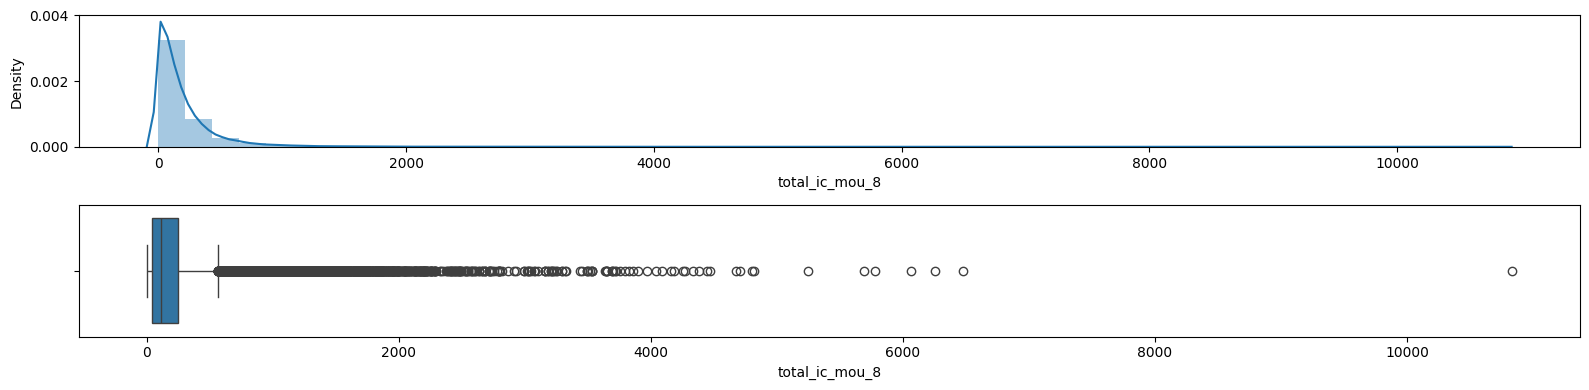

plot feature: spl_ic_mou_6


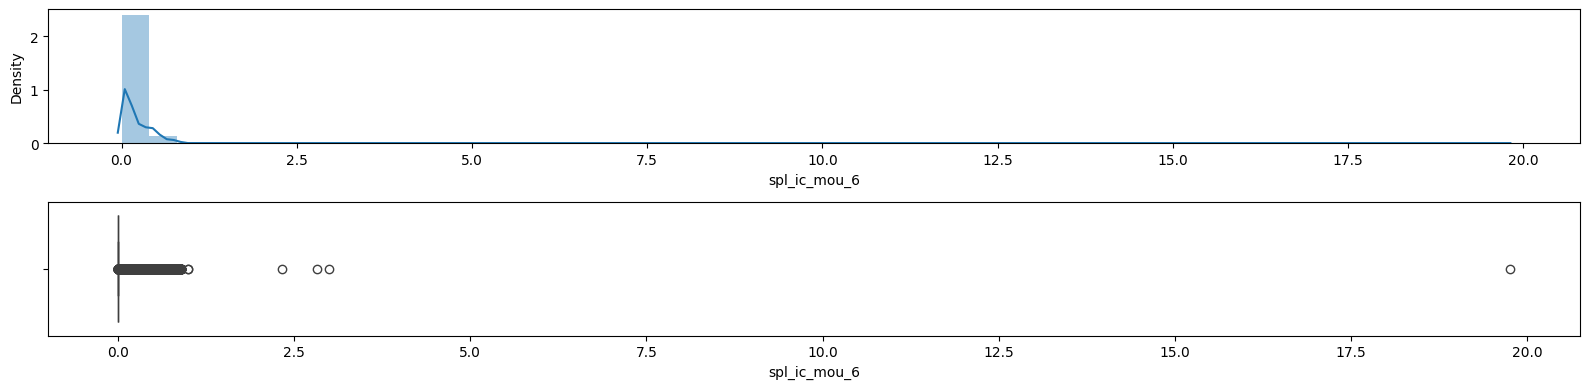

plot feature: spl_ic_mou_7


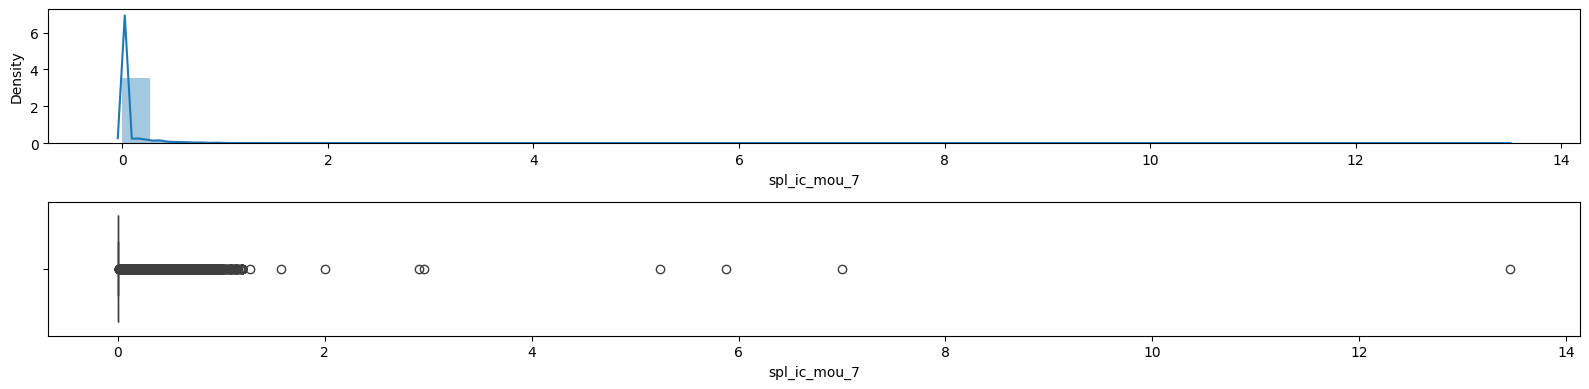

plot feature: spl_ic_mou_8


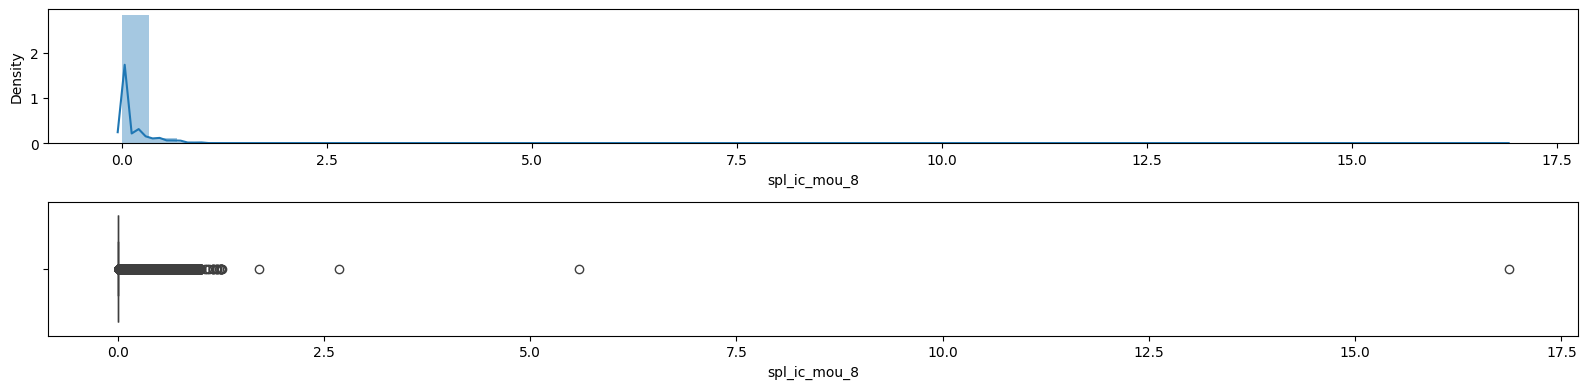

plot feature: isd_ic_mou_6


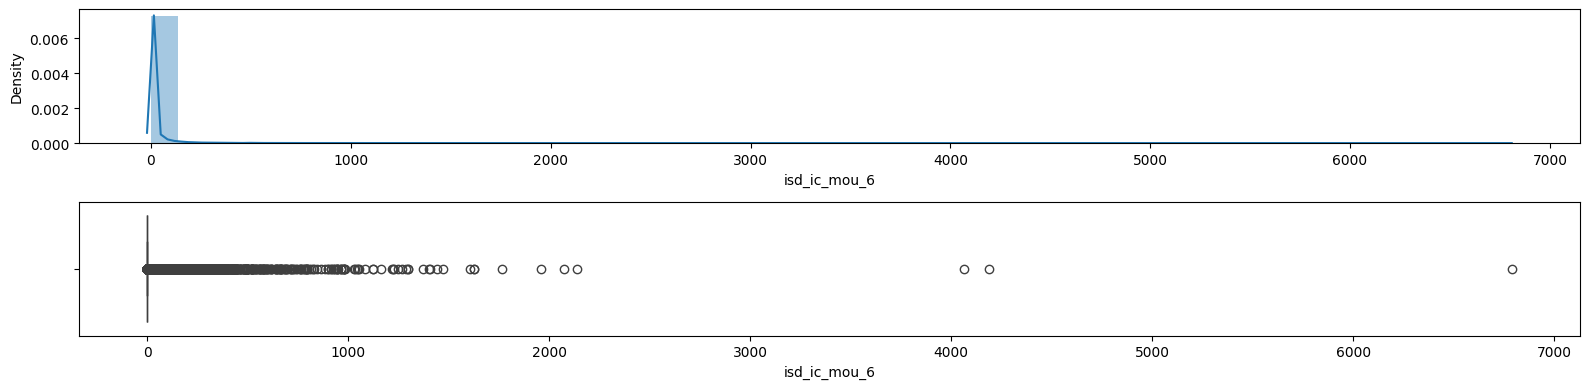

plot feature: isd_ic_mou_7


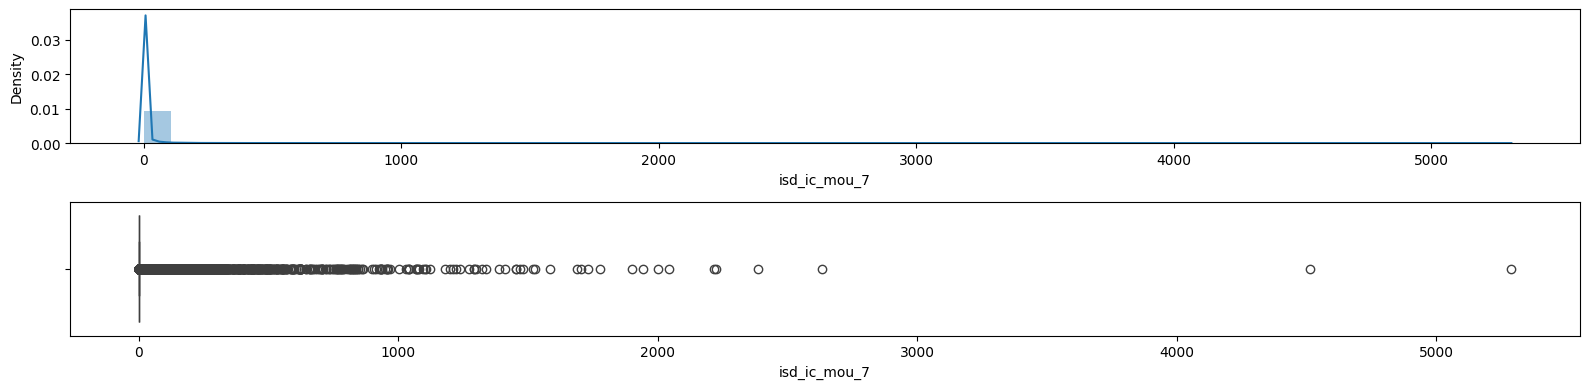

plot feature: isd_ic_mou_8


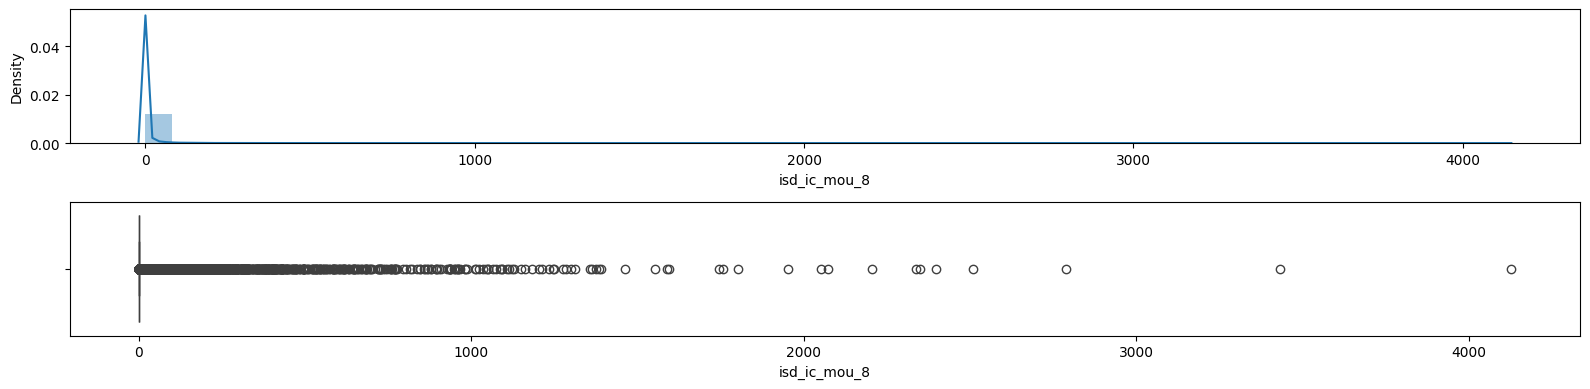

plot feature: ic_others_6


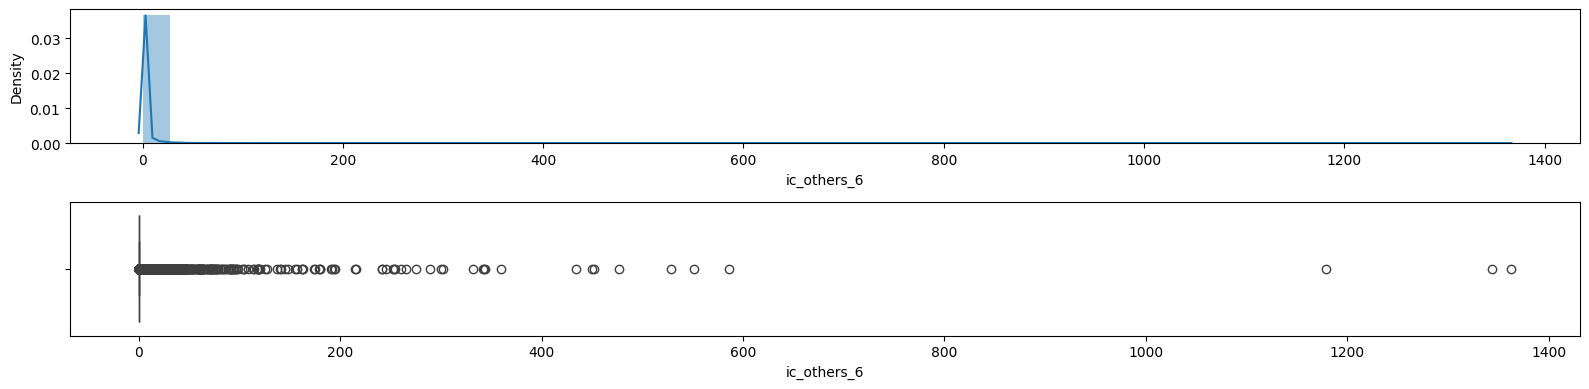

plot feature: ic_others_7


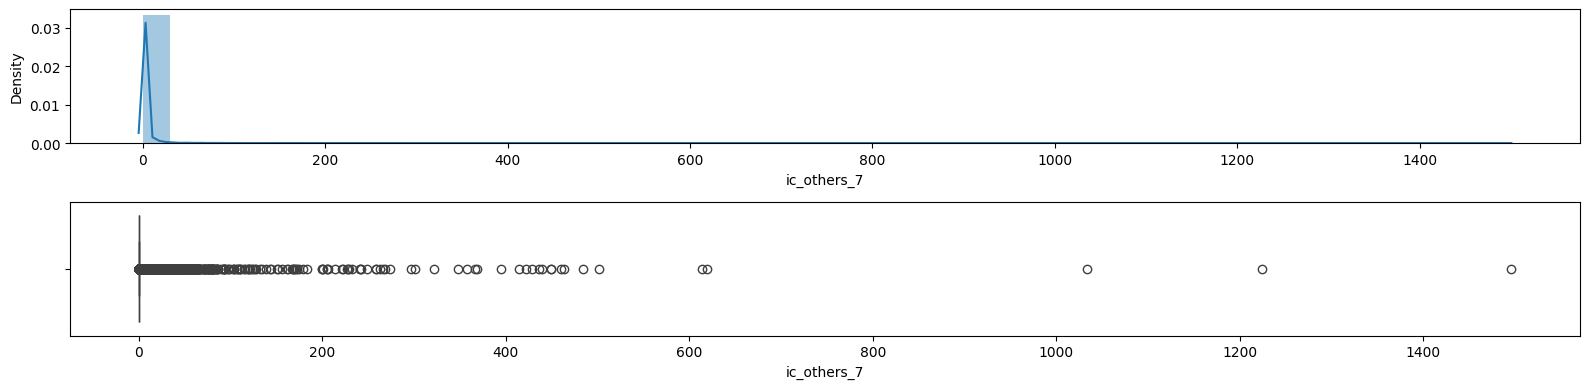

plot feature: ic_others_8


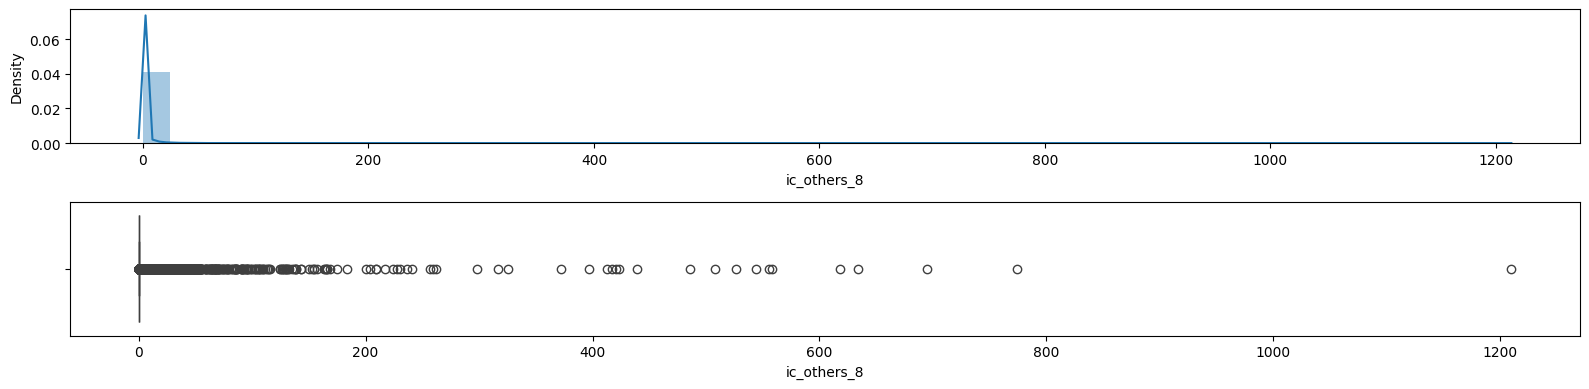

plot feature: total_rech_num_6


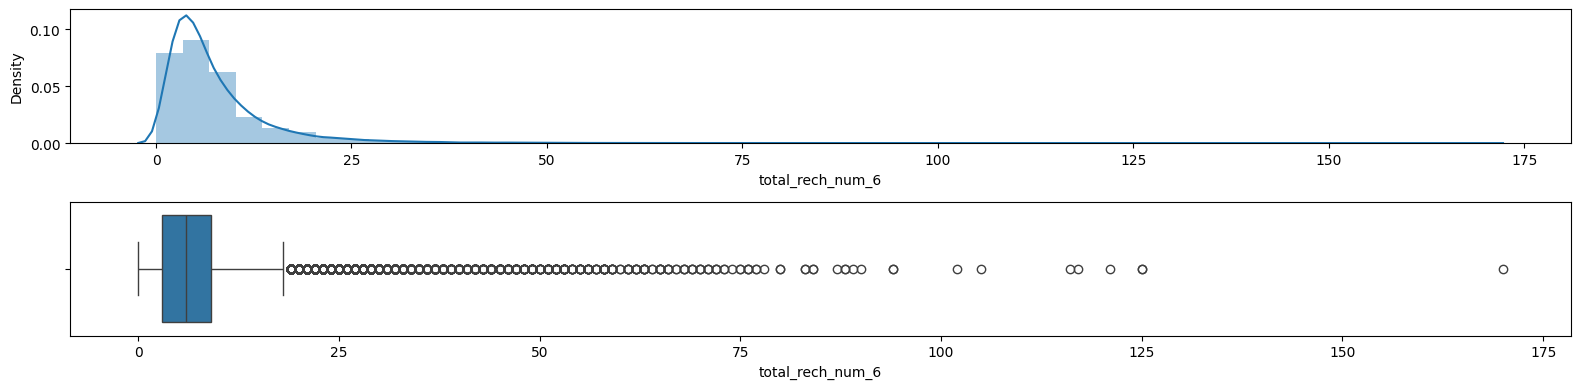

plot feature: total_rech_num_7


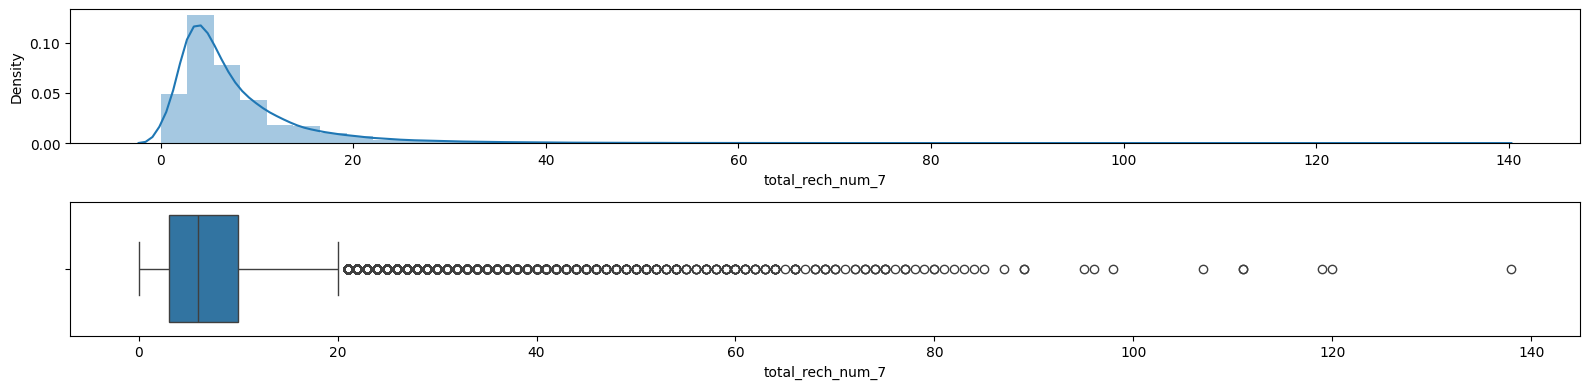

plot feature: total_rech_num_8


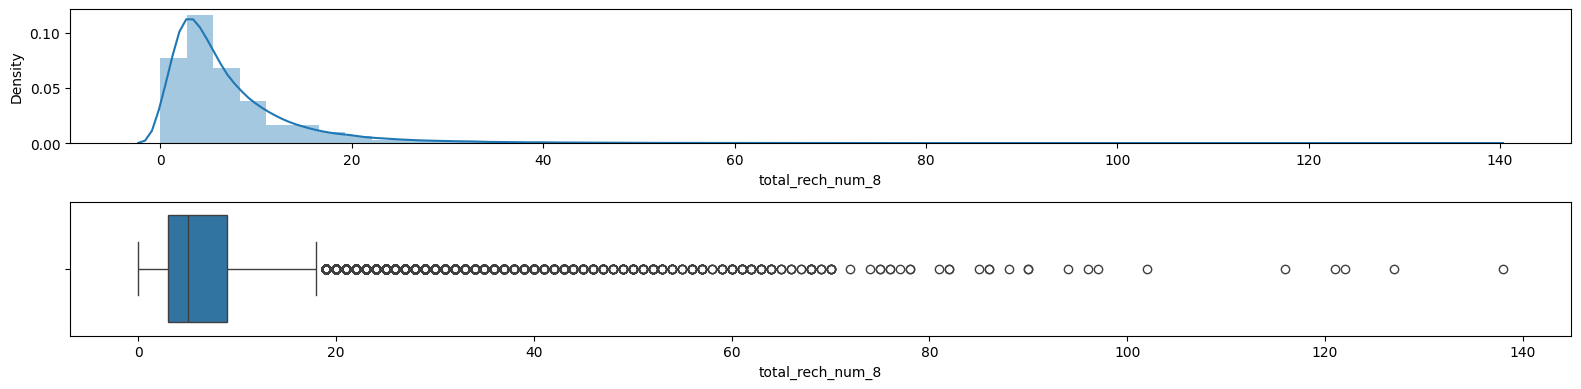

plot feature: total_rech_amt_6


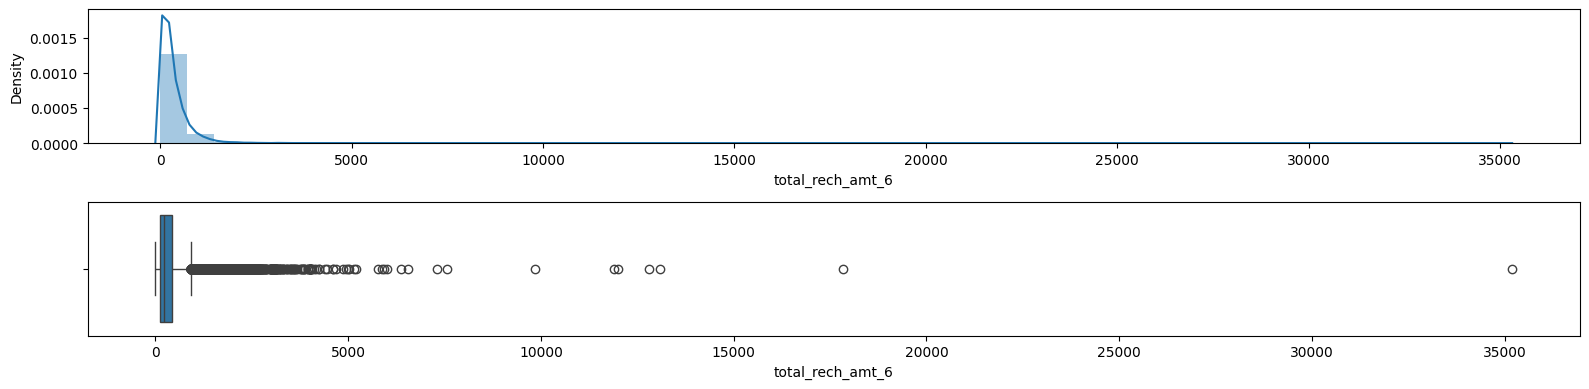

plot feature: total_rech_amt_7


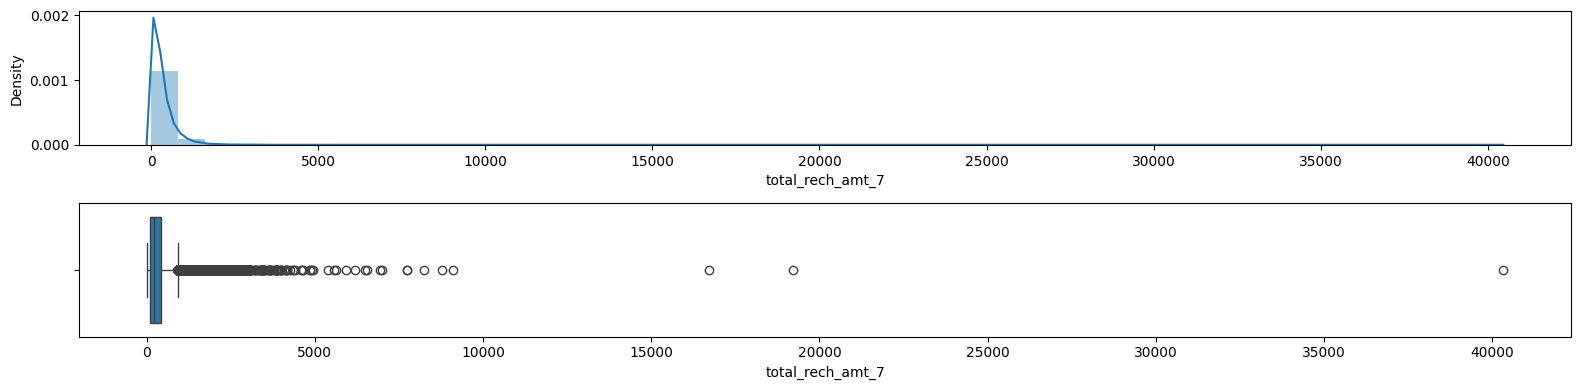

plot feature: total_rech_amt_8


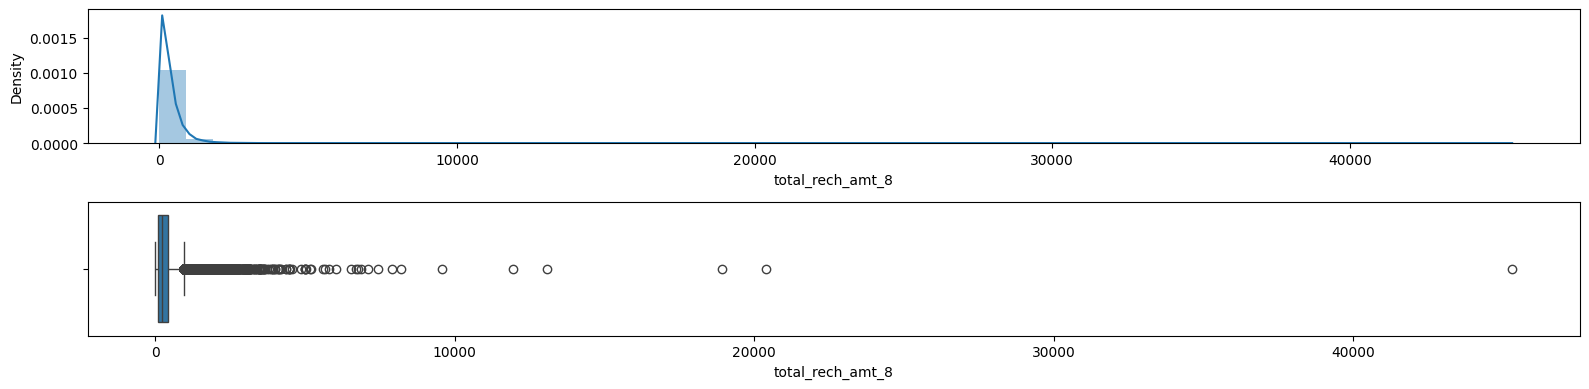

plot feature: max_rech_amt_6


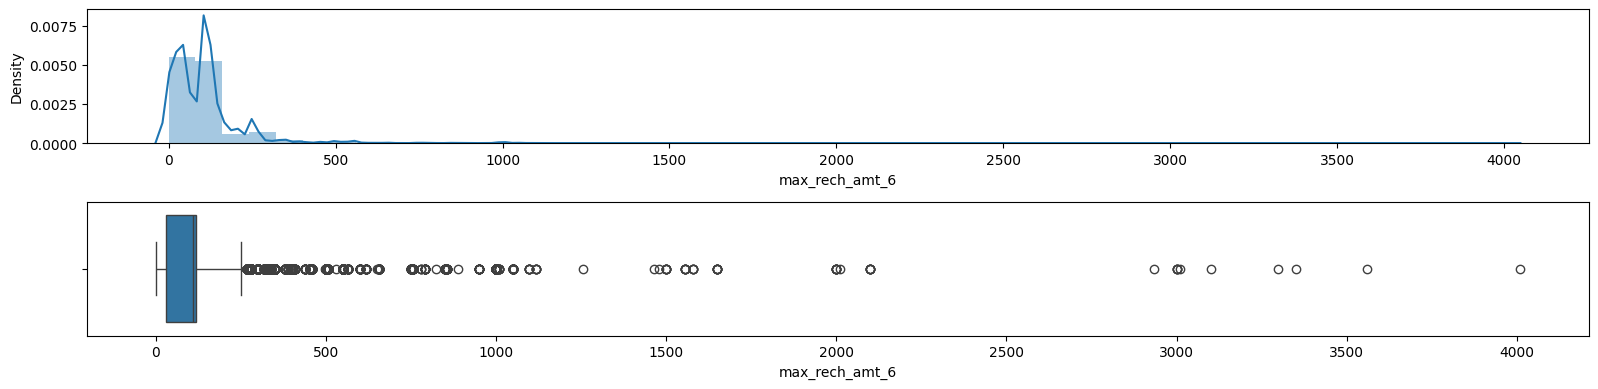

plot feature: max_rech_amt_7


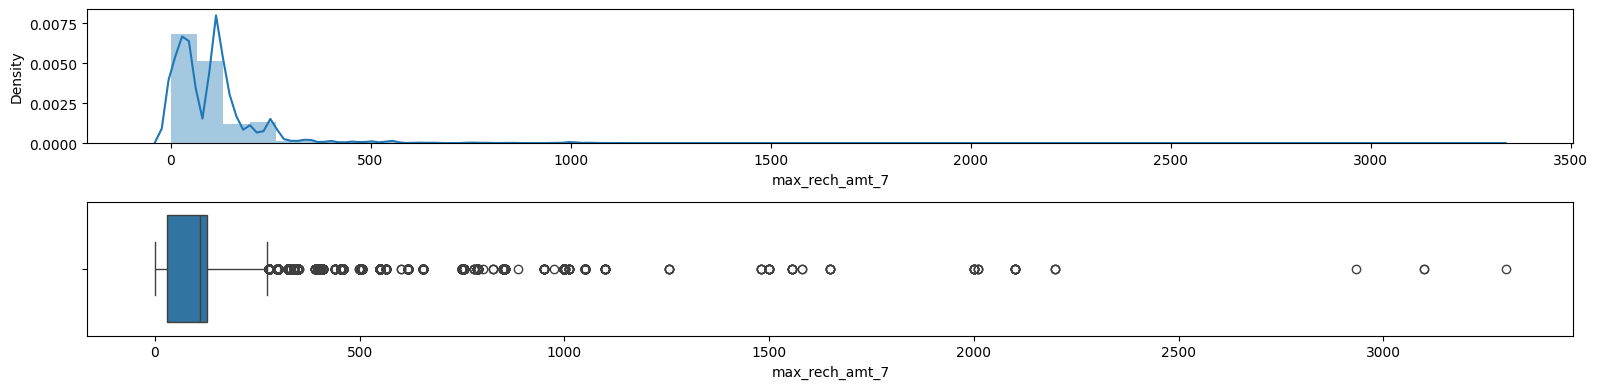

plot feature: max_rech_amt_8


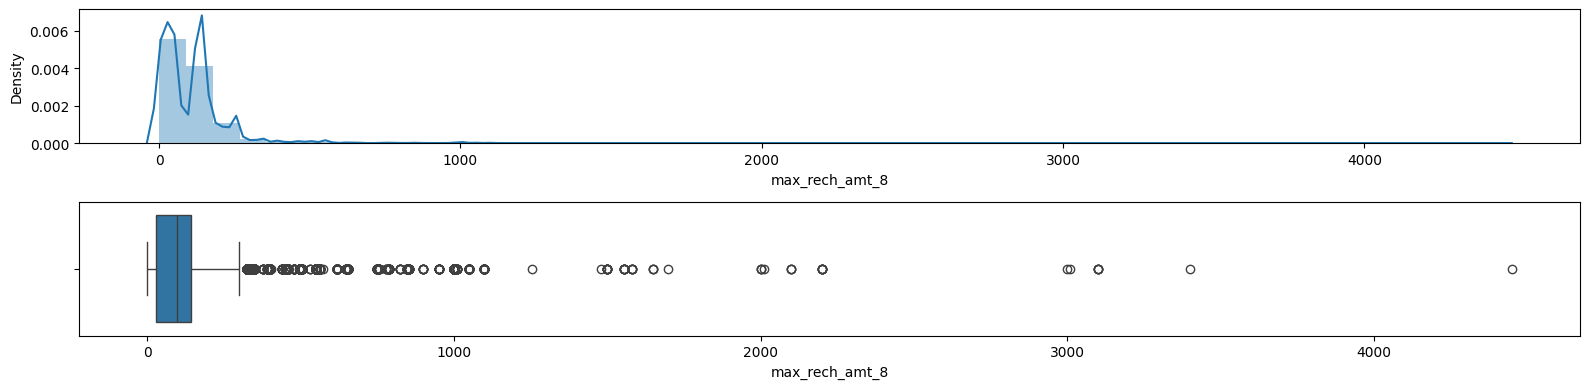

plot feature: last_day_rch_amt_6


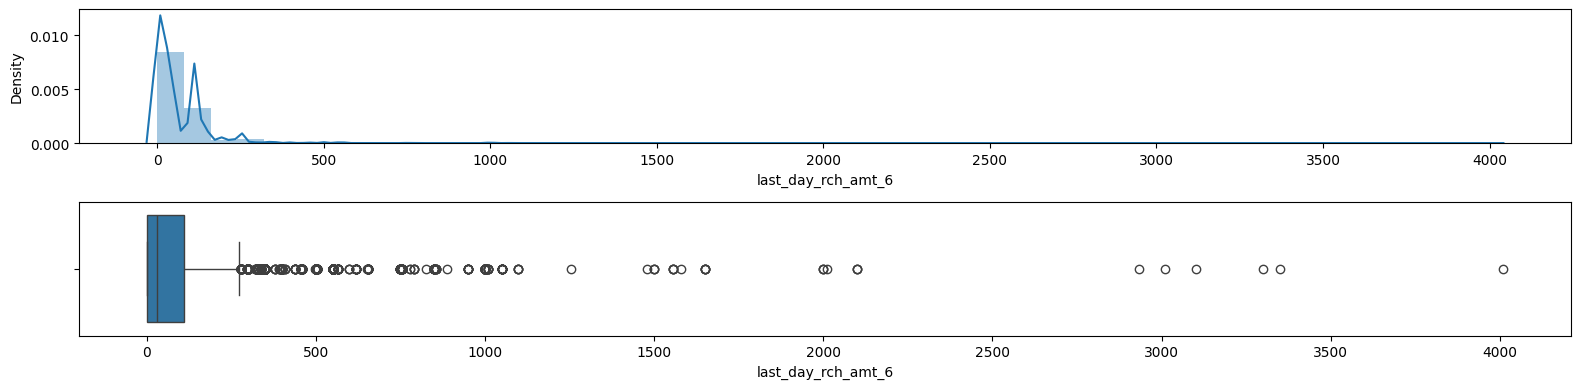

plot feature: last_day_rch_amt_7


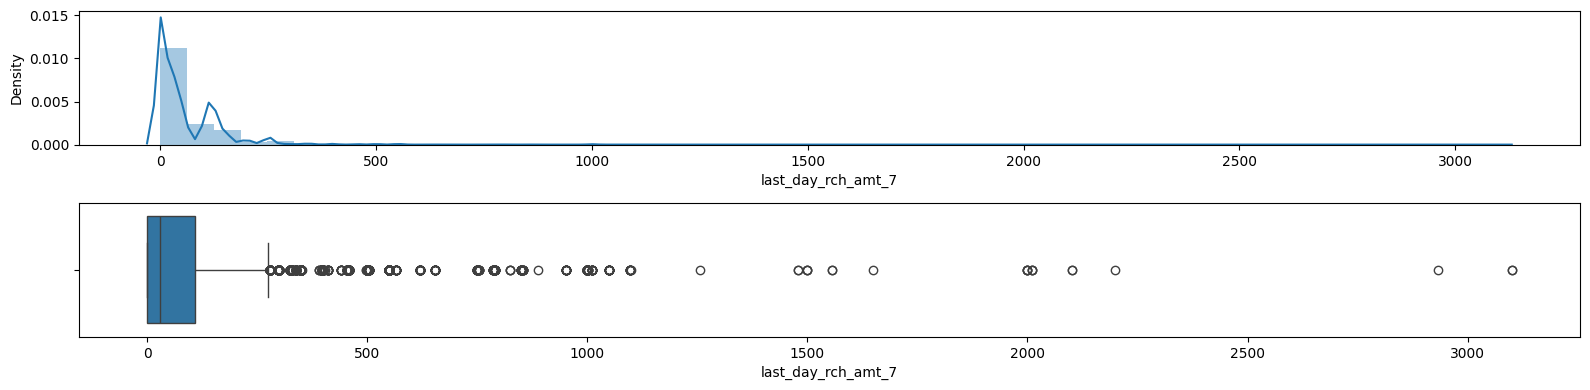

plot feature: last_day_rch_amt_8


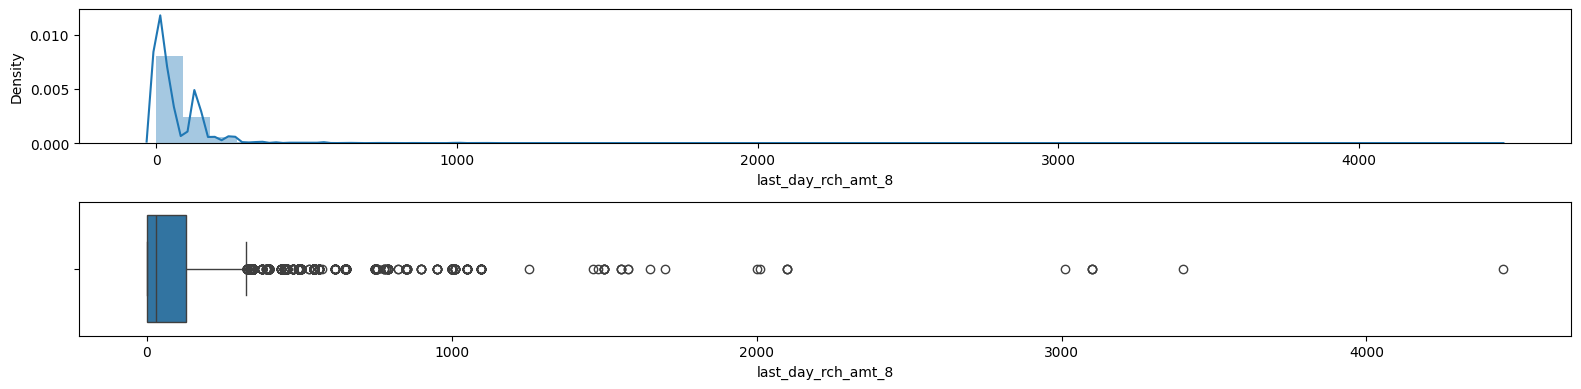

plot feature: vol_2g_mb_6


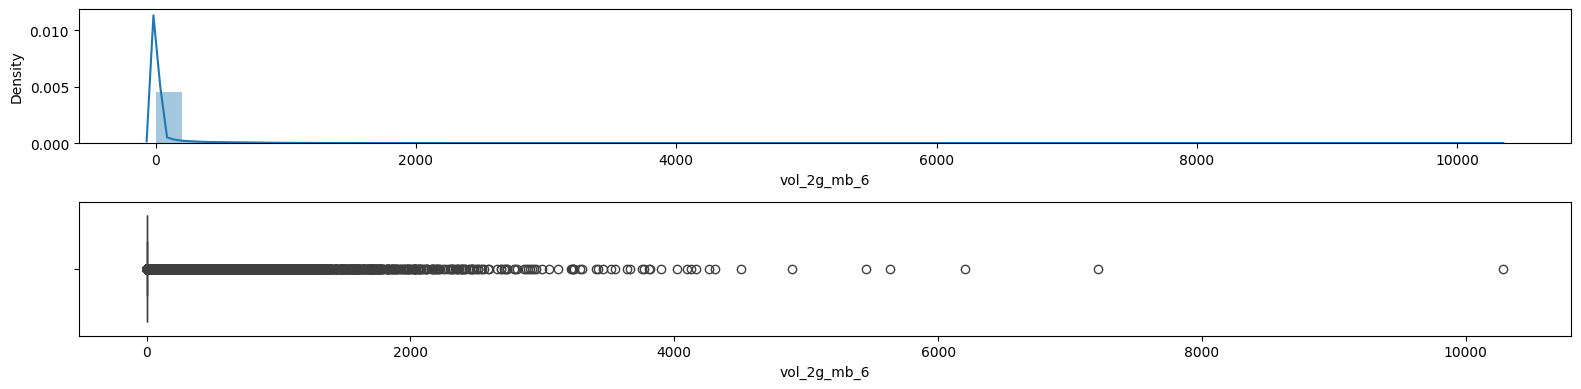

plot feature: vol_2g_mb_7


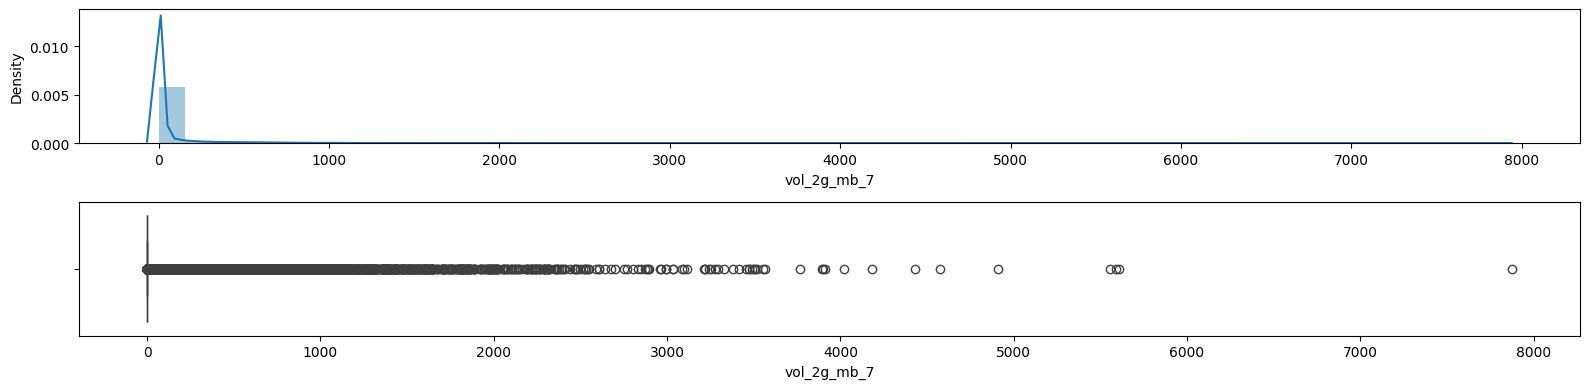

plot feature: vol_2g_mb_8


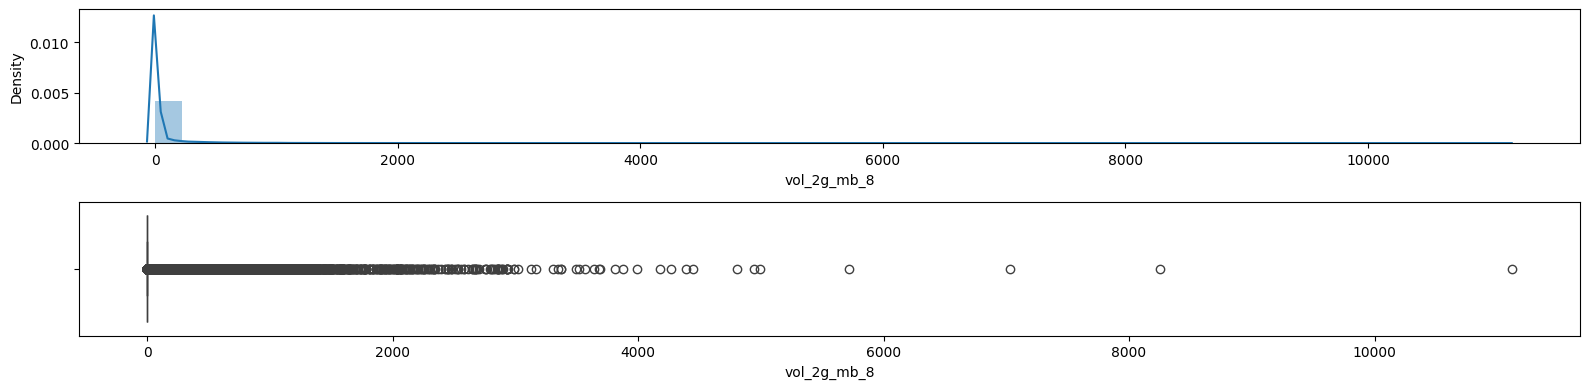

plot feature: vol_3g_mb_6


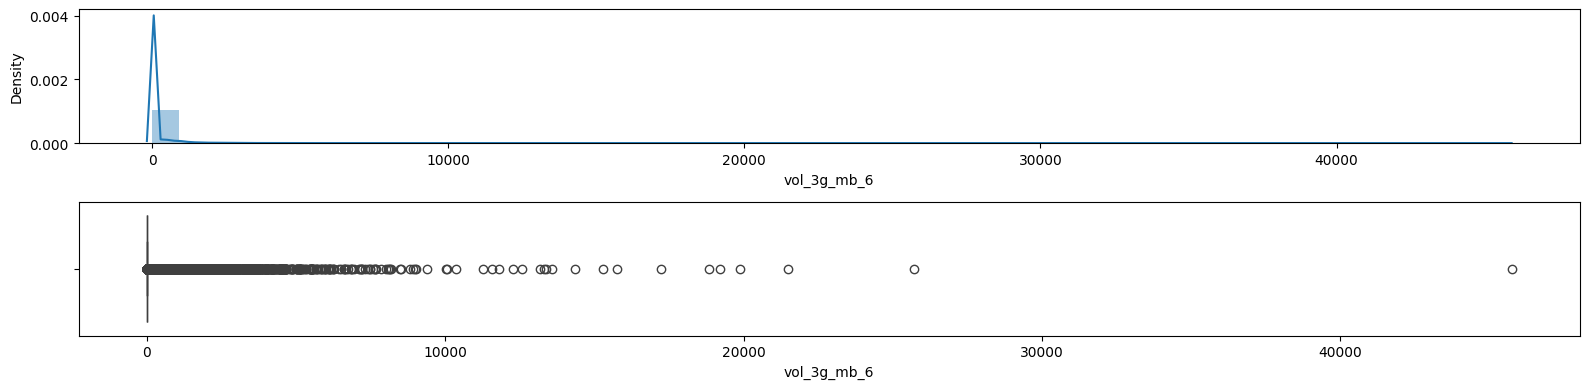

plot feature: vol_3g_mb_7


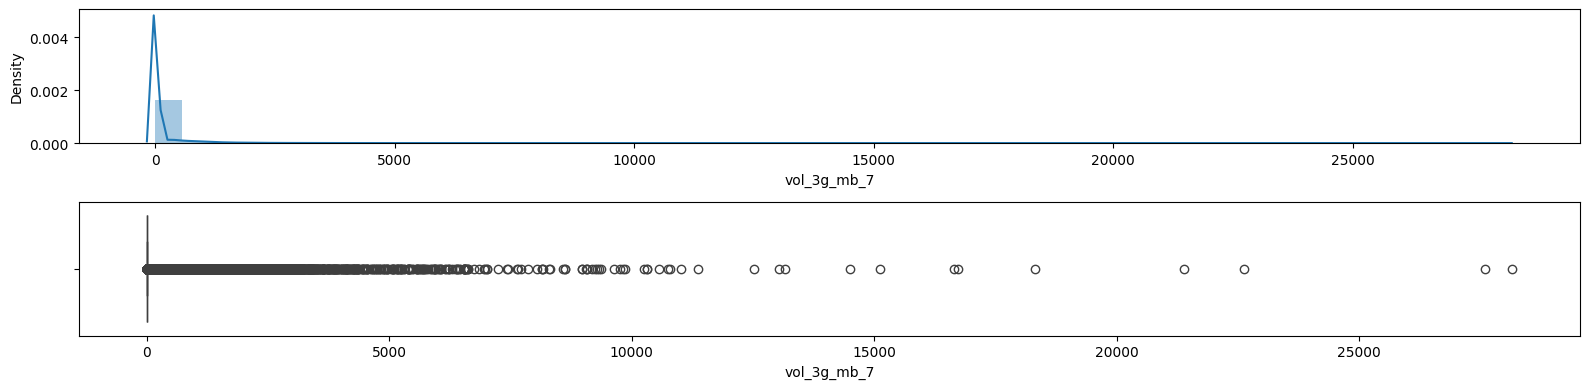

plot feature: vol_3g_mb_8


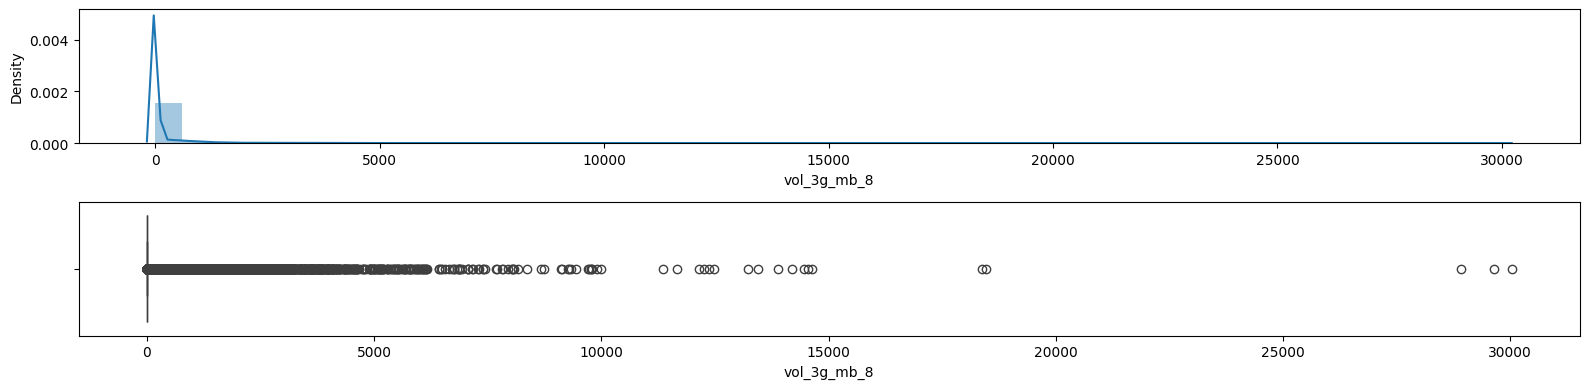

plot feature: sachet_2g_6


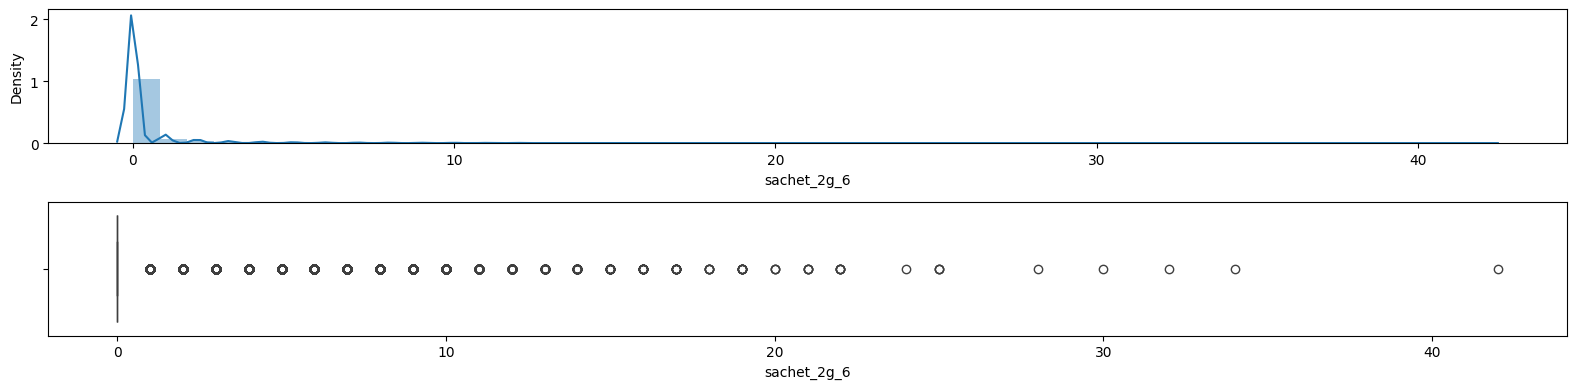

plot feature: sachet_2g_7


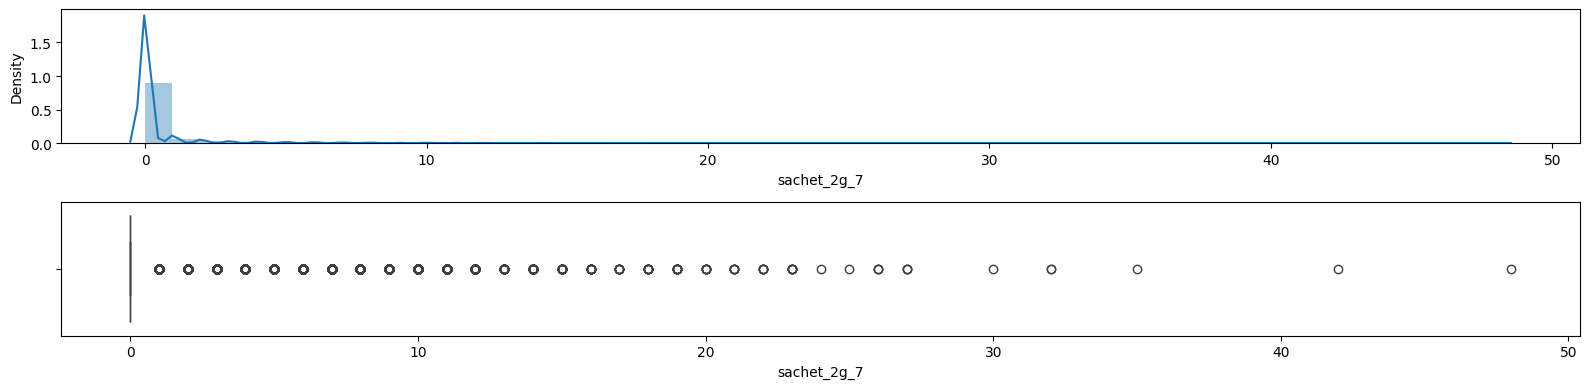

plot feature: sachet_2g_8


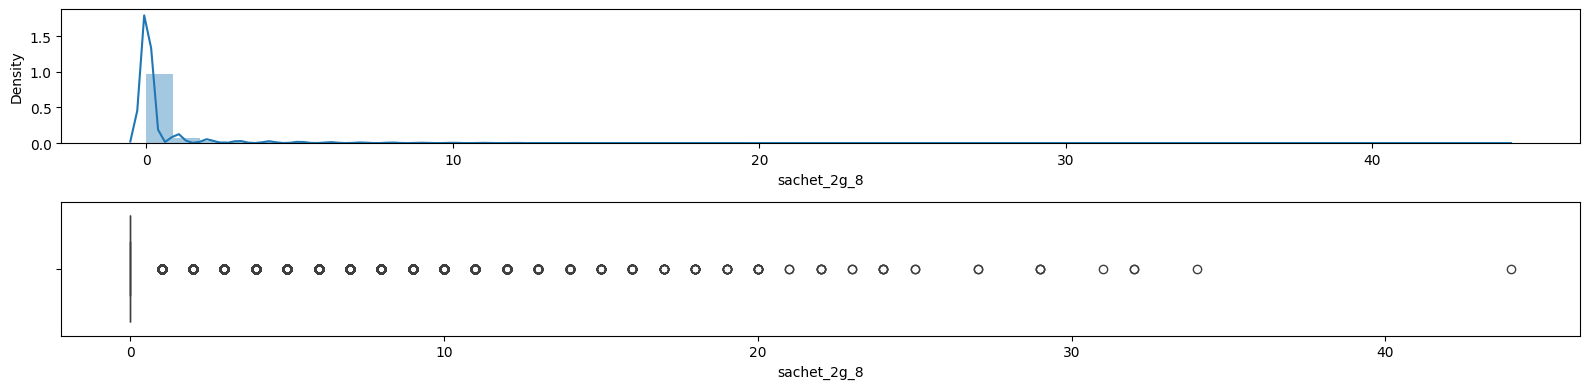

plot feature: sachet_3g_6


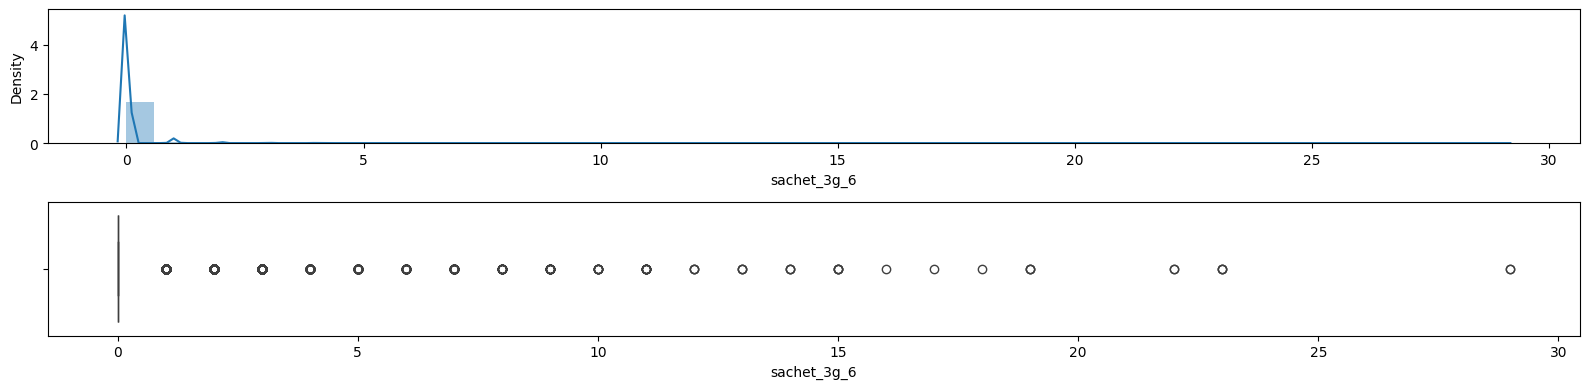

plot feature: sachet_3g_7


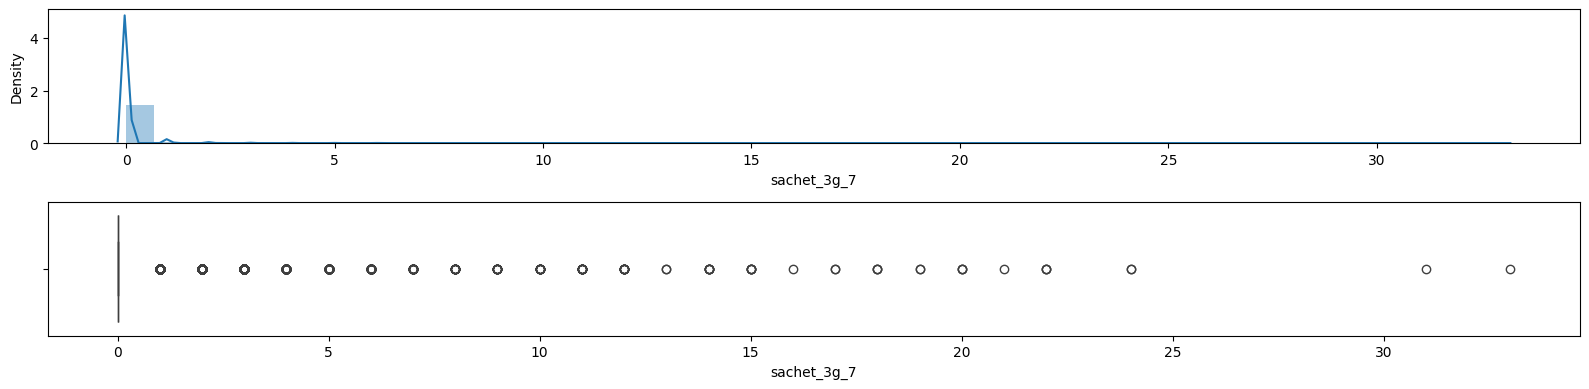

plot feature: sachet_3g_8


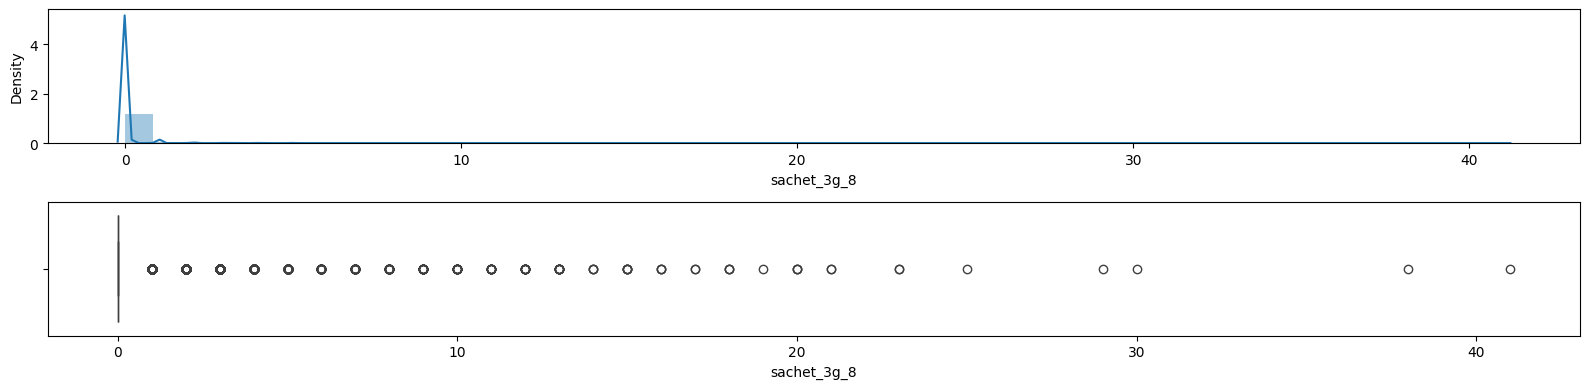

plot feature: aon


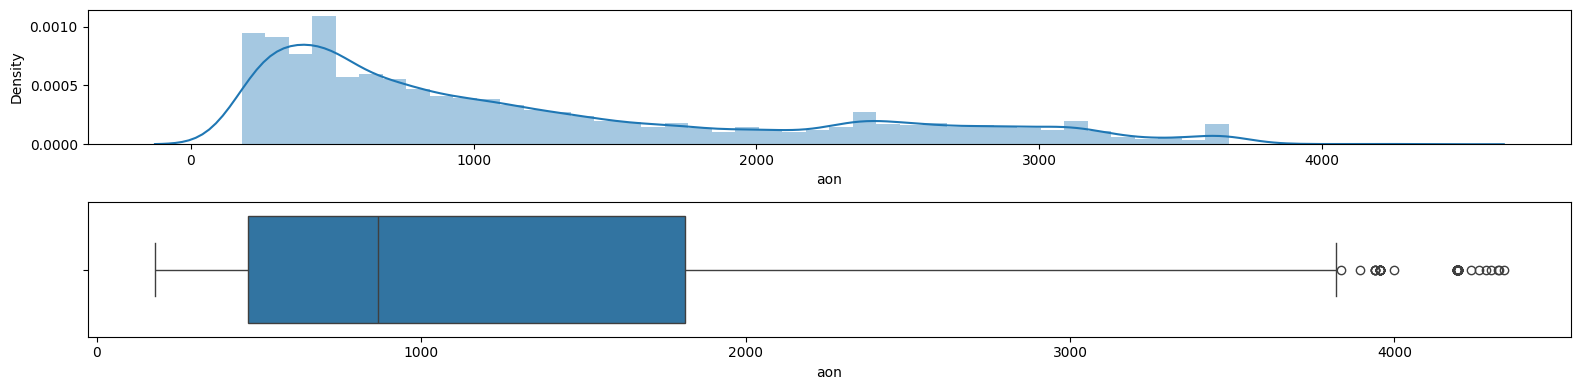

plot feature: aug_vbc_3g


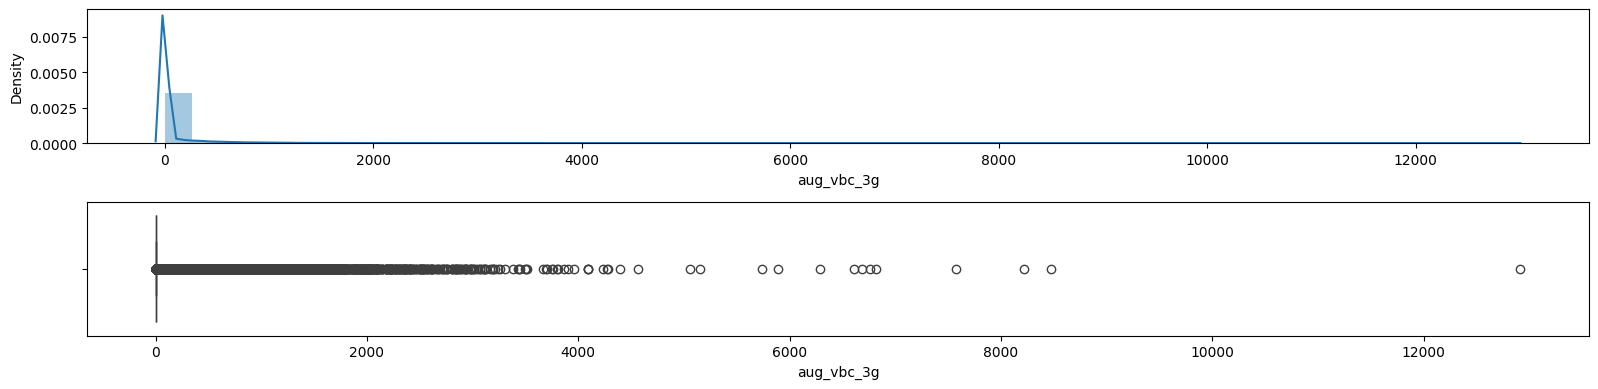

plot feature: jul_vbc_3g


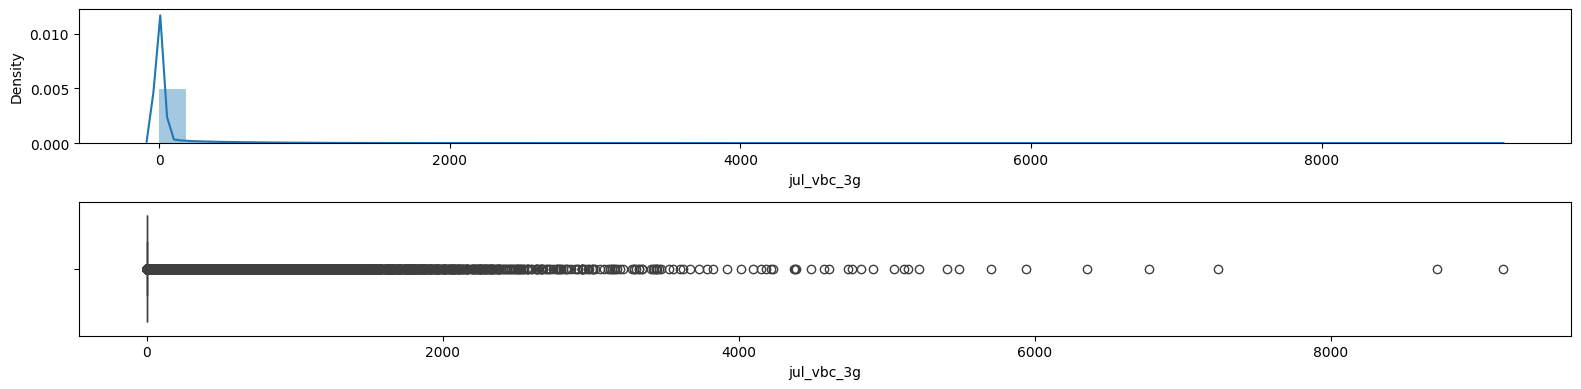

plot feature: jun_vbc_3g


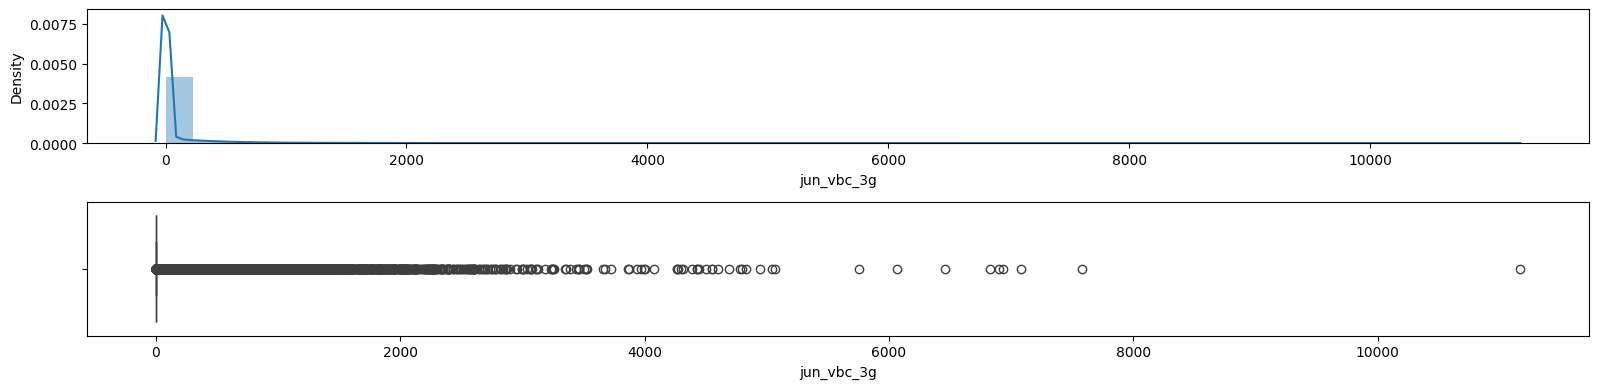

plot feature: date_of_last_rech_6_day


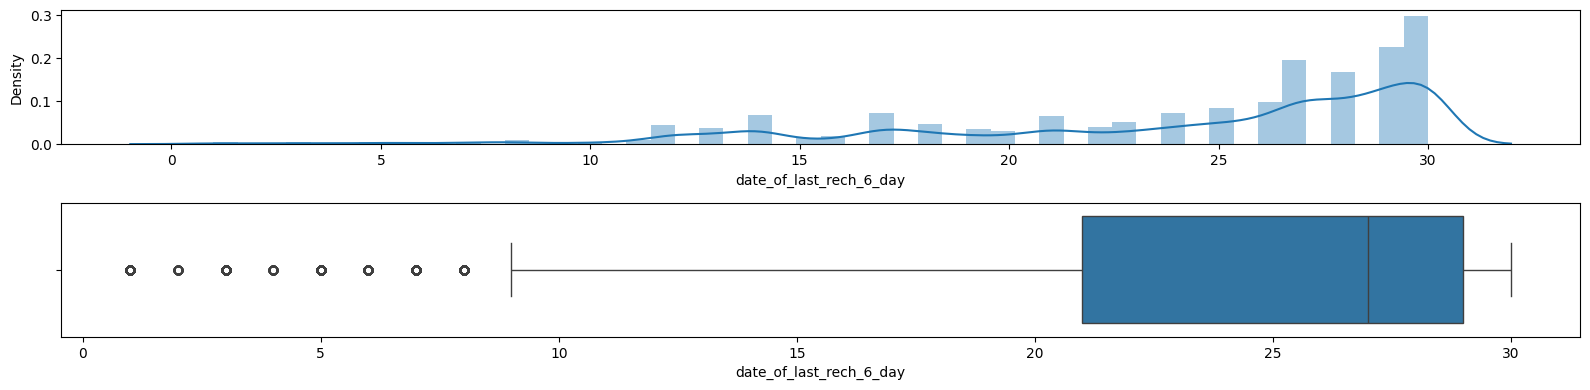

plot feature: date_of_last_rech_7_day


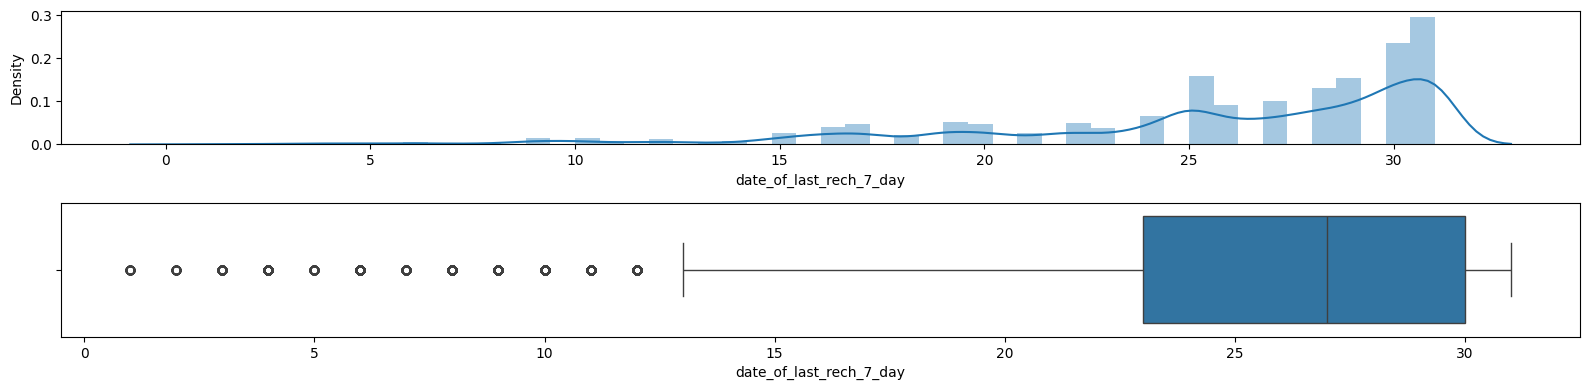

plot feature: date_of_last_rech_8_day


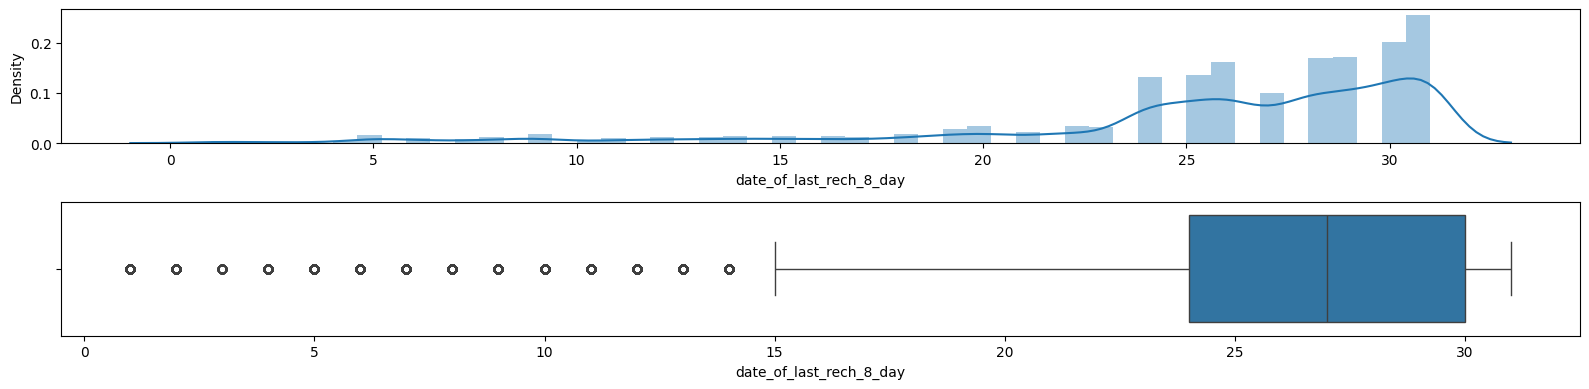

In [22]:
# plot dist and box
for c in num_cols:
    print('plot feature:', c)
    univariate_analysis1(train, c)

> Many outliers

In [23]:
#drop outlier
col_falses = []
for c in num_cols:
    print(f'drop outlier for: {c}')
    train, col_false= drop_outliner(train,c)
    if col_false is not None:
        col_falses.append(col_false)

drop outlier for: arpu_6
Percentage of dropped row (%):  5.79
drop outlier for: arpu_7
Percentage of dropped row (%):  4.06
drop outlier for: arpu_8
Percentage of dropped row (%):  3.18
drop outlier for: onnet_mou_6
Percentage of dropped row (%):  14.95
drop outlier for: onnet_mou_7
Percentage of dropped row (%):  10.82
drop outlier for: onnet_mou_8
Percentage of dropped row (%):  9.96
drop outlier for: offnet_mou_6
Percentage of dropped row (%):  7.59
drop outlier for: offnet_mou_7
Percentage of dropped row (%):  5.63
drop outlier for: offnet_mou_8
Percentage of dropped row (%):  4.77
drop outlier for: roam_ic_mou_6
Percentage of dropped row (%):  100.0
drop outlier for: roam_ic_mou_7
Percentage of dropped row (%):  100.0
drop outlier for: roam_ic_mou_8
Percentage of dropped row (%):  100.0
drop outlier for: roam_og_mou_6
Percentage of dropped row (%):  100.0
drop outlier for: roam_og_mou_7
Percentage of dropped row (%):  100.0
drop outlier for: roam_og_mou_8
Percentage of dropped row

In [24]:
col_falses

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_

> Consider these features, they can significantly effect the model's performance

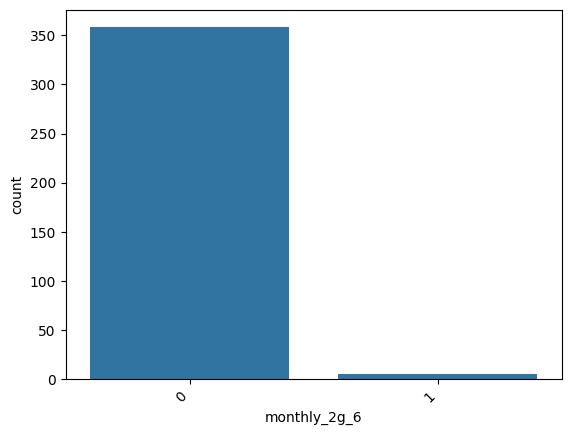

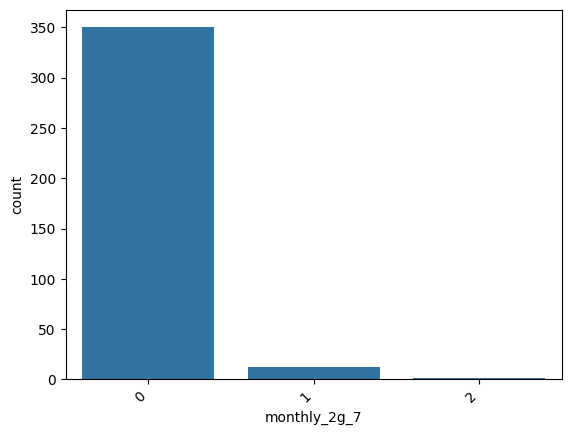

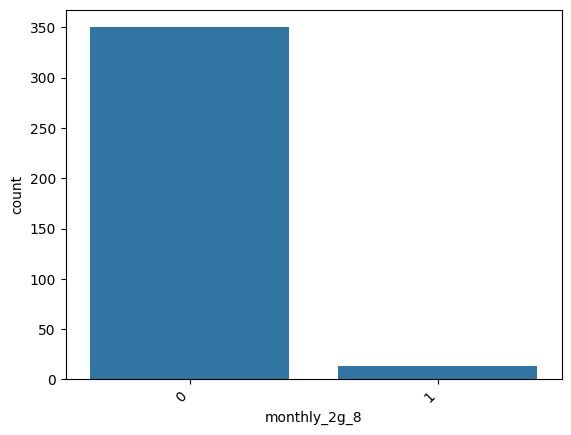

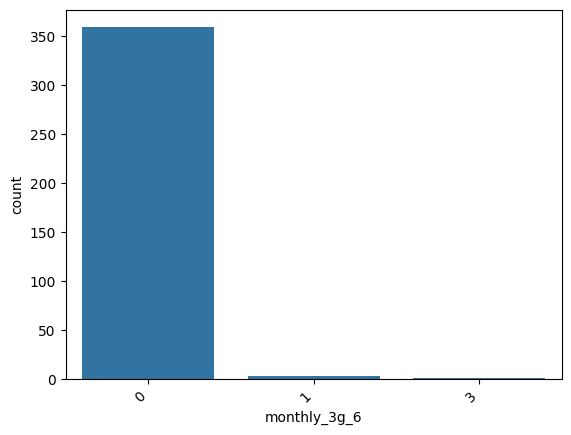

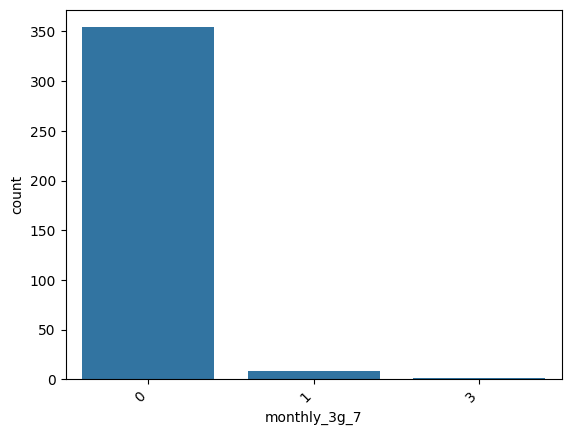

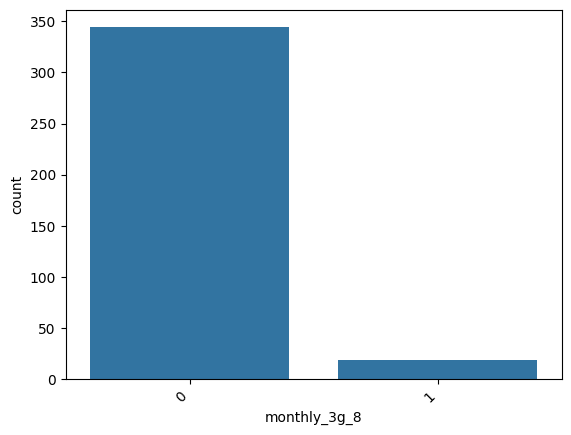

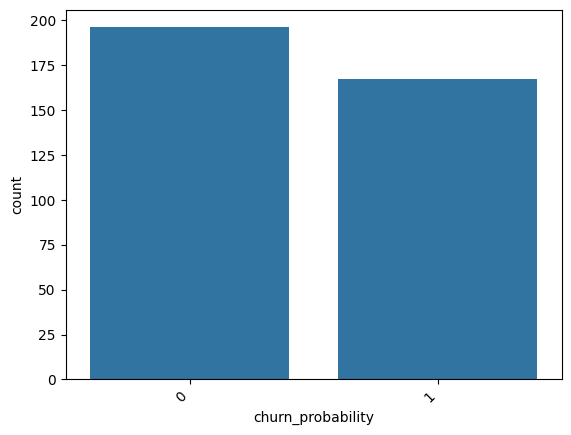

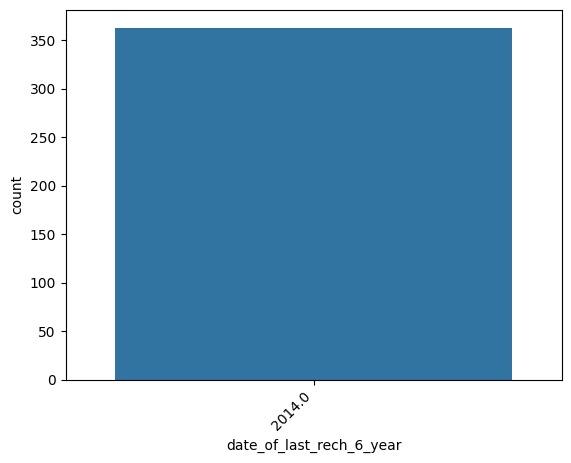

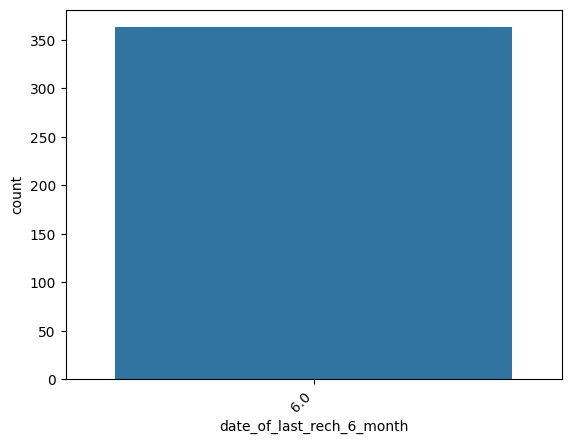

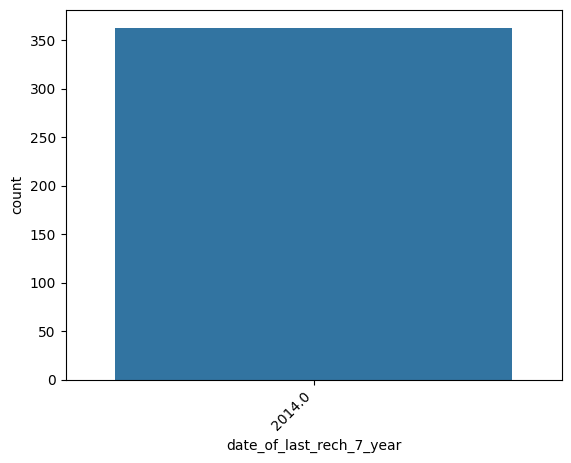

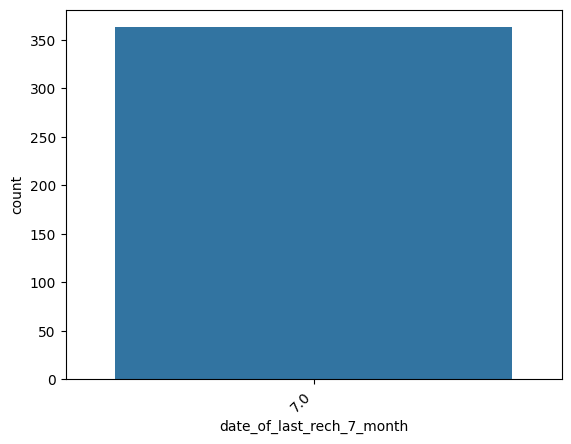

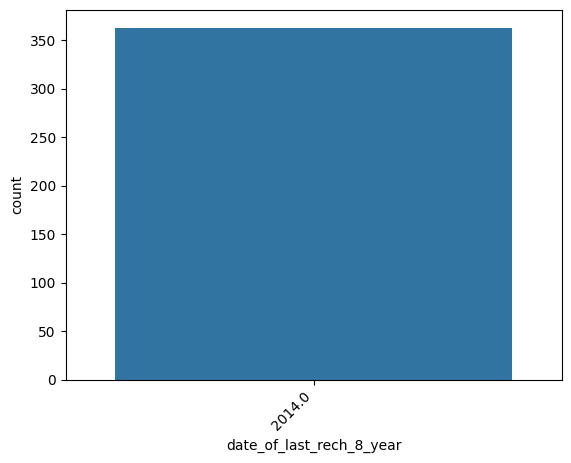

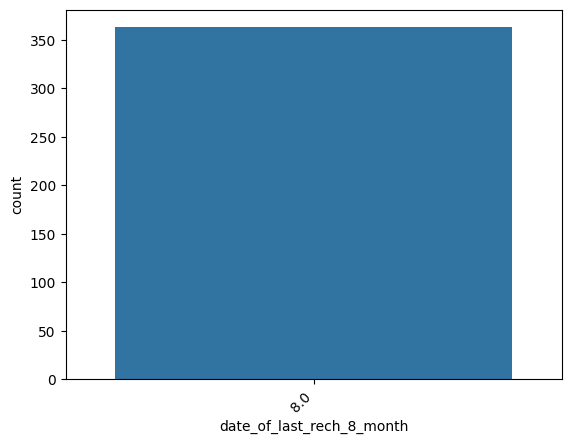

In [25]:
# Check imbalance data
for c in cat_cols:
    sorted_order =train[c].value_counts().index.sort_values()
    ax = sns.countplot(data=train, x=c,  order=sorted_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    plt.show()

> Many imbalance data, so I decide to use t-SNE to push perforance

In [26]:
# Some features have only one value, so I remove them one more.
columns_vales_count = {c : len(train[c].value_counts().index) for c in train.columns}
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

['og_others_7',
 'og_others_8',
 'date_of_last_rech_6_year',
 'date_of_last_rech_6_month',
 'date_of_last_rech_7_year',
 'date_of_last_rech_7_month',
 'date_of_last_rech_8_year',
 'date_of_last_rech_8_month']

In [27]:
train = train.drop(columns=one_value_column)
train.describe()

arpu_6      arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  \
count  363.000000  363.000000  363.000000   363.000000   363.000000   
mean    87.110163   69.856755   72.687372    17.191074    13.364132   
std     77.256865   64.834052   70.817795    28.452165    22.886748   
min    -14.362000  -24.355000   -4.474000     0.000000     0.000000   
25%     29.777000   24.689000   22.852500     0.000000     0.000000   
50%     69.497000   54.744000   52.113000     3.900000     3.110000   
75%    130.438500   97.142500  110.393500    23.620000    15.930000   
max    520.000000  397.114000  440.900000   172.490000   131.090000   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count   363.000000    363.000000    363.000000    363.000000     363.000000   
mean     10.870689     33.522590     21.231791     19.386033      38.650799   
std      19.763492     50.139495     30.886245     31.853350     115.752996   
min       0.000000      0.000000      0.000000      0.000000       0.000000   
25%       0.000000      2.015000      1.220000      0.630000       0.000000   
50%       1.700000     14.540000     10.280000      7.130000       1.030000   
75%      13.385000     42.045000     27.235000     21.715000      26.835000   
max     115.610000    301.460000    224.010000    255.680000    1115.530000   

       ...  sachet_3g_7  sachet_3g_8          aon   aug_vbc_3g  jul_vbc_3g  \
count  ...   363.000000   363.000000   363.000000   363.000000  363.000000   
mean   ...     0.022039     0.013774   738.013774    28.838926   19.312204   
std    ...     0.209074     0.116713   513.734332   117.964807   87.921875   
min    ...     0.000000     0.000000   181.000000     0.000000    0.000000   
25%    ...     0.000000     0.000000   362.500000     0.000000    0.000000   
50%    ...     0.000000     0.000000   556.000000     0.000000    0.000000   
75%    ...     0.000000     0.000000   934.500000     0.000000    0.000000   
max    ...     3.000000     1.000000  2309.000000  1214.410000  962.200000   

       jun_vbc_3g  churn_probability  date_of_last_rech_6_day  \
count  363.000000         363.000000               363.000000   
mean    19.143030           0.460055                21.201102   
std     95.693137           0.499090                 6.261414   
min      0.000000           0.000000                 1.000000   
25%      0.000000           0.000000                17.000000   
50%      0.000000           0.000000                21.000000   
75%      0.000000           1.000000                27.000000   
max    827.040000           1.000000                30.000000   

       date_of_last_rech_7_day  date_of_last_rech_8_day  
count               363.000000               363.000000  
mean                 22.584022                23.809917  
std                   6.327653                 6.169316  
min                   1.000000                 2.000000  
25%                  19.000000                24.000000  
50%                  24.000000                26.000000  
75%                  27.000000                28.000000  
max                  31.000000                31.000000  

[8 rows x 126 columns]

<Axes: >

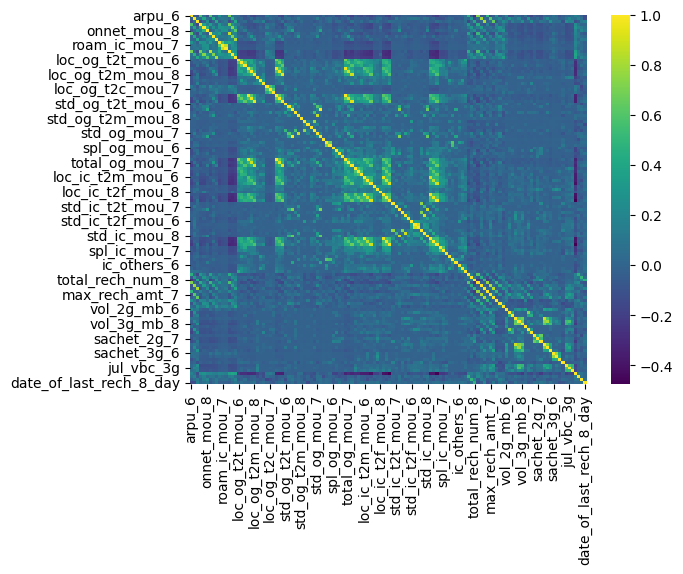

In [29]:
# Correlative 
sns.heatmap(train.corr(),cmap="viridis")

> I handle multi-correlative by t-SNE

## Use t-SNE

In [ ]:
list(train.columns)

In [ ]:
y = train['churn_probability']
X = train.drop(columns = 'churn_probability')
print(y.shape)
print(X.shape)


In [ ]:
from sklearn.manifold import TSNE

# Assuming X is your high-dimensional data
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Assuming X_original is your original high-dimensional data
X_combined = np.concatenate((X, X_tsne), axis=1)

In [ ]:
X_tsne.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Example: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [42]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def dummy_cat_col(df):
    cat_cols, num_cols, cat_but_car = grab_col_names(df)
    # Create the dummy variables for all categorical varibles where number of categories > 2
    df_dummy = df.copy()
    dummmy_col = [col for col in cat_cols if df[col].nunique() > 2]
    df_dummy = pd.get_dummies(df[dummmy_col], drop_first=True)
    df_dummy =  pd.concat([df, df_dummy], axis=1)
    df_dummy = df_dummy.drop(columns=dummmy_col)
    return df_dummy

def pre_preocessing(df):
    train = df
    train = transfer_date_feature(train)
    # Drop noise features
    noise_cols = ['id']
    train = train.drop(columns= noise_cols)
    # cat_cols, num_cols, cat_but_car = grab_col_names(train)
    # Create the dummy variables for all categorical varibles where number of categories > 2
    # train= dummy_cat_col(train)
    #drop outlier
#     col_falses = []
#     for c in num_cols:
#         print(f'drop outlier for: {c}')
#         train, col_false= drop_outliner(train,c)
#         if col_false is not None:
#             col_falses.append(col_false)
    # Some features have only one value, so I remove them one more.
    columns_vales_count = {c : len(train[c].value_counts().index) for c in train.columns}
    # columns has only 1  values
    one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
    train = train.drop(columns=one_value_column)
    return train
def tsne_training(df):
#     train = df
    train = pre_preocessing(df)
    y = train['churn_probability']
    X = train.drop(columns = 'churn_probability')
    print(y.shape)
    print(X.shape)
    # Assuming X is your high-dimensional data
    tsne = TSNE(n_components=3, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Assuming X_original is your original high-dimensional data
    X_combined = np.concatenate((X, X_tsne), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    # Example: Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")


In [31]:
tsne_training(train_inputation)

Observations: 69999
Variables: 134
cat_cols: 13
num_cols: 121
cat_but_car: 0
num_but_cat: 13
(69999,)
(69999, 127)
Accuracy: 0.9423571428571429


In [32]:
tsne_training(train_clean)

Observations: 61895
Variables: 134
cat_cols: 13
num_cols: 121
cat_but_car: 0
num_but_cat: 13
(61895,)
(61895, 127)
Accuracy: 0.9533888036190322


In [35]:
def training(df):
#     train = df
    train = pre_preocessing(df)
    y = train['churn_probability']
    X = train.drop(columns = 'churn_probability')
    print(y.shape)
    print(X.shape)
    # Assuming X_original is your original high-dimensional data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Example: Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    return model

In [43]:
training(train_inputation)

Observations: 69999
Variables: 140
cat_cols: 20
num_cols: 120
cat_but_car: 0
num_but_cat: 20
Observations: 69999
Variables: 140
cat_cols: 20
num_cols: 120
cat_but_car: 0
num_but_cat: 20
(69999,)
(69999, 120)
Accuracy: 0.9428571428571428


In [45]:
model = training(train_clean)

Observations: 61895
Variables: 140
cat_cols: 20
num_cols: 120
cat_but_car: 0
num_but_cat: 20
Observations: 61895
Variables: 140
cat_cols: 20
num_cols: 120
cat_but_car: 0
num_but_cat: 20
(61895,)
(61895, 120)
Accuracy: 0.953146457710639


In [37]:
training(train_clean)

Observations: 61895
Variables: 140
cat_cols: 20
num_cols: 120
cat_but_car: 0
num_but_cat: 20
(61895,)
(61895, 126)
Accuracy: 0.9536311495274254


In [46]:
import csv

def predict_result(df, train):
    #process test csv
    print('test shape:', df.shape)
    test = df[train.columns]
    y_pred = model.predict(test)
    print('y_pred shape:',y_pred)
    df['churn_probability'] = y_pred
    return df[['id','churn_probability']]
    

def create_the_result_csv(data):
    # data = [
    #     {"id": 69999, "churn_probability": 0},
    #     {"id": 70000, "churn_probability": 0},
    # ]
    csv_file_path = "result.csv"
    # Writing to CSV file
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=["id", "churn_probability"])

        # Writing the header
        writer.writeheader()

        # Writing the data
        writer.writerows(data)

    print(f"CSV file '{csv_file_path}' has been created.")


In [40]:
data = [
        {"id": 69999, "churn_probability": 0},
        {"id": 70000, "churn_probability": 0},
    ]
create_the_result_csv(data) 

CSV file 'result.csv' has been created.


In [48]:
test = pd.read_csv('data/test.csv')
test.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  30000.000000    30000.0         29684.0         29684.0   
mean   84998.500000      109.0             0.0             0.0   
std     8660.398374        0.0             0.0             0.0   
min    69999.000000      109.0             0.0             0.0   
25%    77498.750000      109.0             0.0             0.0   
50%    84998.500000      109.0             0.0             0.0   
75%    92498.250000      109.0             0.0             0.0   
max    99998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29684.0  30000.000000  30000.000000  30000.000000  28831.000000   
mean              0.0    282.644348    279.355021    279.845167    130.629693   
std               0.0    314.560212    323.205370    326.437029    290.677420   
min               0.0   -185.043000  -2014.045000   -146.859000      0.000000   
25%               0.0     92.907500     87.504750     84.180500      7.280000   
50%               0.0    198.227500    191.775000    191.690500     34.760000   
75%               0.0    371.969250    365.250750    367.804750    117.170000   
max               0.0  10955.066000  13224.119000  13505.996000   6944.360000   

        onnet_mou_7  ...   sachet_3g_6   sachet_3g_7   sachet_3g_8  \
count  28828.000000  ...  30000.000000  30000.000000  30000.000000   
mean     133.148632  ...      0.073467      0.077967      0.082200   
std      302.921820  ...      0.557327      0.613596      0.611546   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.660000  ...      0.000000      0.000000      0.000000   
50%       32.550000  ...      0.000000      0.000000      0.000000   
75%      115.210000  ...      0.000000      0.000000      0.000000   
max     7411.010000  ...     28.000000     35.000000     30.000000   

         fb_user_6    fb_user_7    fb_user_8           aon    aug_vbc_3g  \
count  7585.000000  7706.000000  7922.000000  30000.000000  30000.000000   
mean      0.909954     0.906956     0.891946   1218.023200     68.314097   
std       0.286267     0.290513     0.310468    960.109844    263.460641   
min       0.000000     0.000000     0.000000    180.000000      0.000000   
25%       1.000000     1.000000     1.000000    466.000000      0.000000   
50%       1.000000     1.000000     1.000000    853.000000      0.000000   
75%       1.000000     1.000000     1.000000   1795.000000      0.000000   
max       1.000000     1.000000     1.000000   4197.000000   6054.390000   

         jul_vbc_3g    jun_vbc_3g  
count  30000.000000  30000.000000  
mean      68.946576     59.891621  
std      278.749349    246.098292  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max     7994.840000   6614.530000  

[8 rows x 162 columns]

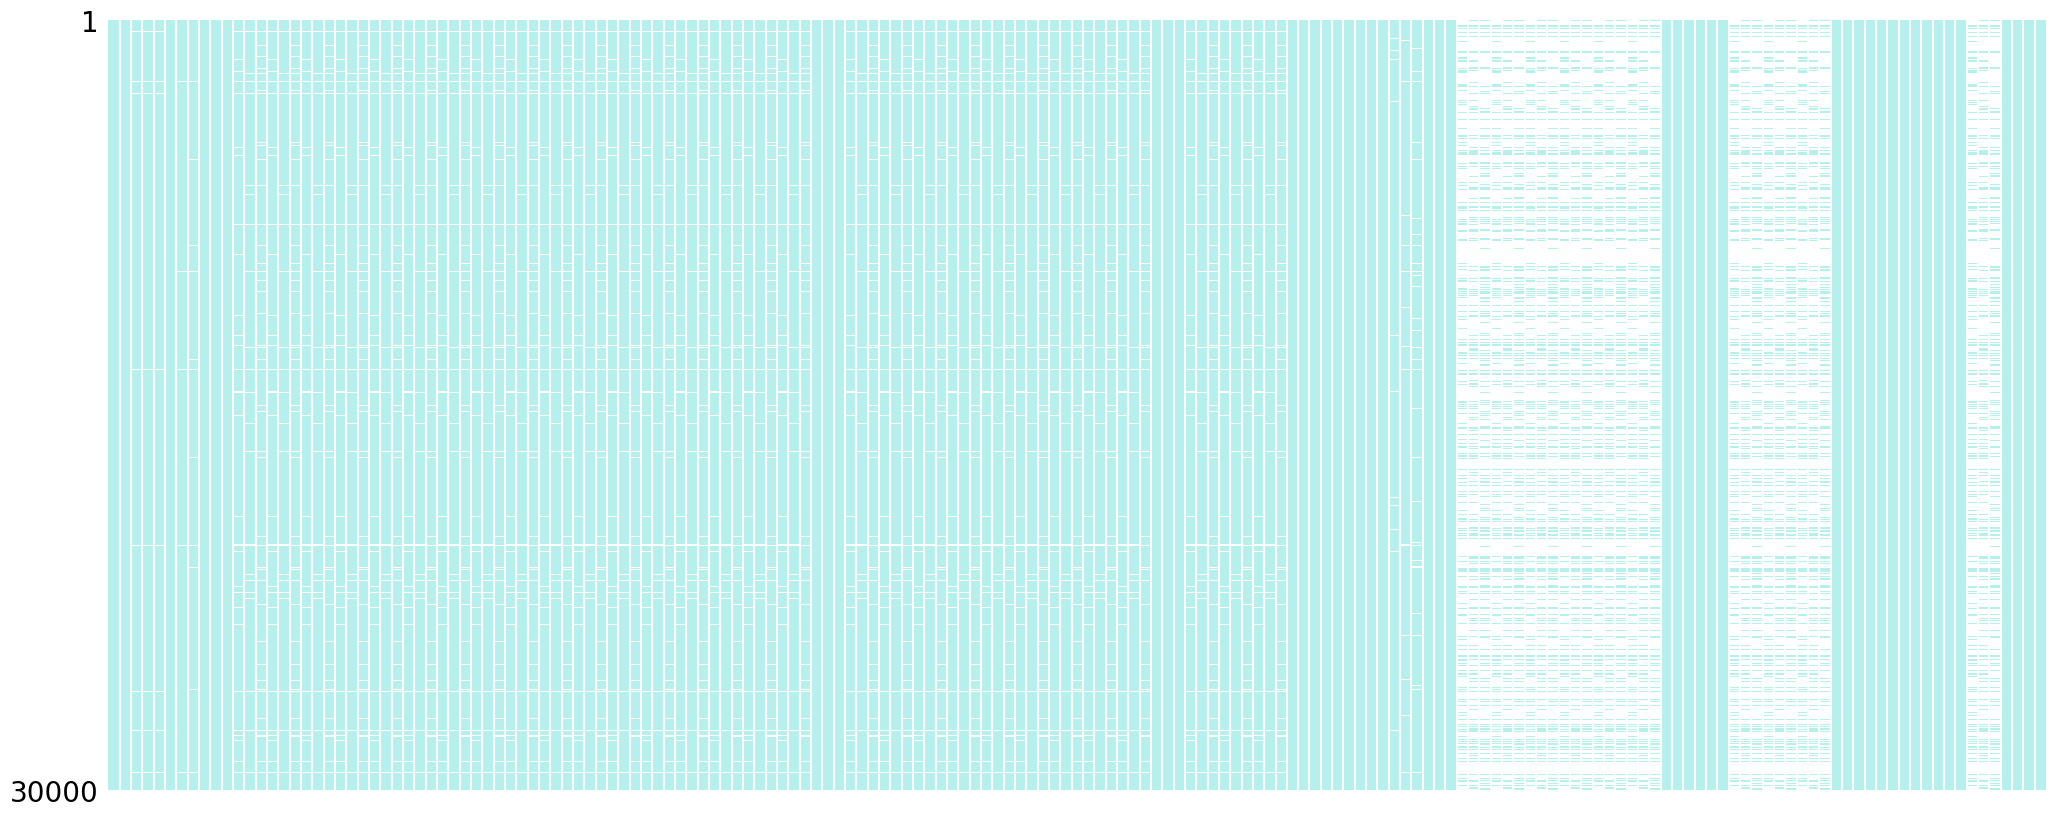

In [49]:
#overview missing data
fig = msno.matrix(test,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()